# COVID-19 Global Data Set
data set provided by https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases
___

In [1]:
# imports
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Data/COVID-19/time_series_covid19_confirmed_global.csv')
df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/13/20  4/14/20  4/15/20  4/16/20  \
0        0        0        0  ...      665      714      784      840   
1        0        0        0  ...      467      475      494      518   
2        0        0        0  ...     1983     2070     2160     2268   
3        0        0        0  ...      646      659      673      673   
4        0        0        0  ...       19       19       19       19   

   4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  
0      906      933      996     1026     1092     1176  
1      539      548      562      584      609      634  
2     2418     2534     2629     2718     2811     2910  
3      696      704      713      717      717      723  
4       19       24       24       24       24       25  

[5 rows x 96 columns]

In [3]:
df.shape

(264, 96)

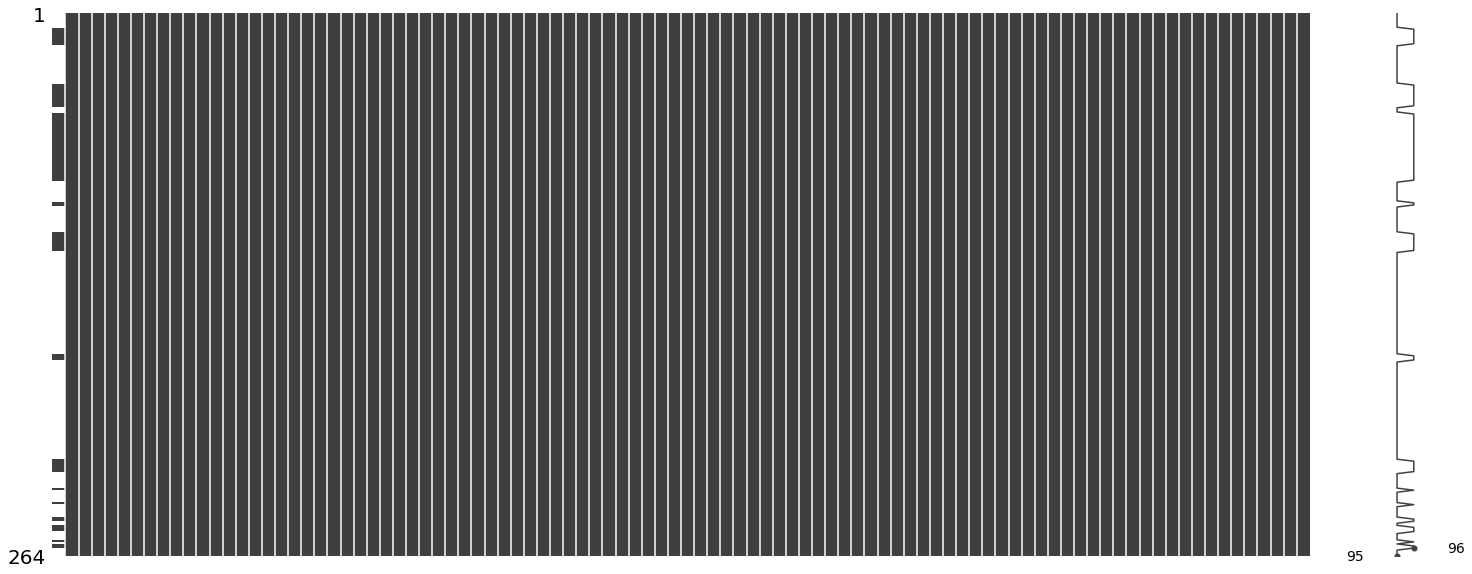

In [4]:
msno.matrix(df);

In [5]:
df['Country/Region'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Australia', 'Australia', 'Australia', 'Australia', 'Australia',
       'Australia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China

In [6]:
df['Province/State'].values

array([nan, nan, nan, nan, nan, nan, nan, nan,
       'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       'Alberta', 'British Columbia', 'Grand Princess', 'Manitoba',
       'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia',
       'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan', nan,
       nan, nan, 'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', nan, nan, nan, nan, nan, nan, nan, nan, nan, na

___
## US Curve

In [7]:
USdf = df[df['Country/Region'] == 'US'].drop(columns=['Province/State', 'Country/Region','Lat', 'Long']).T.rename(columns={225: 'US'})
USdf

US
1/22/20       1
1/23/20       1
1/24/20       2
1/25/20       2
1/26/20       5
...         ...
4/18/20  732197
4/19/20  758809
4/20/20  784326
4/21/20  812036
4/22/20  839675

[92 rows x 1 columns]

In [8]:
USdf['Date'] = pd.to_datetime(USdf.index)

USdf.set_index('Date', inplace=True)

USdf

US
Date              
2020-01-22       1
2020-01-23       1
2020-01-24       2
2020-01-25       2
2020-01-26       5
...            ...
2020-04-18  732197
2020-04-19  758809
2020-04-20  784326
2020-04-21  812036
2020-04-22  839675

[92 rows x 1 columns]

In [9]:
USdf.resample('w').mean()

US
Date                     
2020-01-26       2.200000
2020-02-02       6.142857
2020-02-09      11.000000
2020-02-16      12.428571
2020-02-23      13.857143
2020-03-01      59.857143
2020-03-08     252.000000
2020-03-15    1841.571429
2020-03-22   15818.857143
2020-03-29   87317.714286
2020-04-05  246812.285714
2020-04-12  461873.714286
2020-04-19  668991.857143
2020-04-26  812012.333333

In [10]:
pd.concat([
    USdf[['US']],
    USdf[['US']].rolling(7).mean().rename(columns={'US':'US 7 Day Avg'})
], axis=1)

US   US 7 Day Avg
Date                             
2020-01-22       1            NaN
2020-01-23       1            NaN
2020-01-24       2            NaN
2020-01-25       2            NaN
2020-01-26       5            NaN
...            ...            ...
2020-04-18  732197  639921.000000
2020-04-19  758809  668991.857143
2020-04-20  784326  698092.857143
2020-04-21  812036  727288.000000
2020-04-22  839675  756334.428571

[92 rows x 2 columns]

/Users/Creighton/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


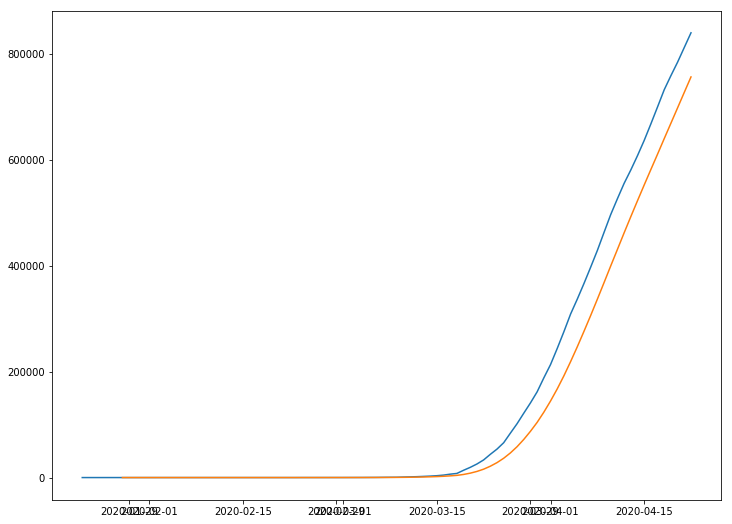

In [11]:
plt.figure(figsize=(12,9))
plt.plot(USdf['US'])
plt.plot(USdf['US'].rolling(7).mean());

___
## China Curve

In [12]:
chinaData = df[df['Country/Region'] == 'China'].drop(columns=['Province/State', 'Lat', 'Long', 'Country/Region']).sum()
chinaData

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
4/18/20    83787
4/19/20    83805
4/20/20    83817
4/21/20    83853
4/22/20    83868
Length: 92, dtype: int64

In [13]:
Chinadf = pd.DataFrame(chinaData, columns=['China'])
Chinadf['Date'] = pd.to_datetime(Chinadf.index)
Chinadf.set_index('Date', inplace=True)
Chinadf

China
Date             
2020-01-22    548
2020-01-23    643
2020-01-24    920
2020-01-25   1406
2020-01-26   2075
...           ...
2020-04-18  83787
2020-04-19  83805
2020-04-20  83817
2020-04-21  83853
2020-04-22  83868

[92 rows x 1 columns]

In [14]:
Chinadf.resample('w').mean()

China
Date                    
2020-01-26   1118.400000
2020-02-02   8705.285714
2020-02-09  30314.714286
2020-02-16  56668.285714
2020-02-23  75130.571429
2020-03-01  78568.142857
2020-03-08  80514.714286
2020-03-15  80932.142857
2020-03-22  81191.285714
2020-03-29  81792.857143
2020-04-05  82418.000000
2020-04-12  82880.571429
2020-04-19  83518.571429
2020-04-26  83846.000000

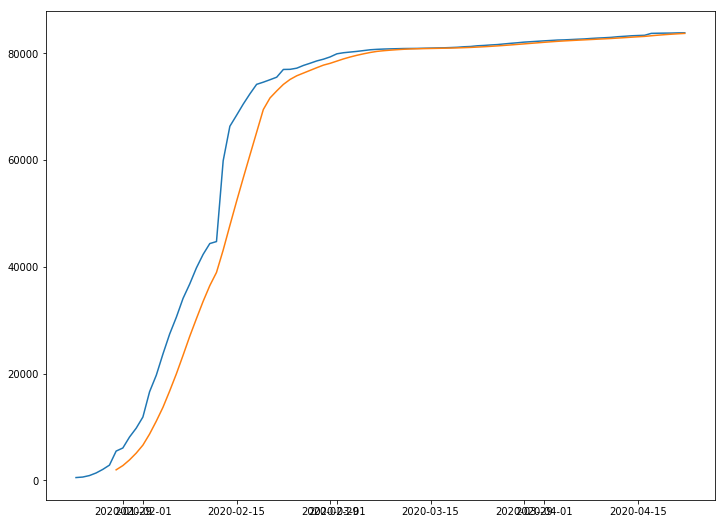

In [15]:
plt.figure(figsize=(12,9))
plt.plot(Chinadf['China'])
plt.plot(Chinadf['China'].rolling(7).mean());

___
## Canada Curve

In [16]:
CanadaData = df[df['Country/Region'] == 'Canada'].drop(columns=['Province/State', 'Lat', 'Long', 'Country/Region']).sum()
CanadaData

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        1
           ...  
4/18/20    34355
4/19/20    35632
4/20/20    37657
4/21/20    39401
4/22/20    41648
Length: 92, dtype: int64

In [17]:
Candf = pd.DataFrame(data=CanadaData, columns=['Canada'])
Candf['Date'] = pd.to_datetime(Candf.index)
Candf.set_index('Date', inplace=True)
Candf

Canada
Date              
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       1
...            ...
2020-04-18   34355
2020-04-19   35632
2020-04-20   37657
2020-04-21   39401
2020-04-22   41648

[92 rows x 1 columns]

In [18]:
Candf.resample('w').mean()

Canada
Date                    
2020-01-26      0.200000
2020-02-02      2.714286
2020-02-09      5.571429
2020-02-16      7.000000
2020-02-23      8.428571
2020-03-01     14.714286
2020-03-08     42.000000
2020-03-15    146.285714
2020-03-22    862.714286
2020-03-29   4101.285714
2020-04-05  11134.285714
2020-04-12  20557.571429
2020-04-19  30647.000000
2020-04-26  39568.666667

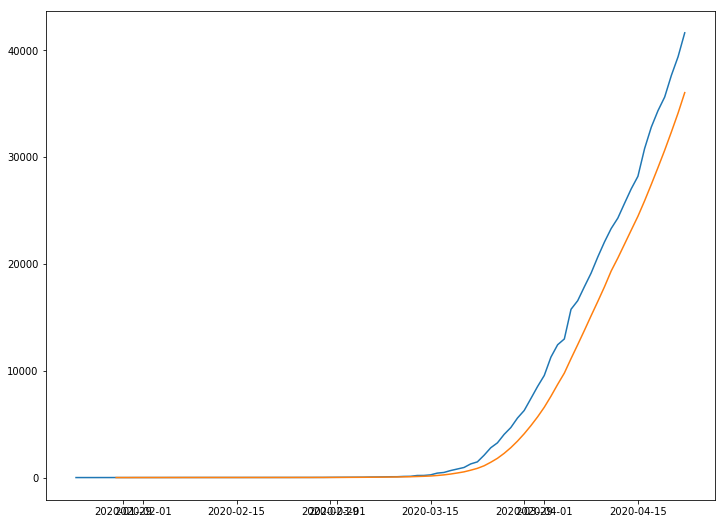

In [19]:
plt.figure(figsize=(12,9))
plt.plot(Candf['Canada'])
plt.plot(Candf['Canada'].rolling(7).mean());

___
## Italy Curve

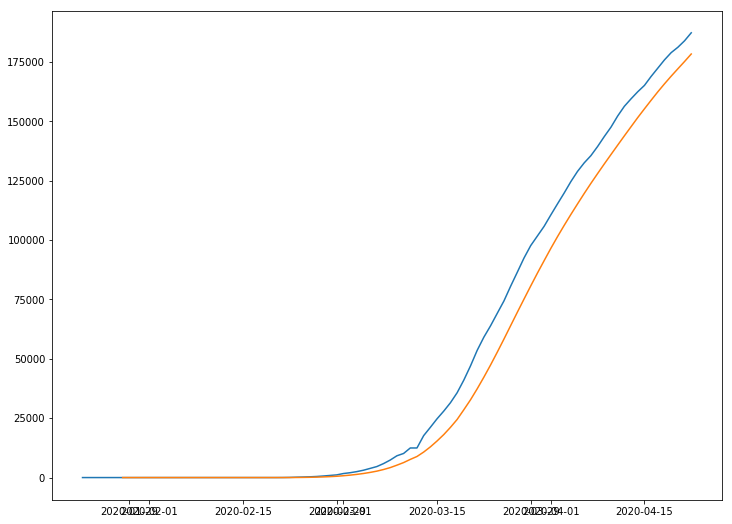

In [20]:
ItalyData = df[df['Country/Region'] == 'Italy'].drop(columns=['Province/State', 'Lat', 'Long', 'Country/Region']).sum()

Italydf = pd.DataFrame(data=ItalyData, columns=['Italy'])
Italydf['Date'] = pd.to_datetime(Italydf.index)
Italydf.set_index('Date', inplace=True)

plt.figure(figsize=(12,9))
plt.plot(Italydf['Italy'])
plt.plot(Italydf['Italy'].rolling(7).mean());

___
## All Countries

/Users/Creighton/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


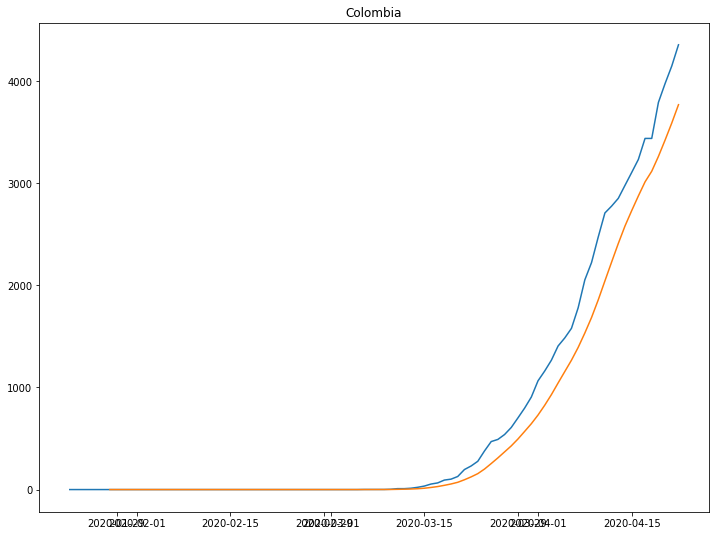

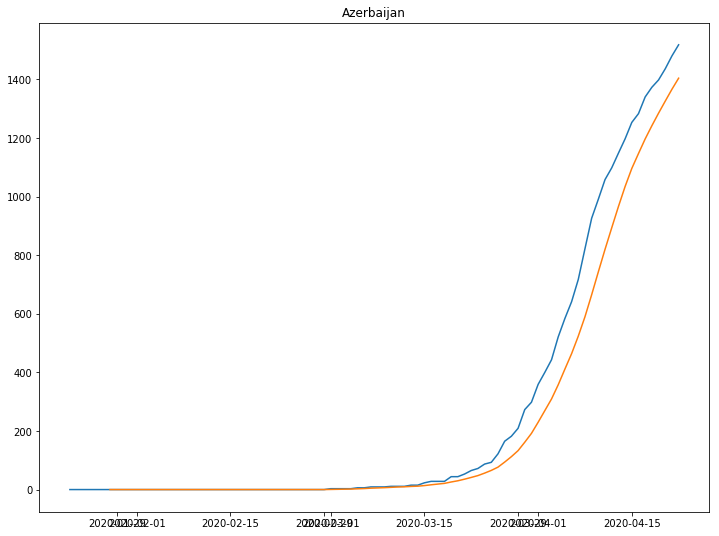

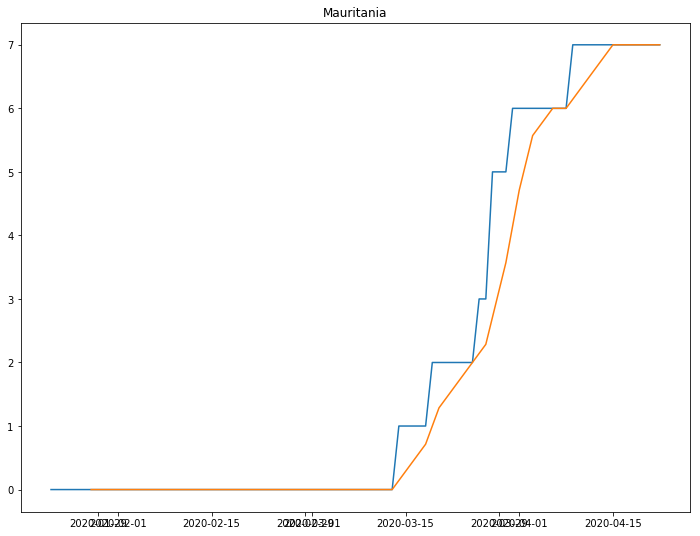

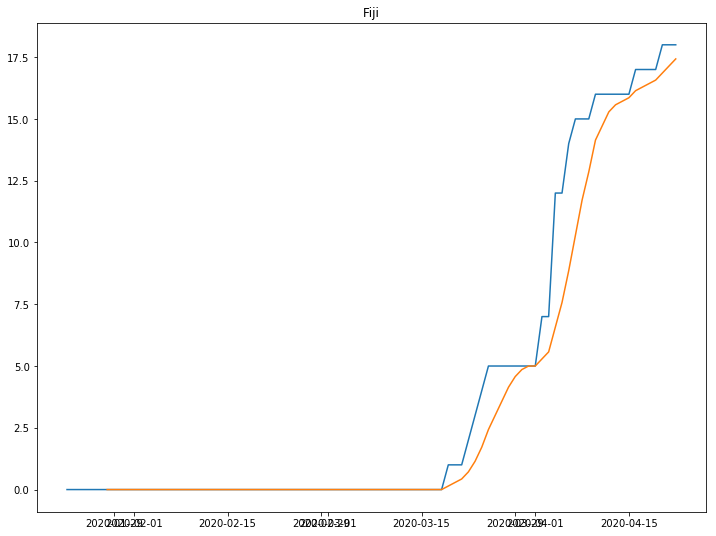

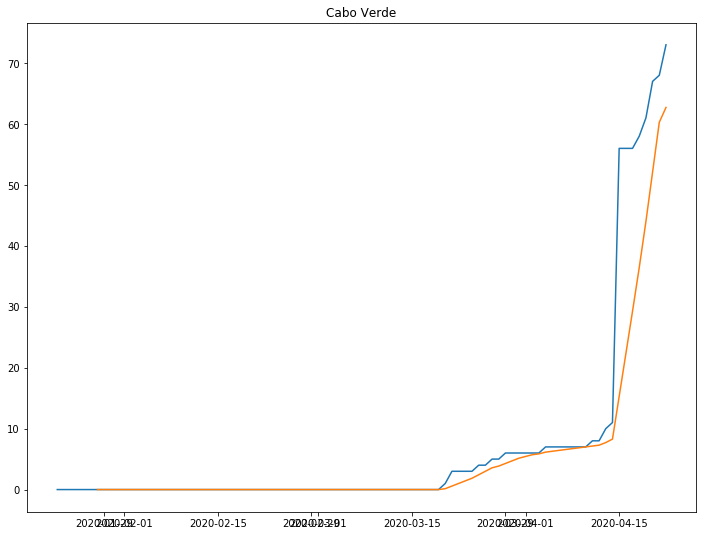

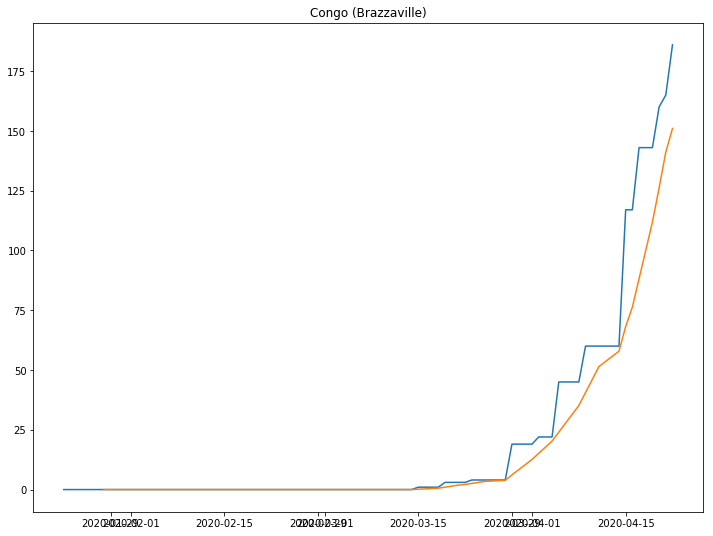

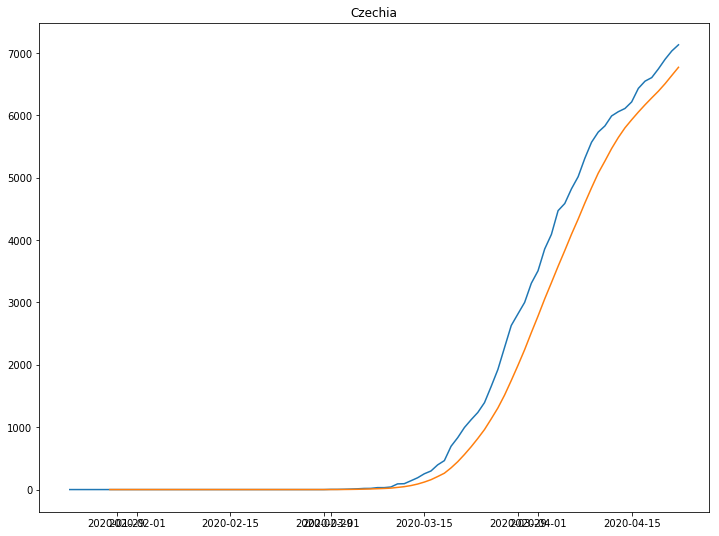

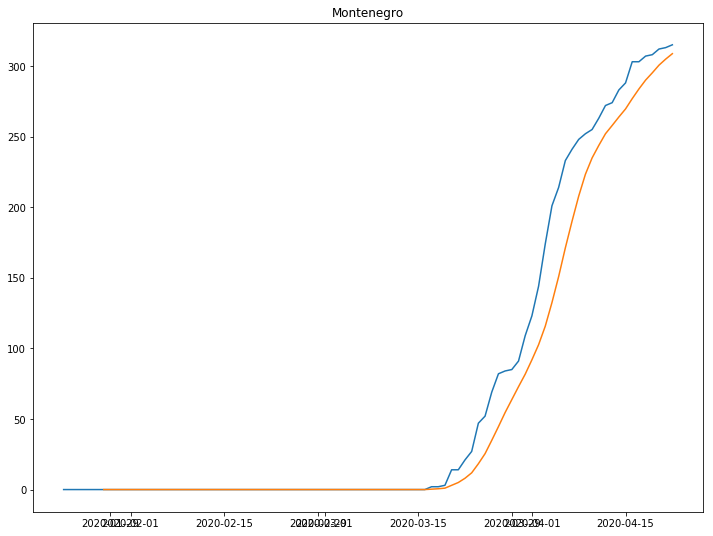

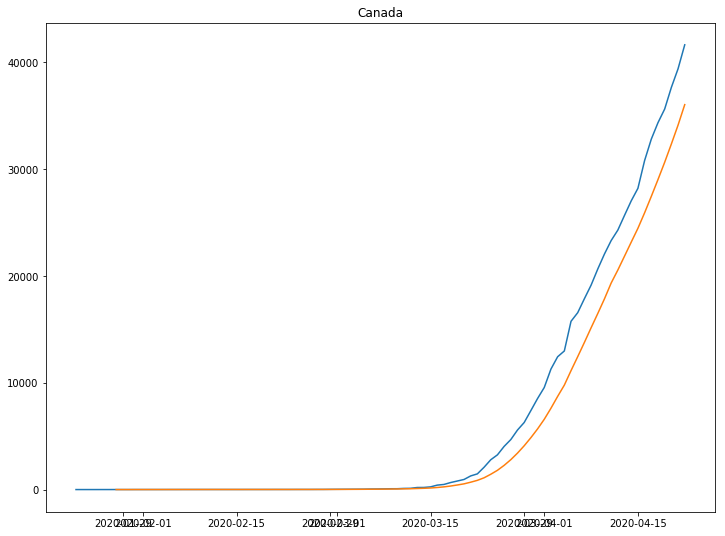

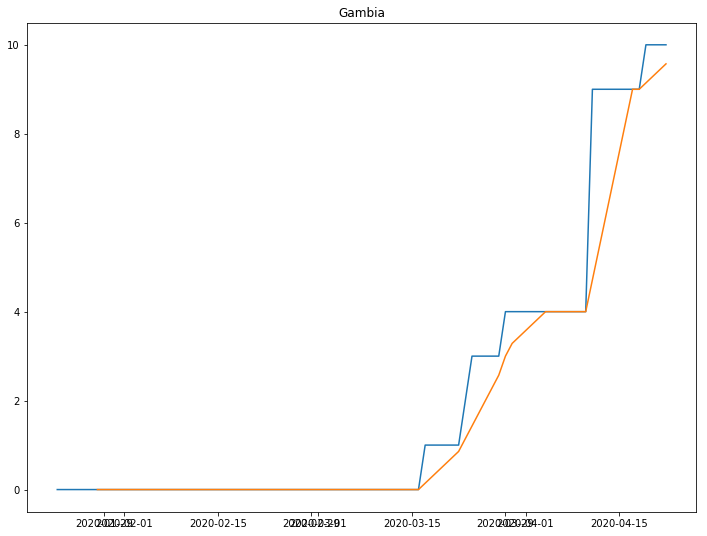

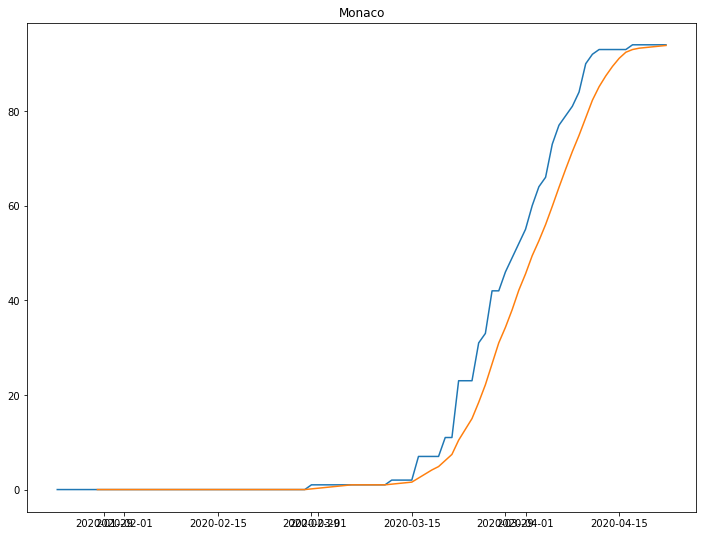

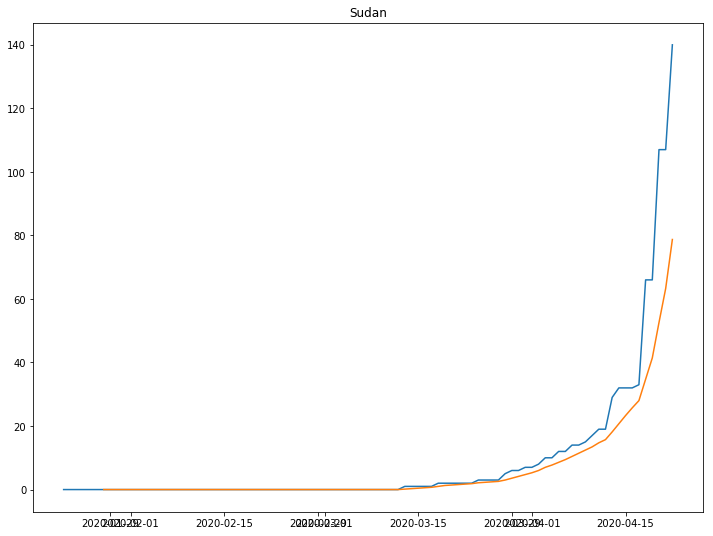

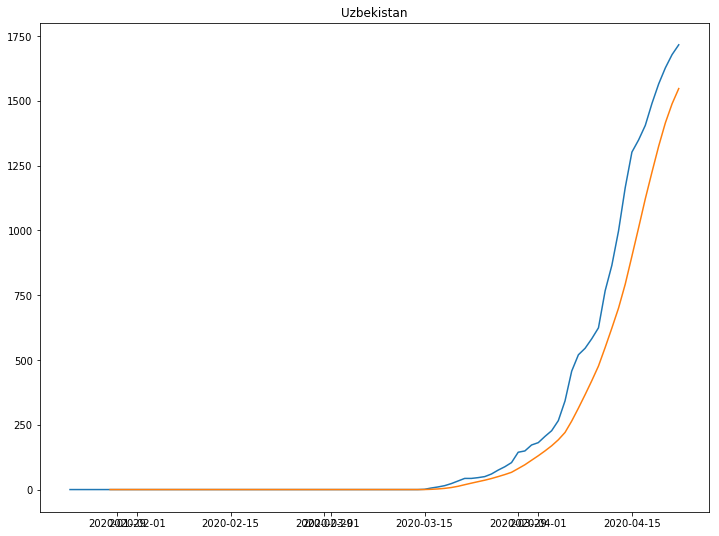

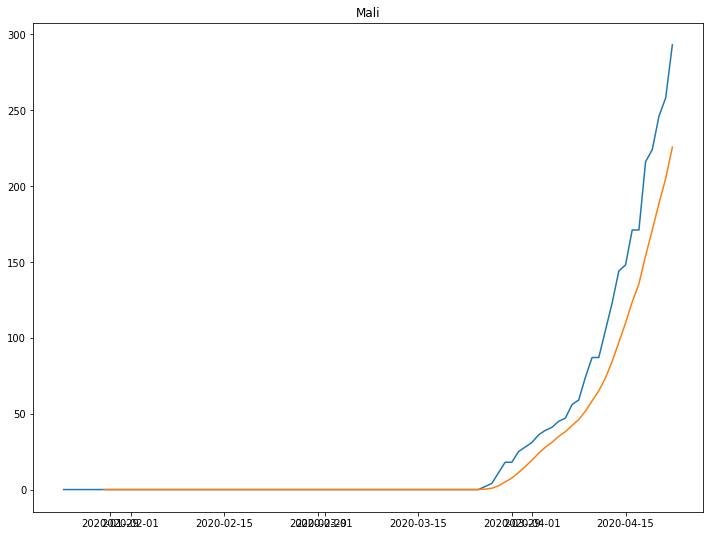

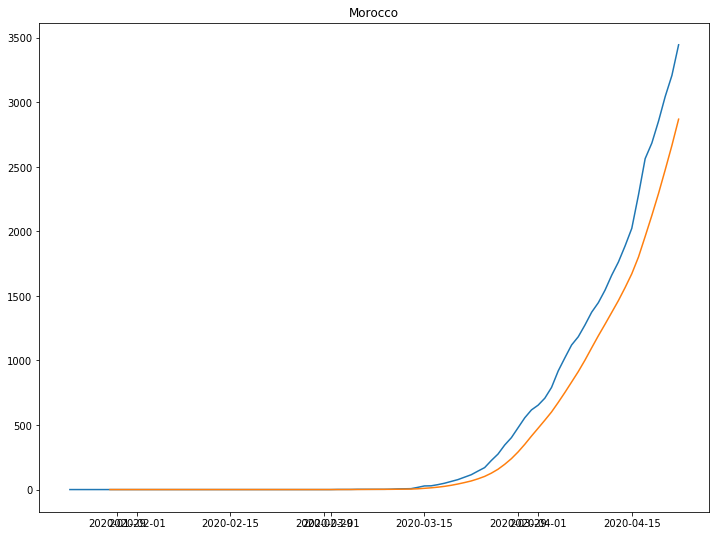

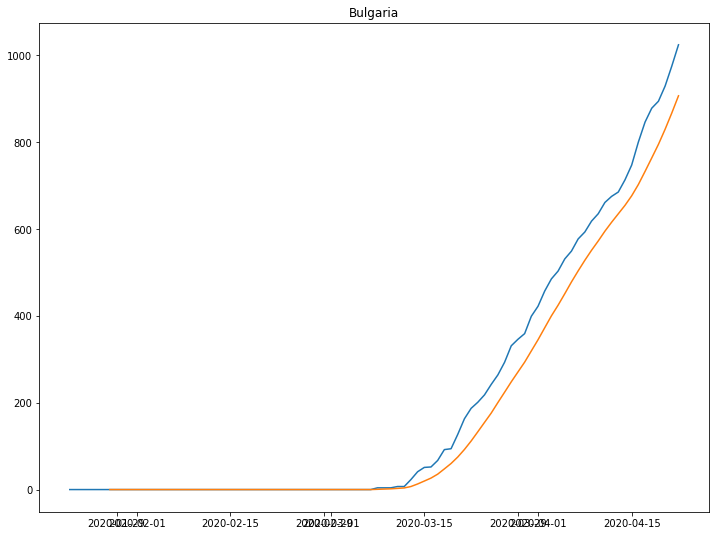

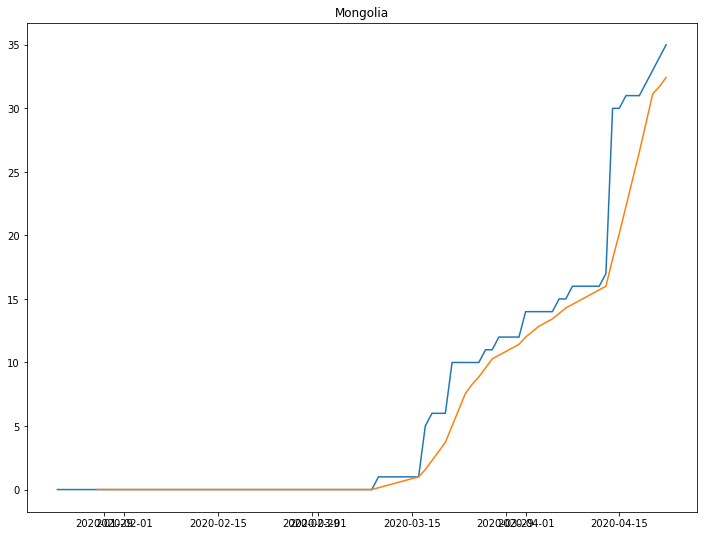

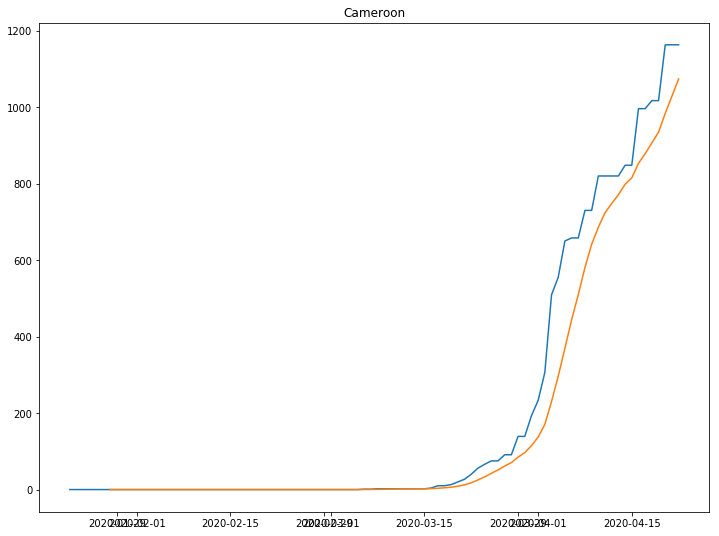

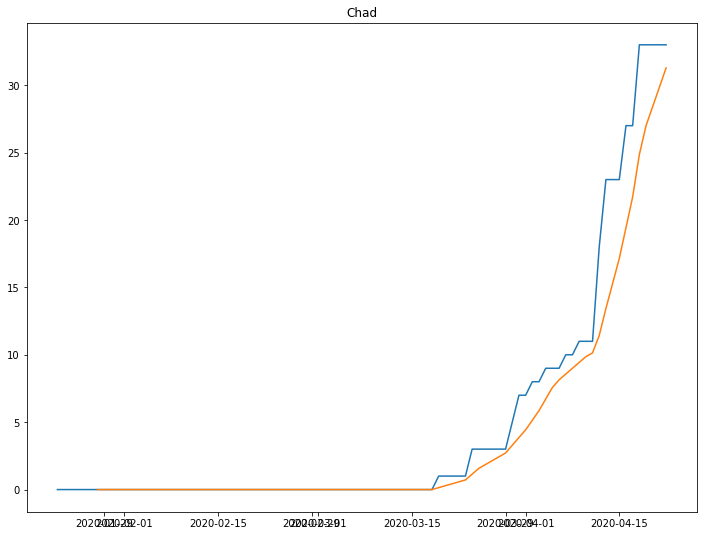

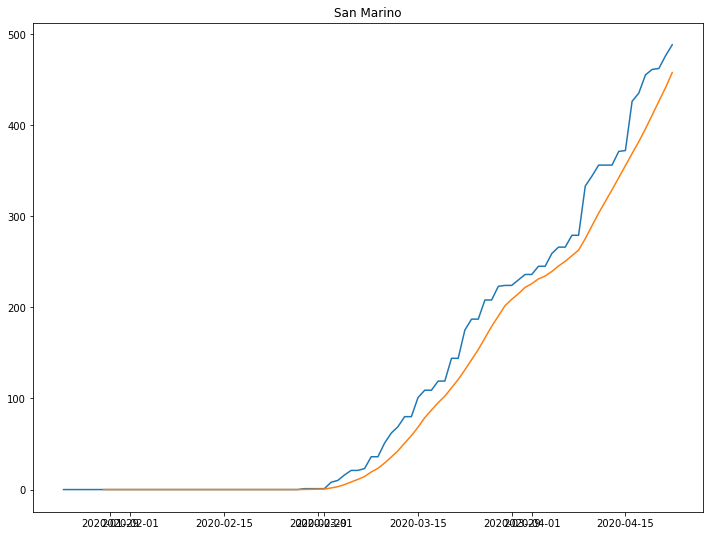

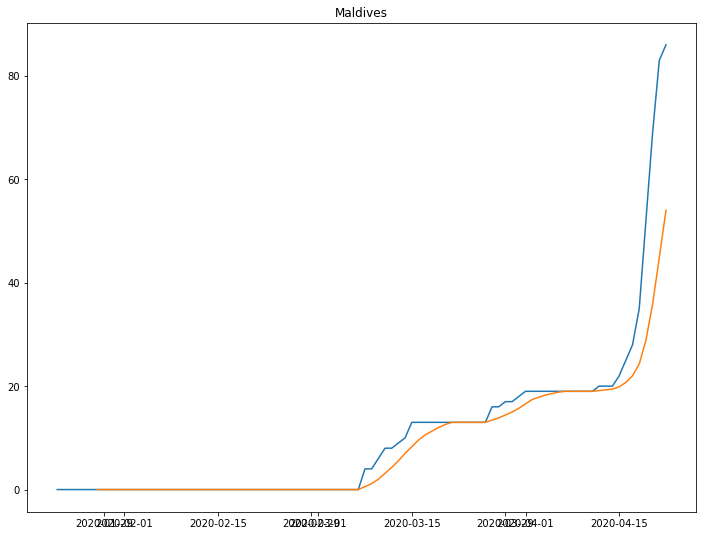

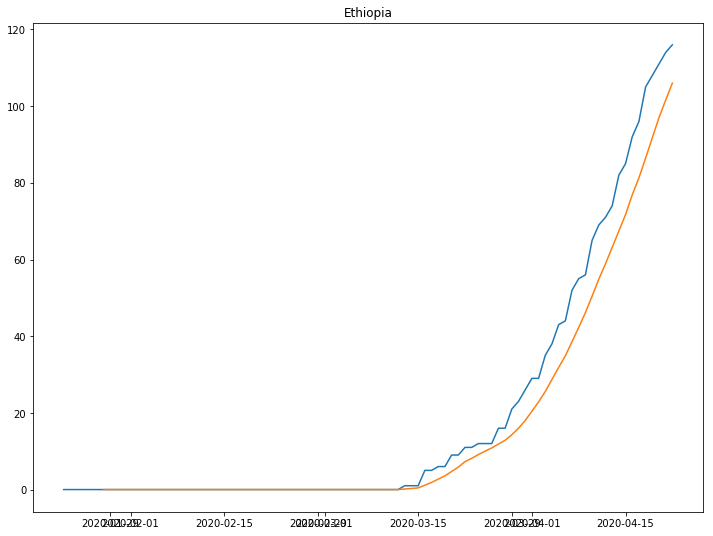

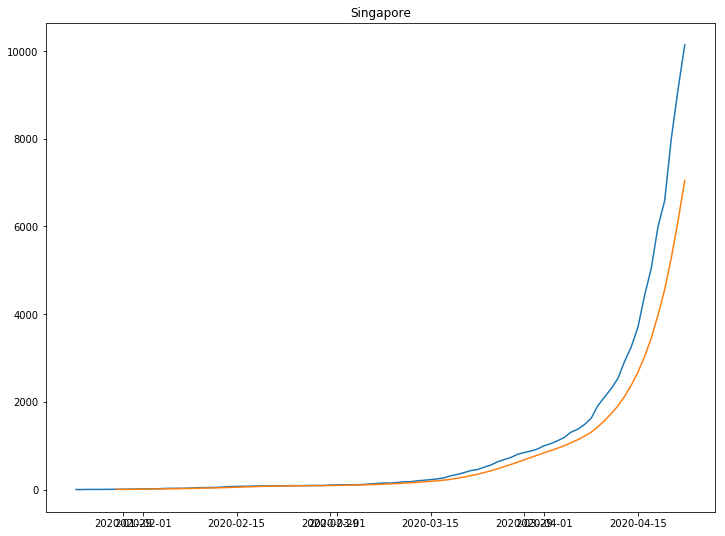

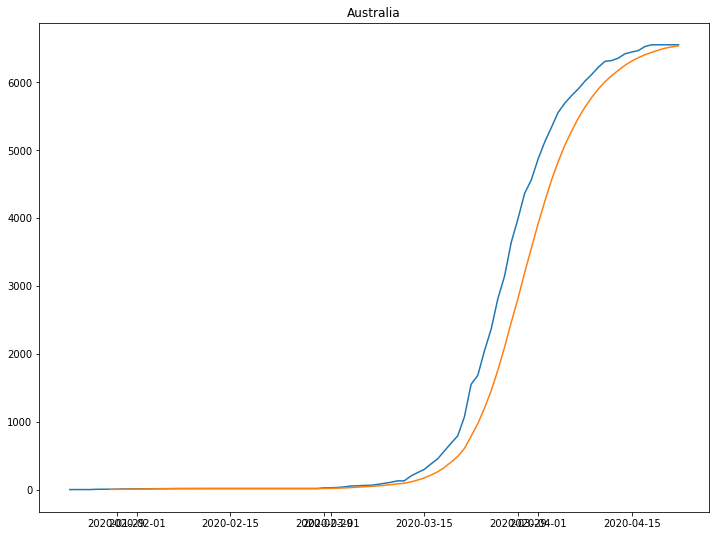

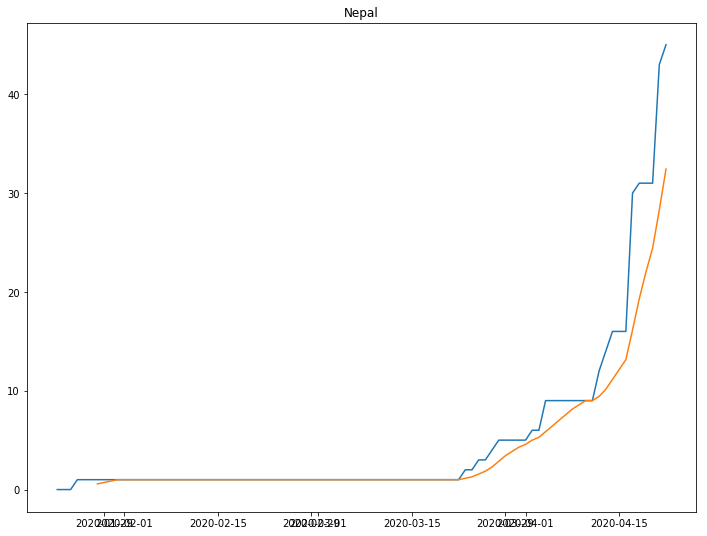

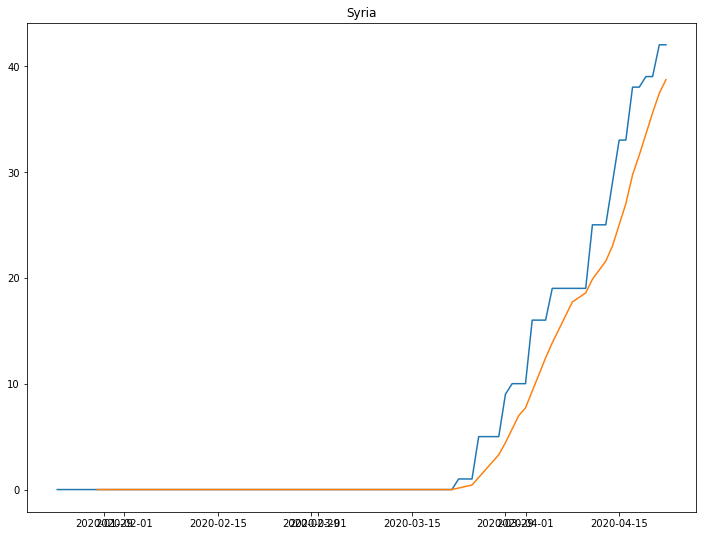

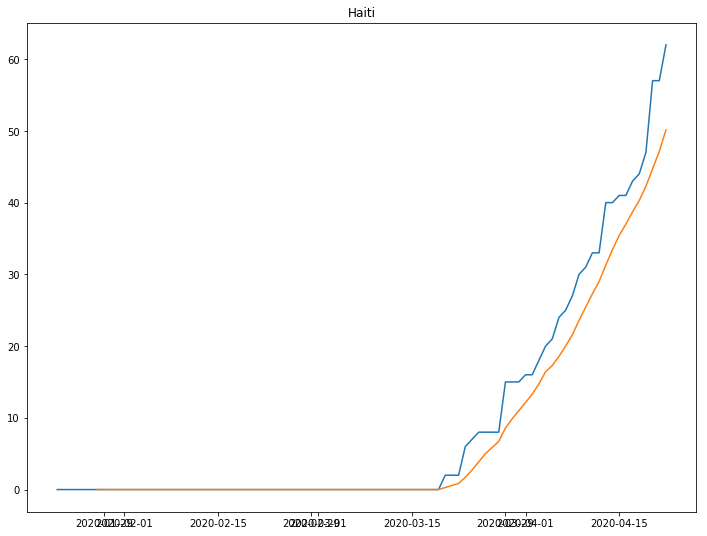

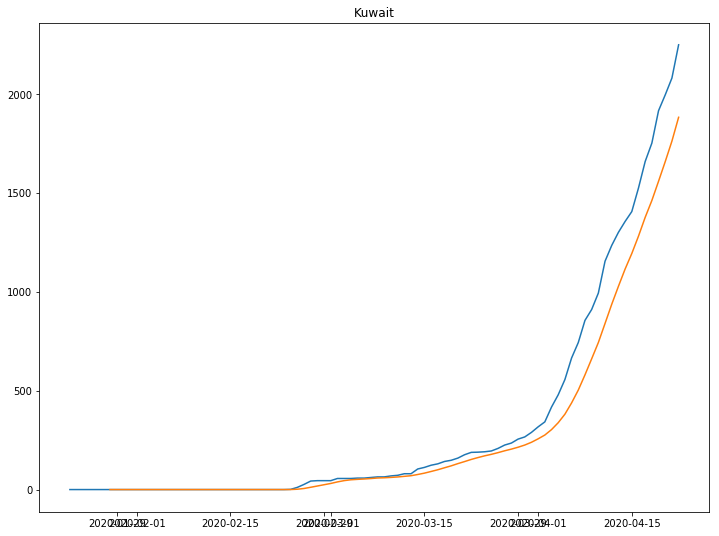

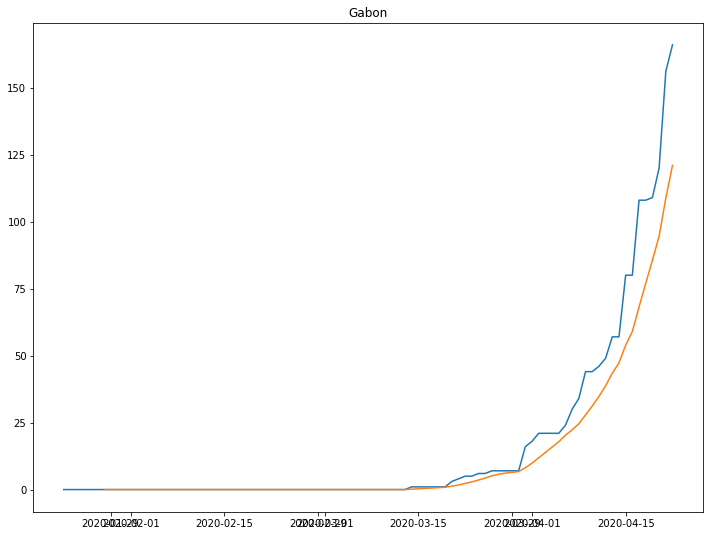

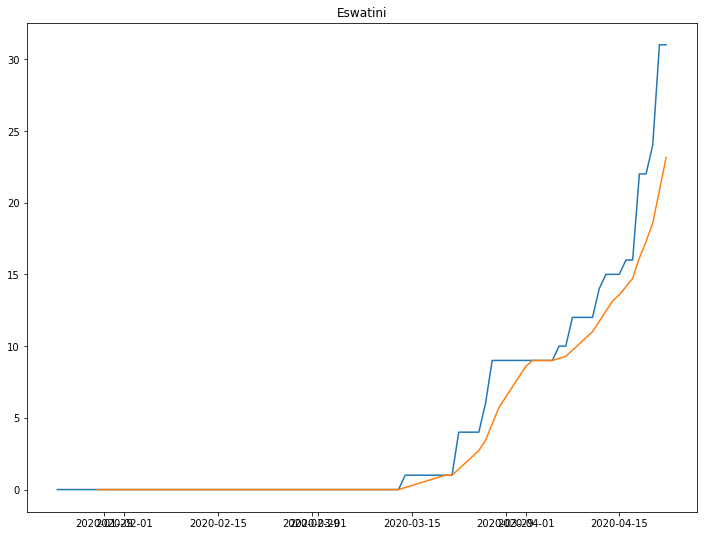

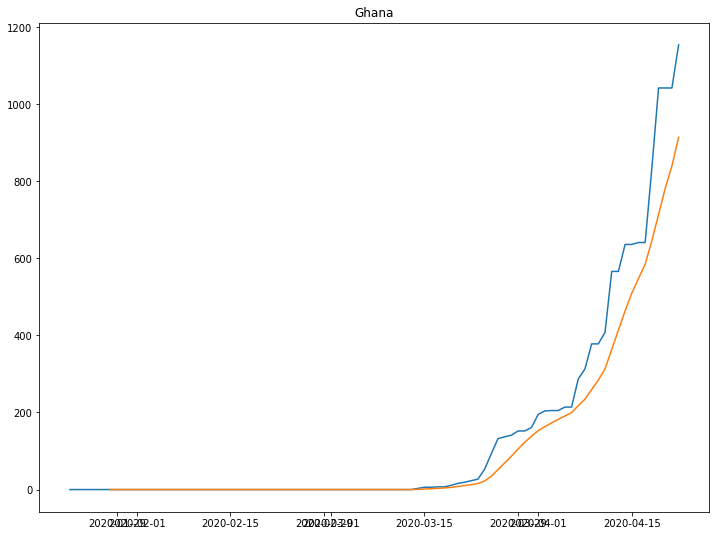

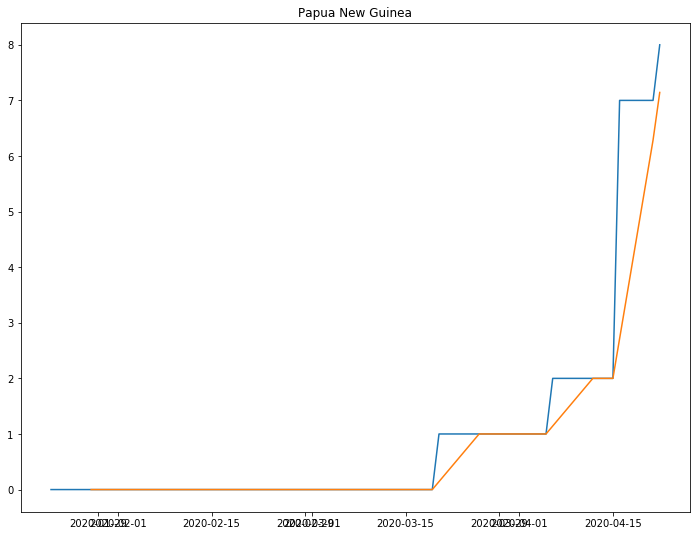

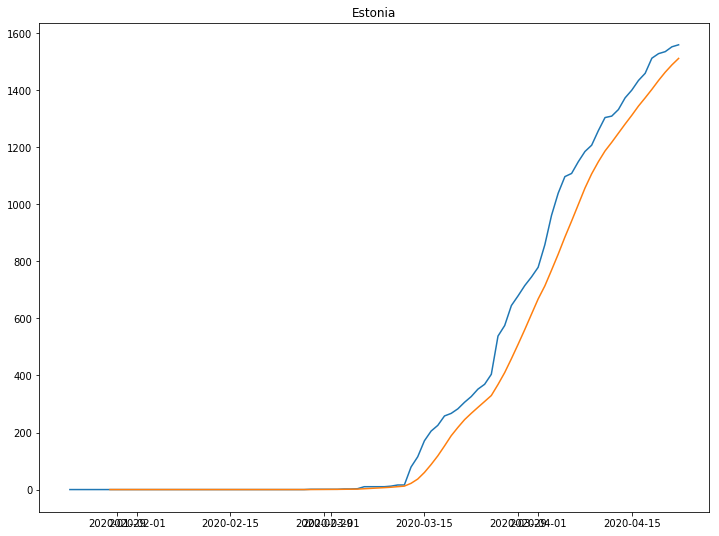

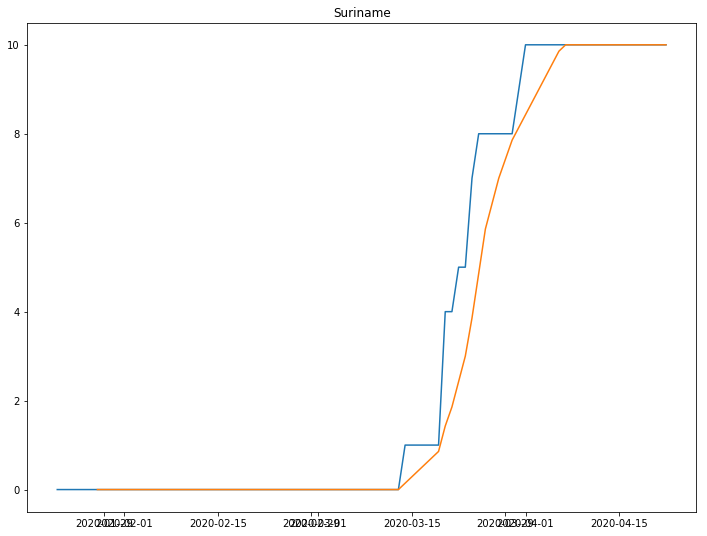

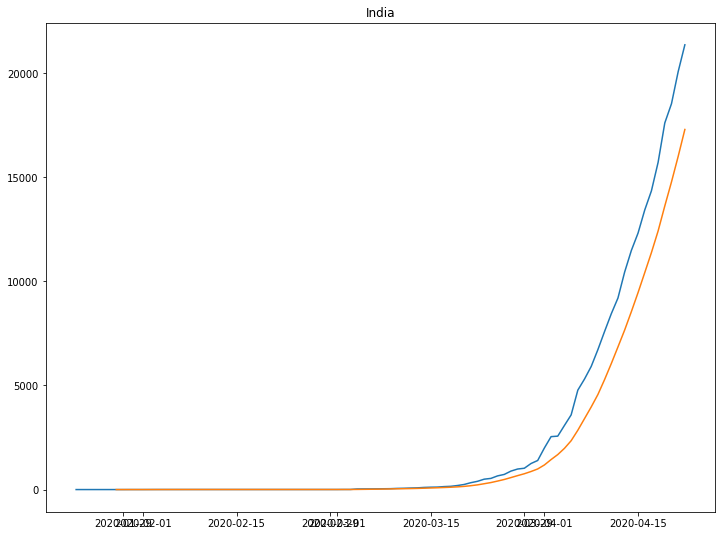

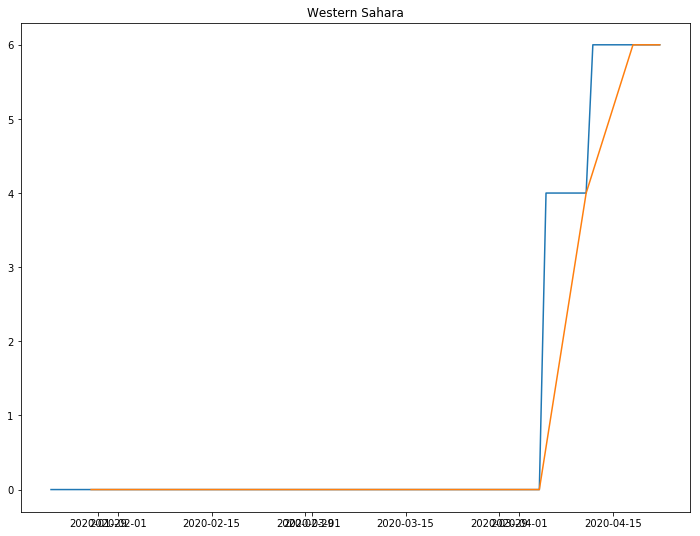

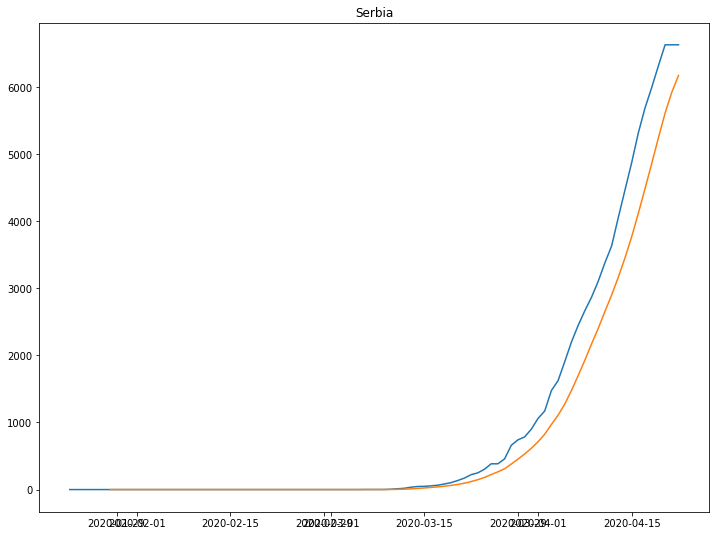

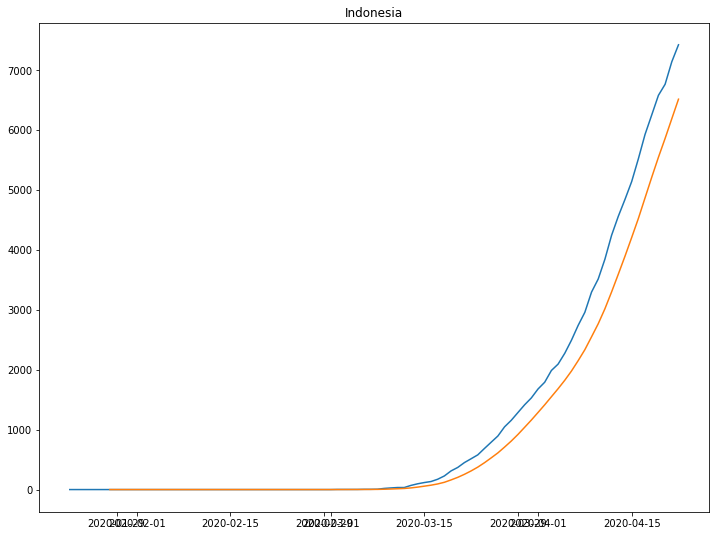

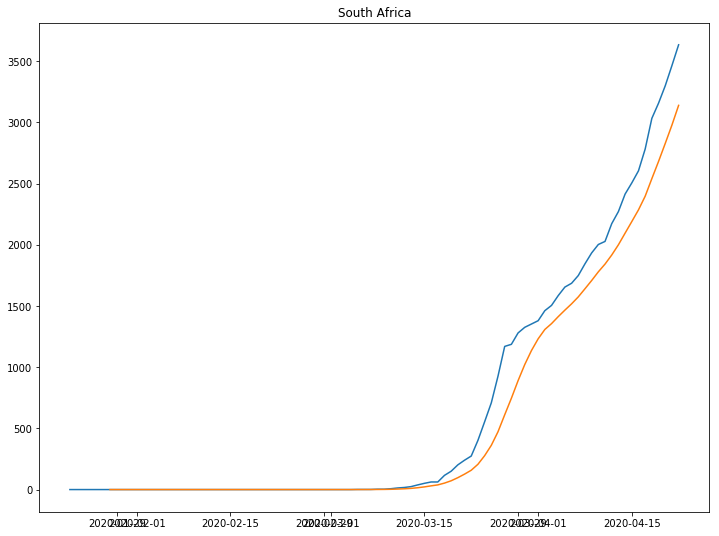

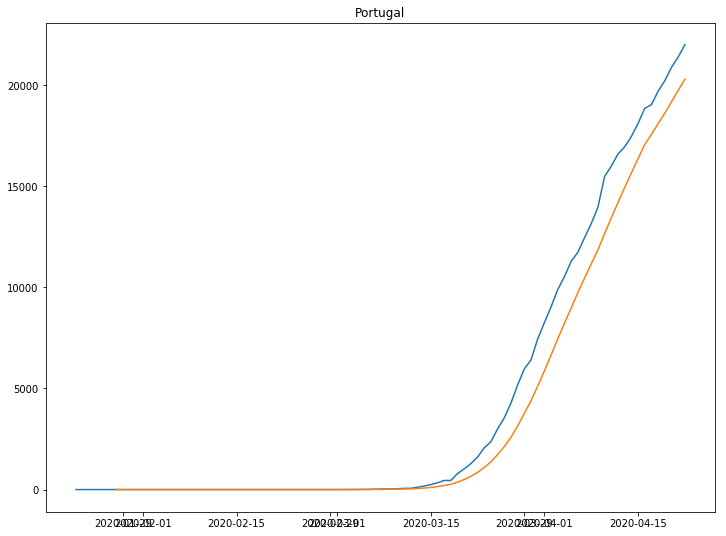

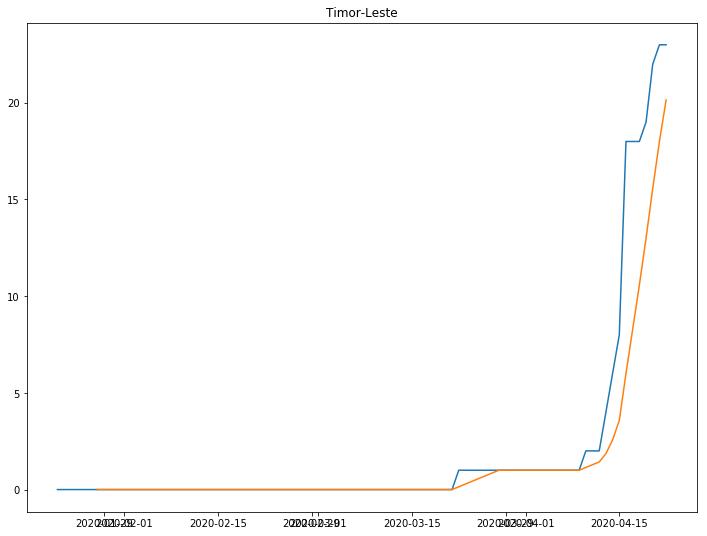

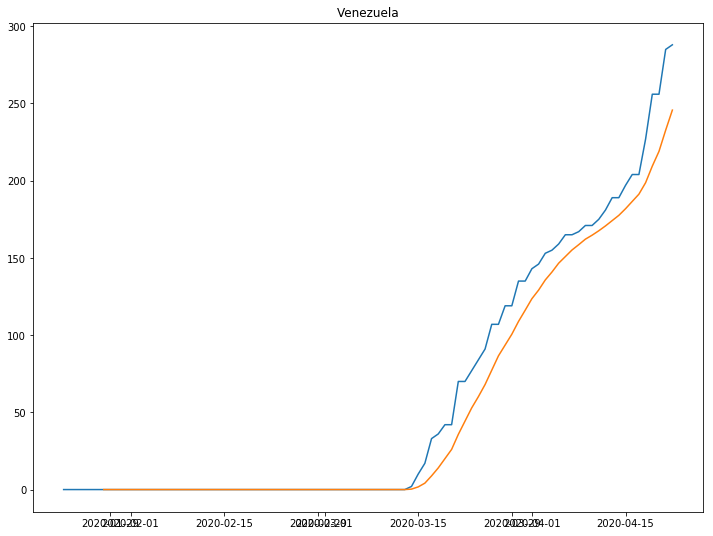

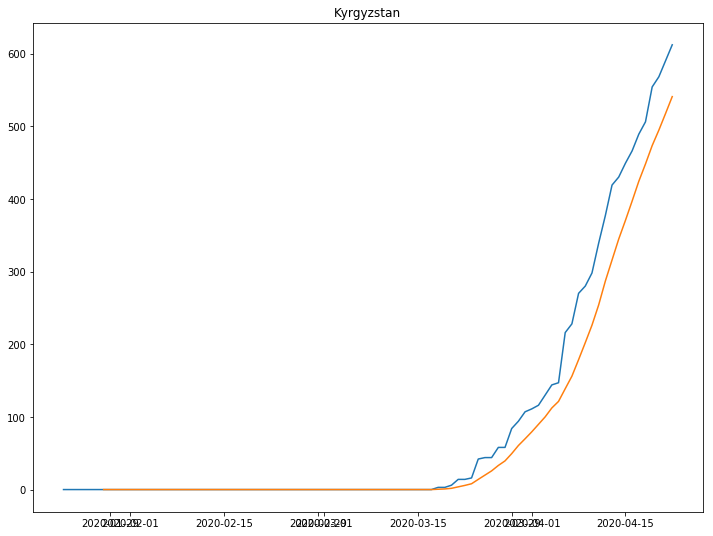

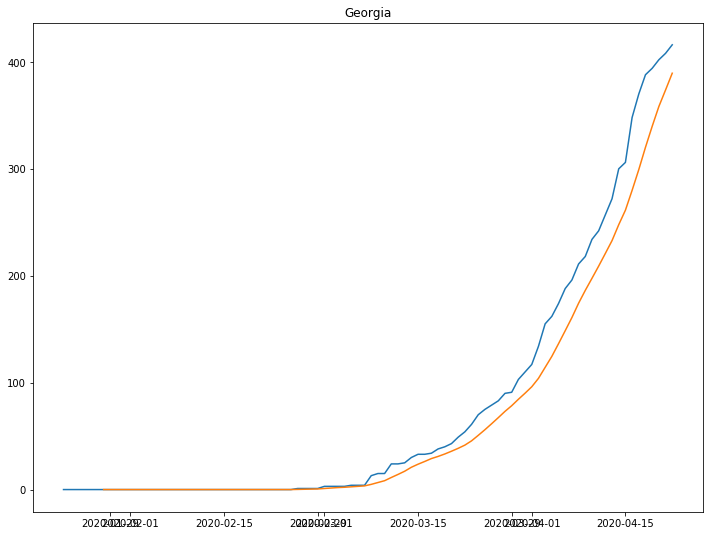

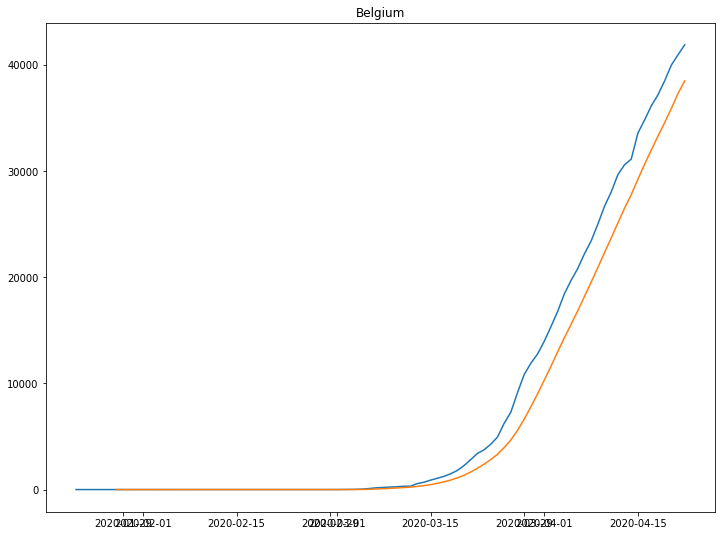

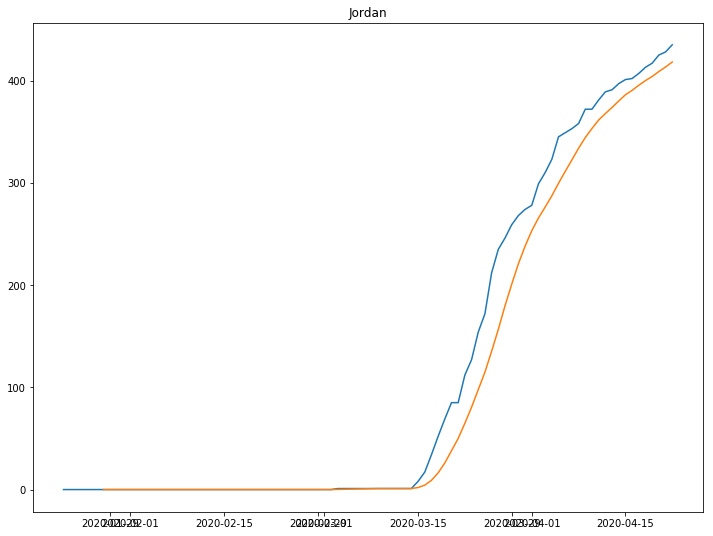

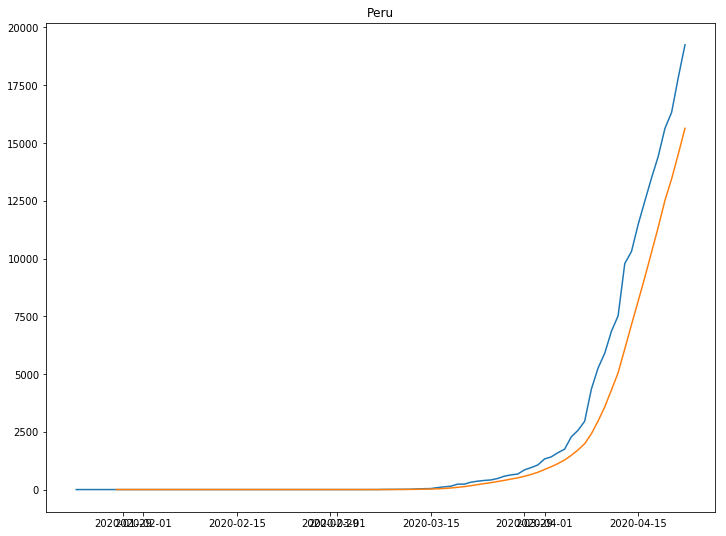

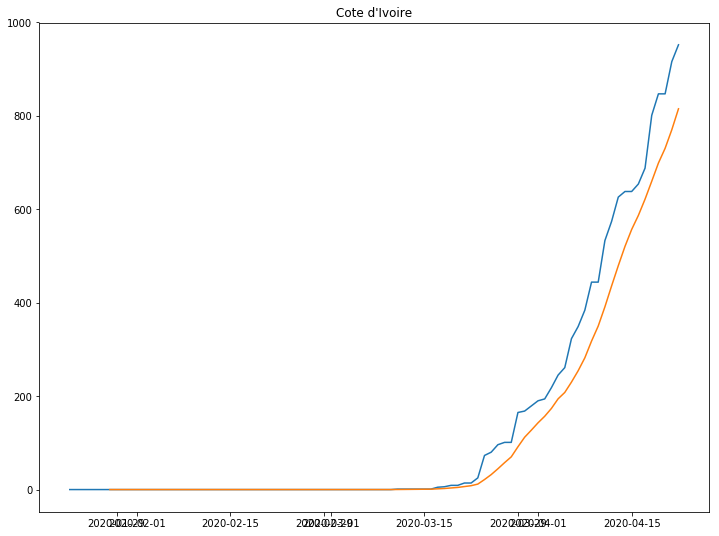

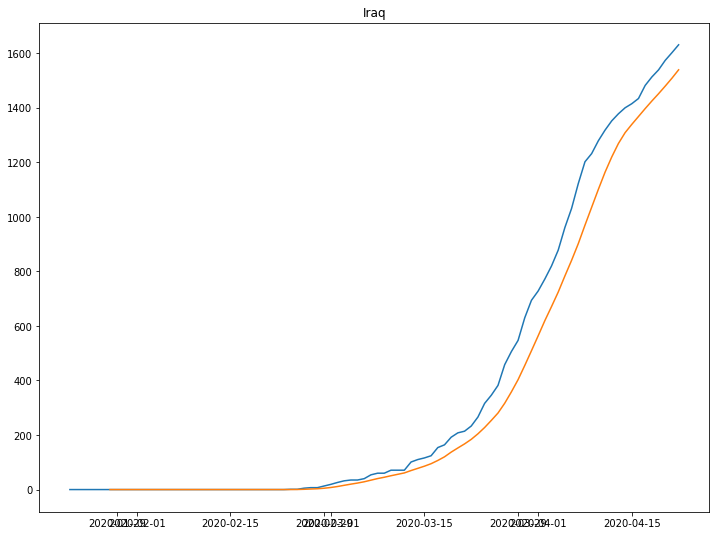

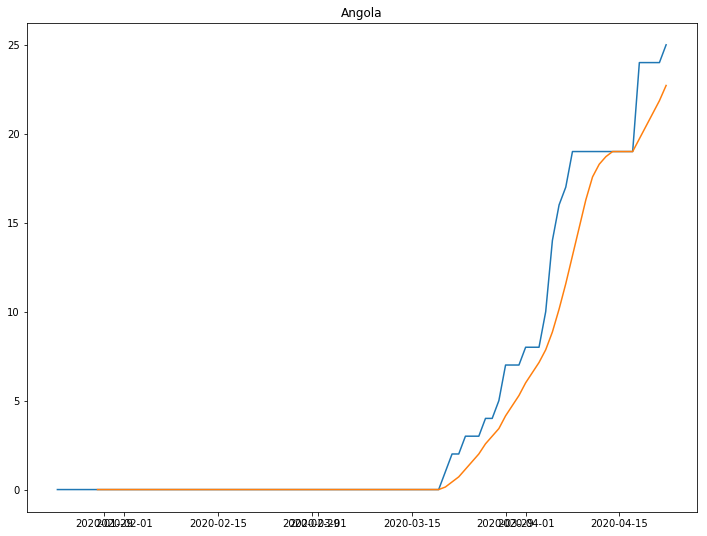

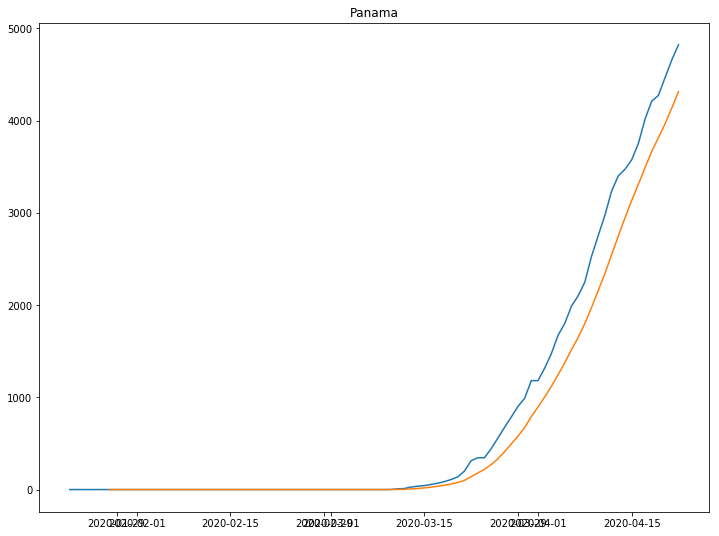

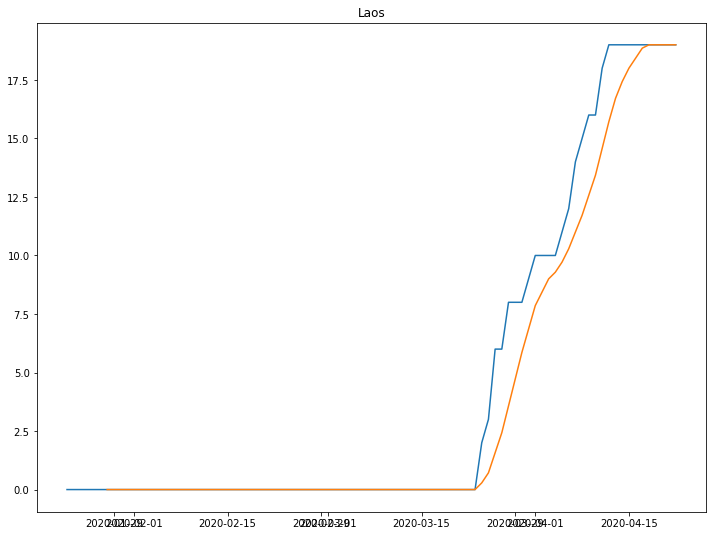

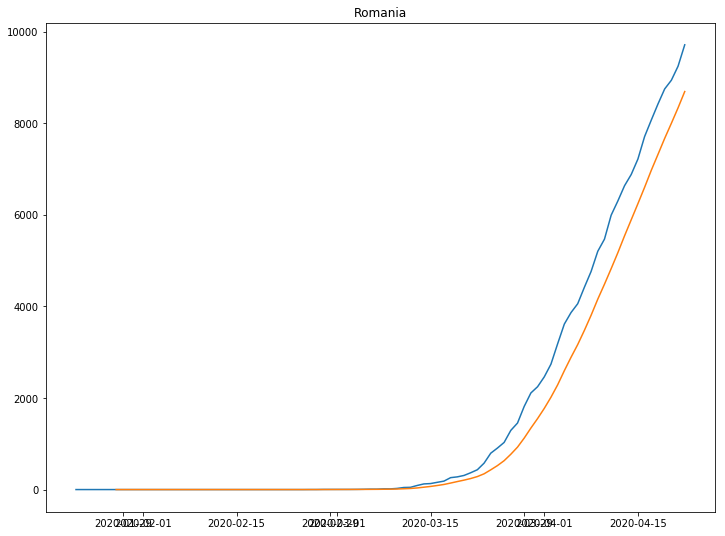

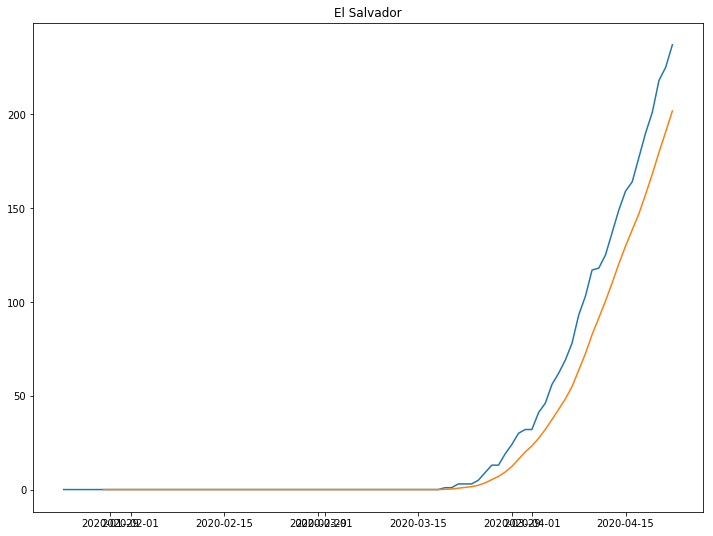

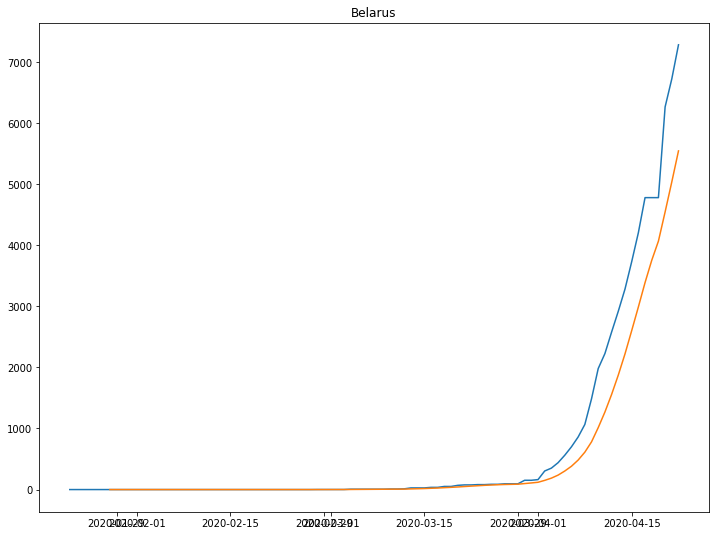

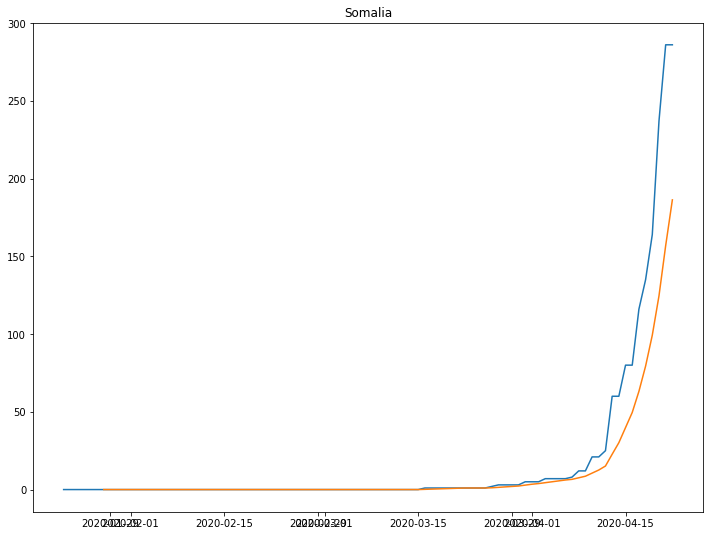

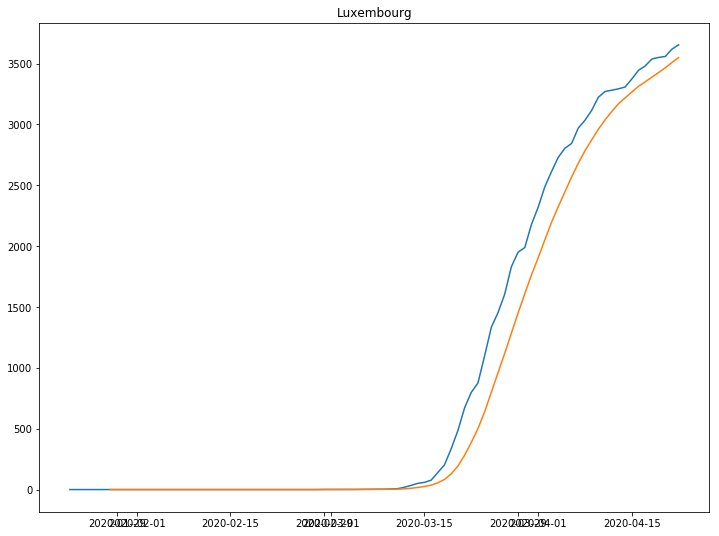

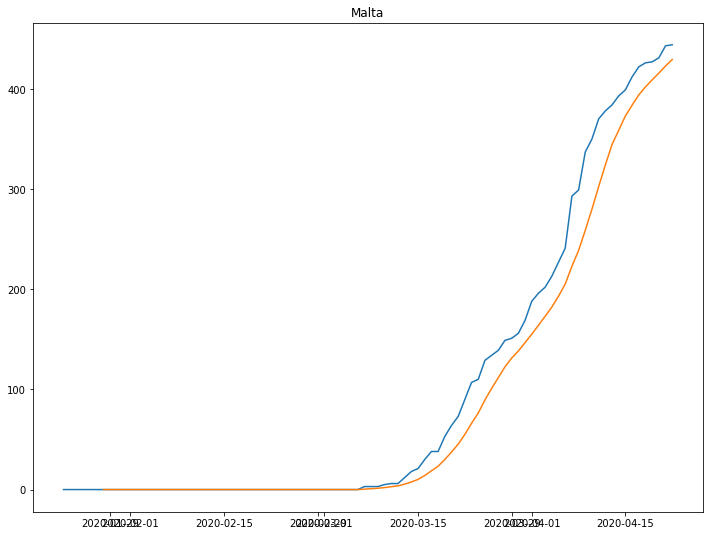

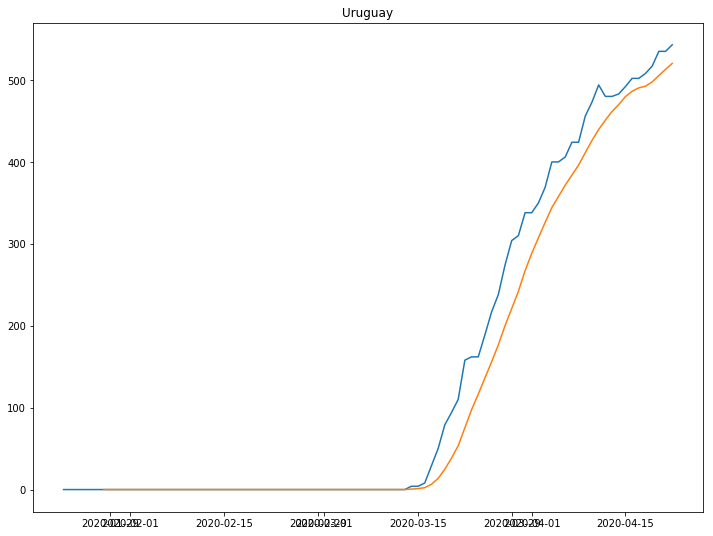

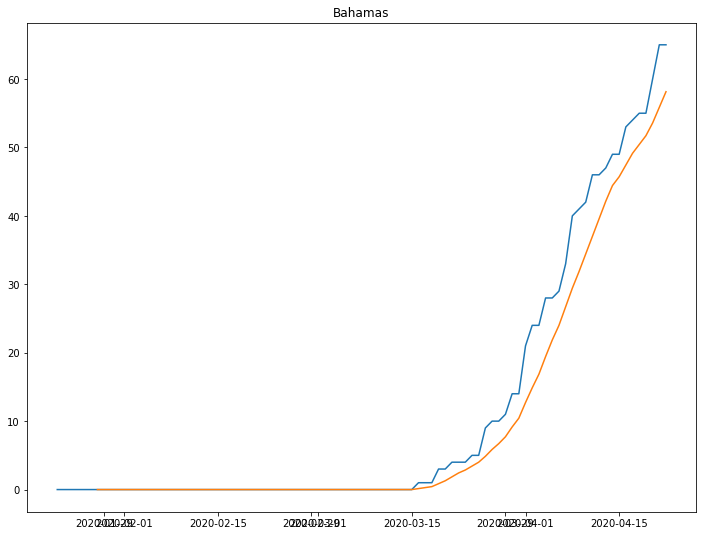

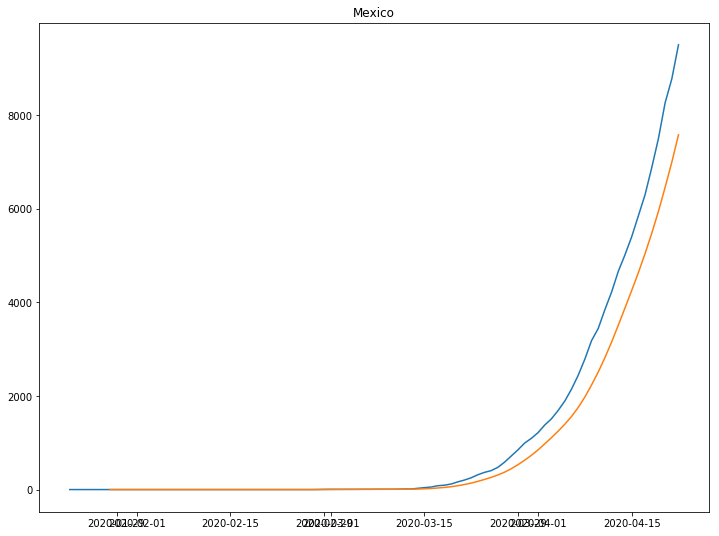

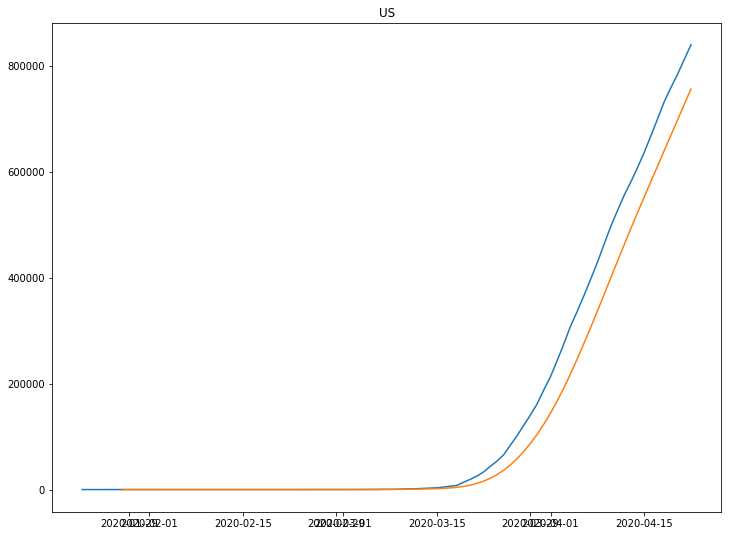

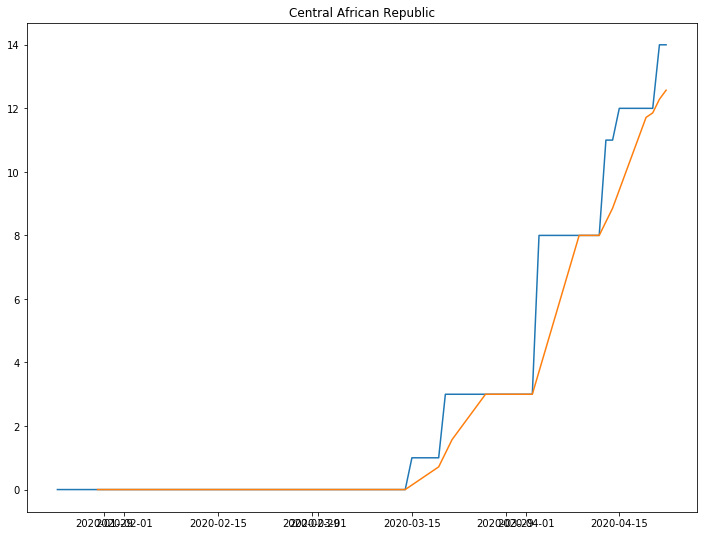

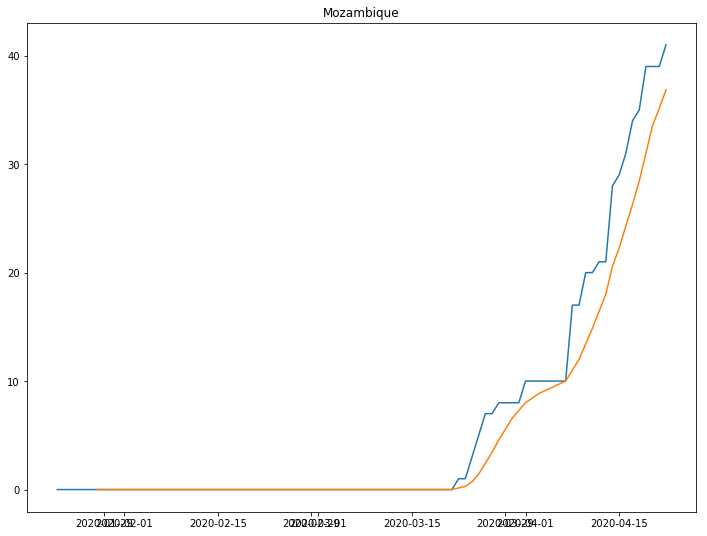

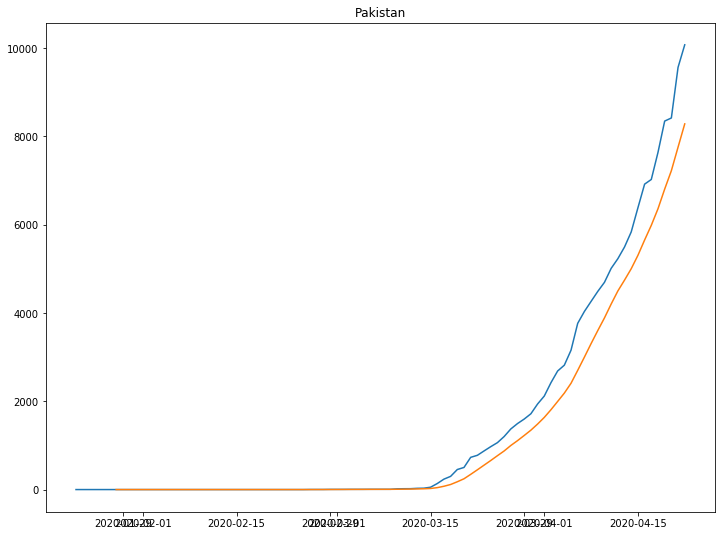

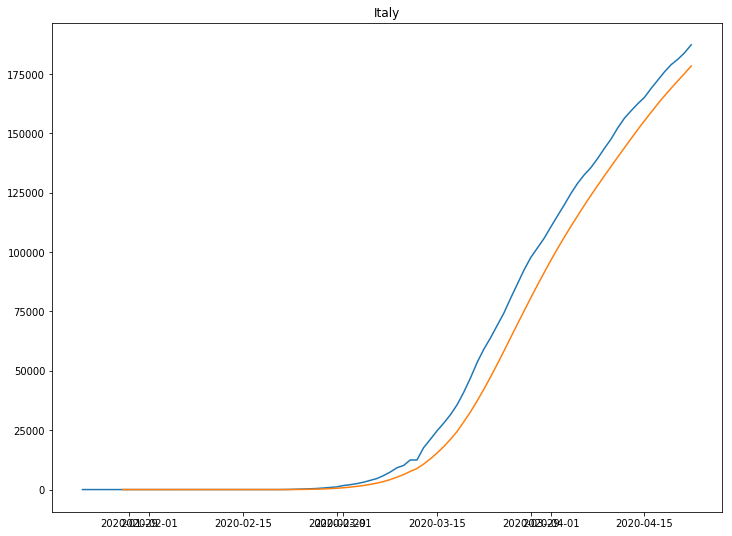

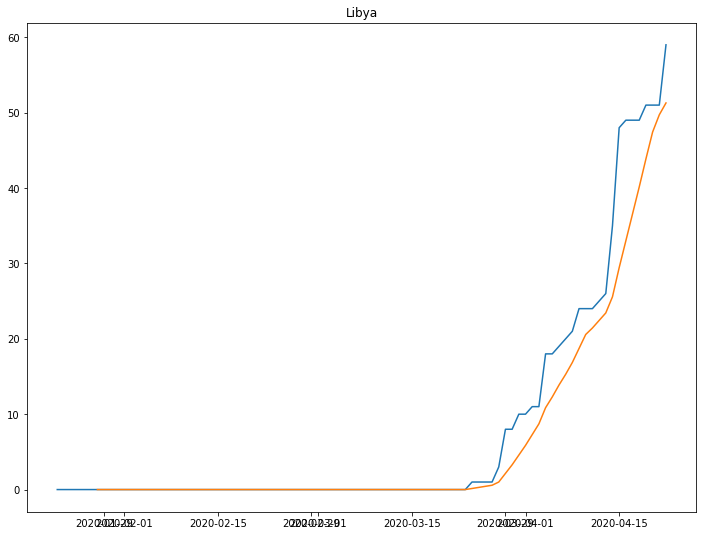

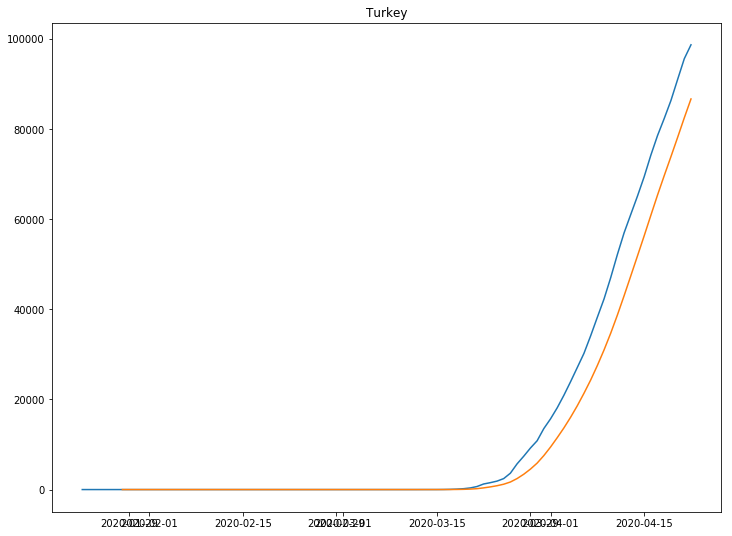

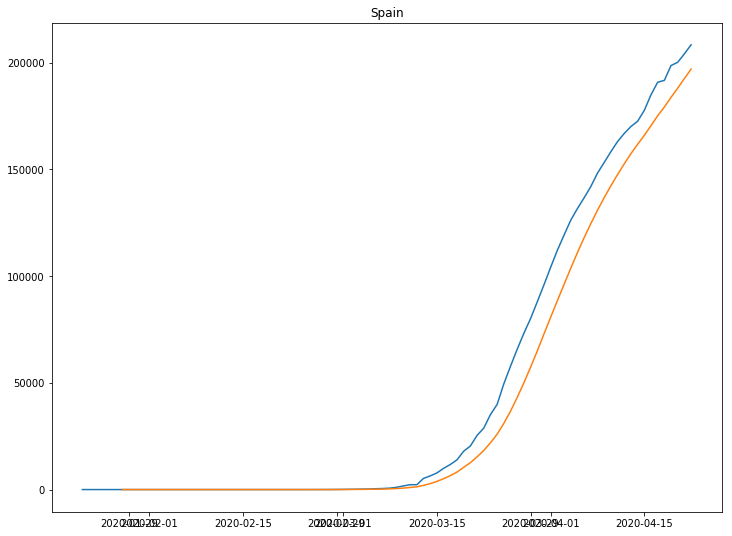

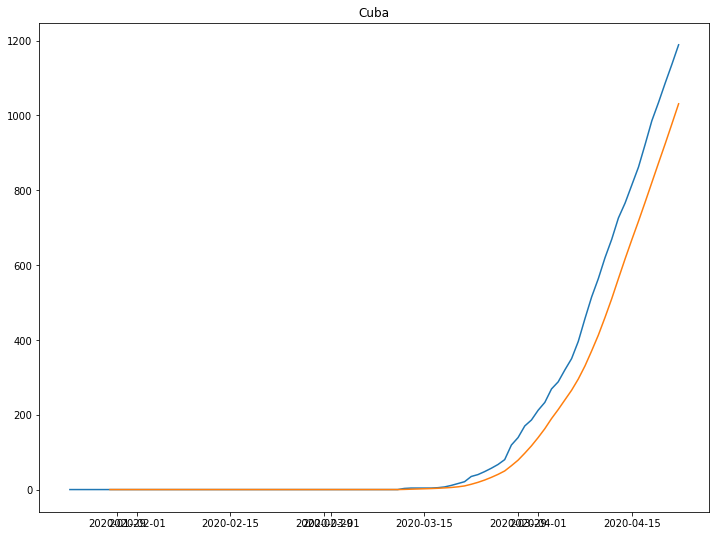

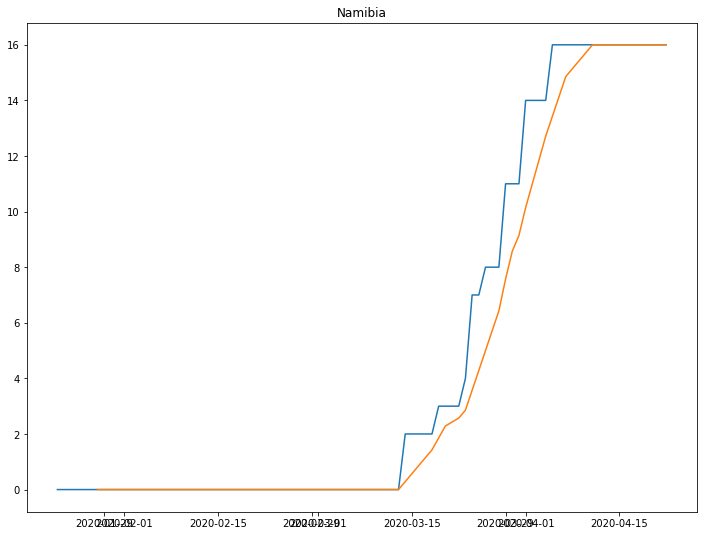

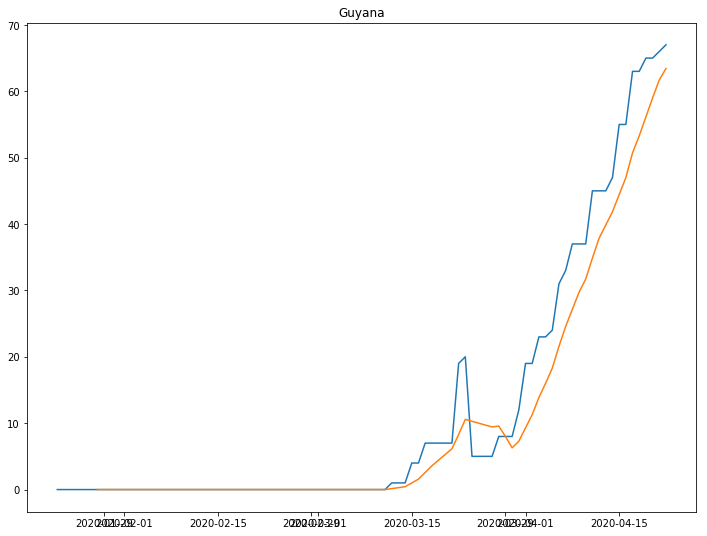

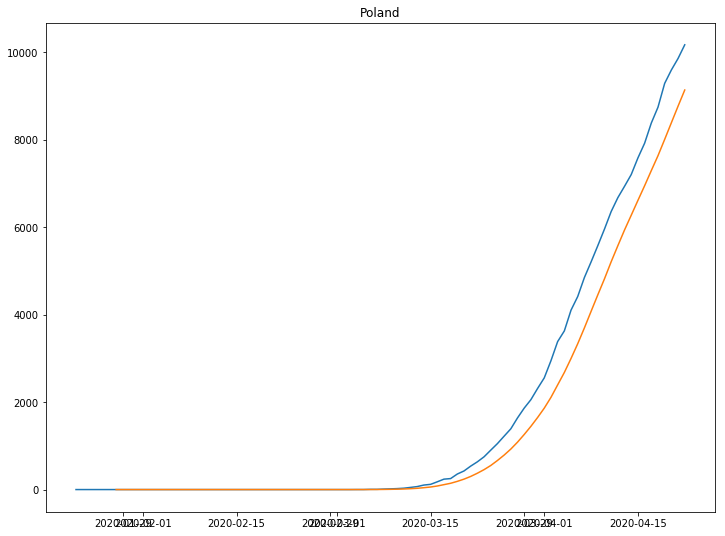

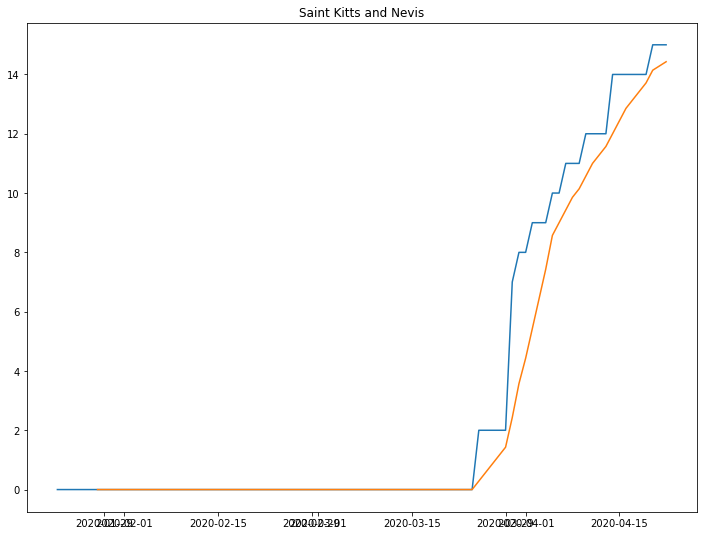

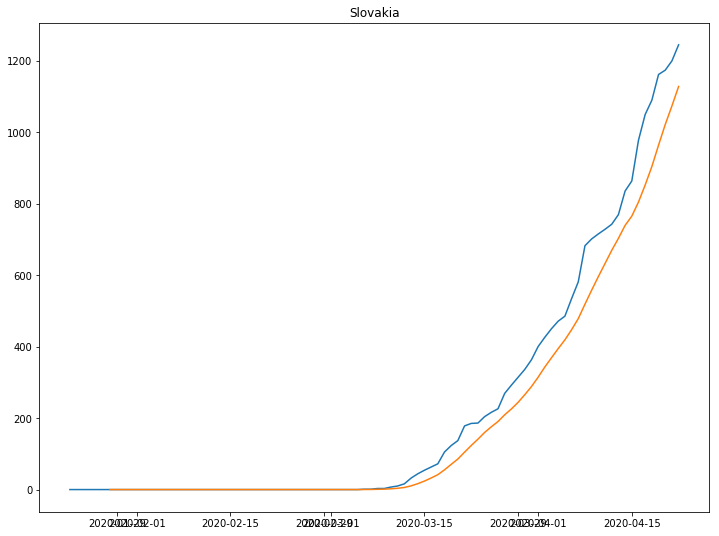

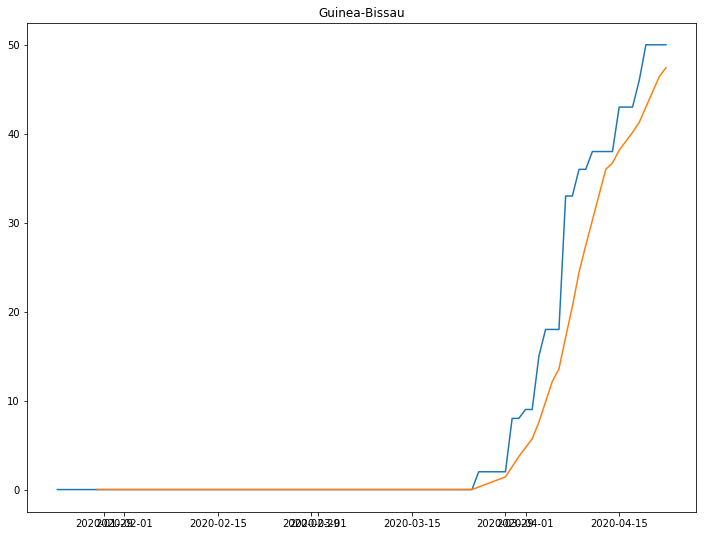

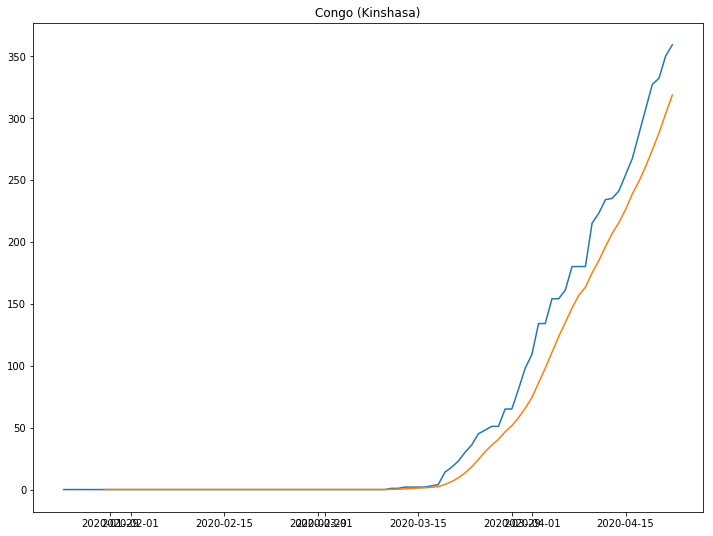

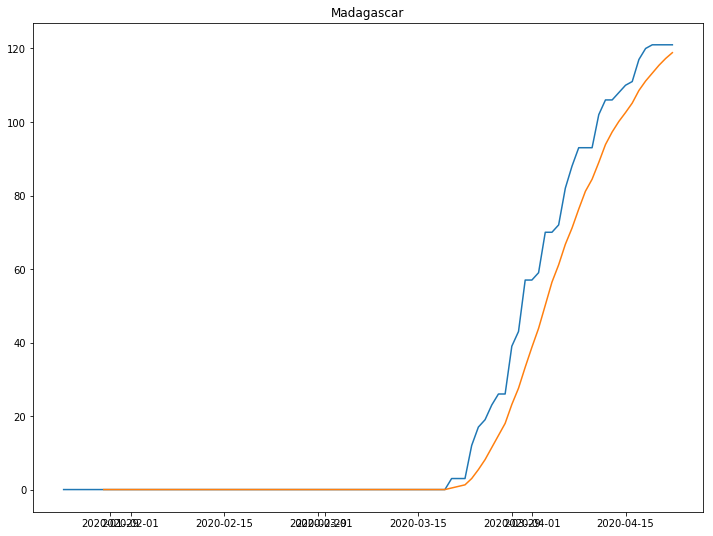

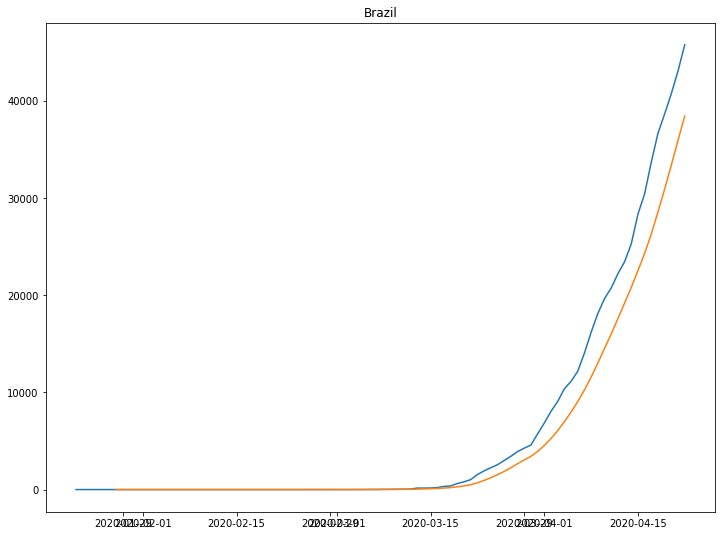

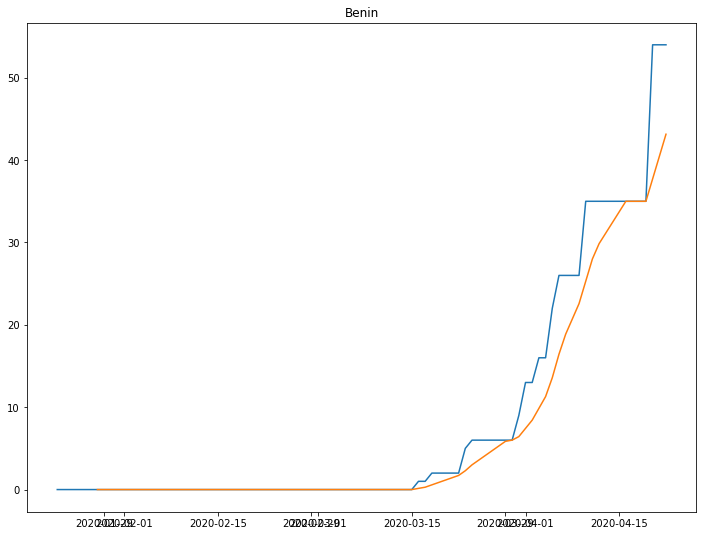

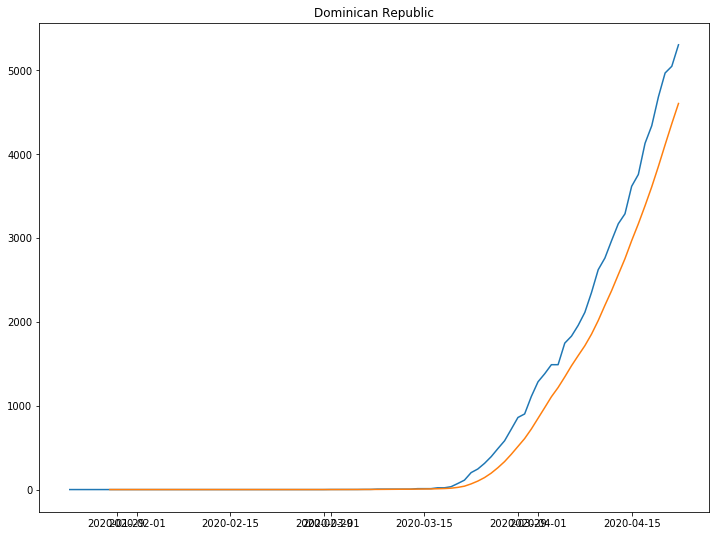

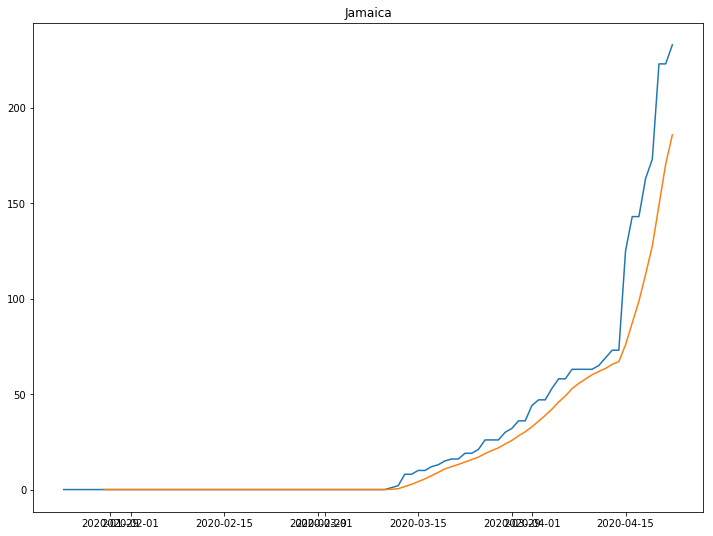

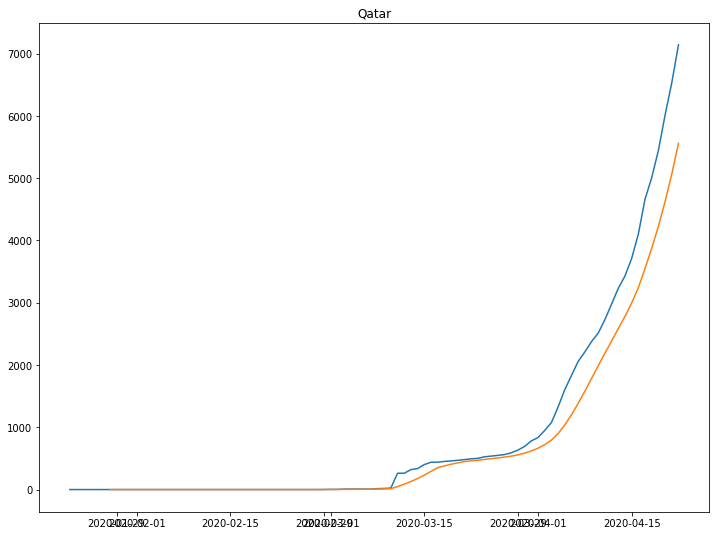

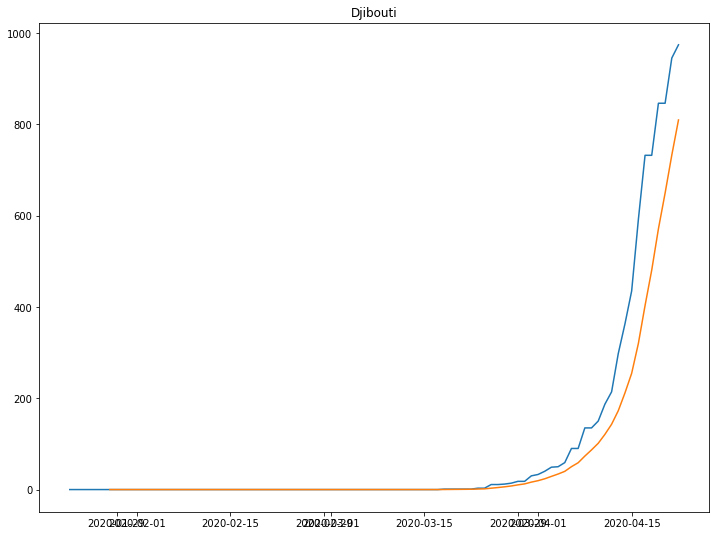

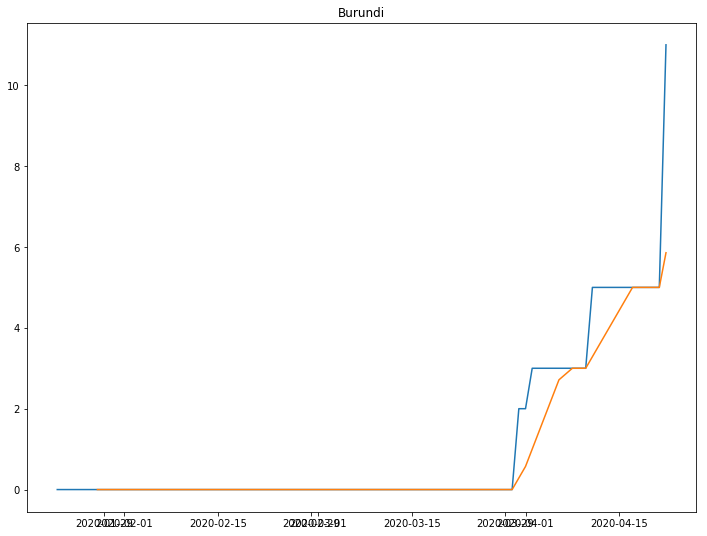

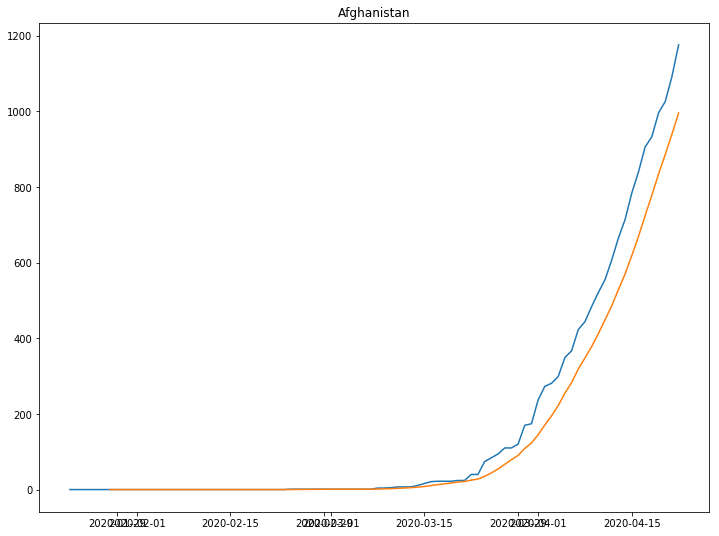

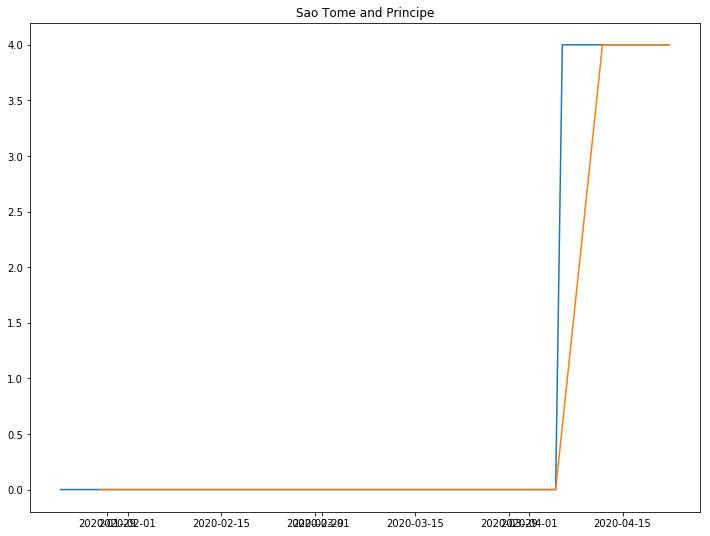

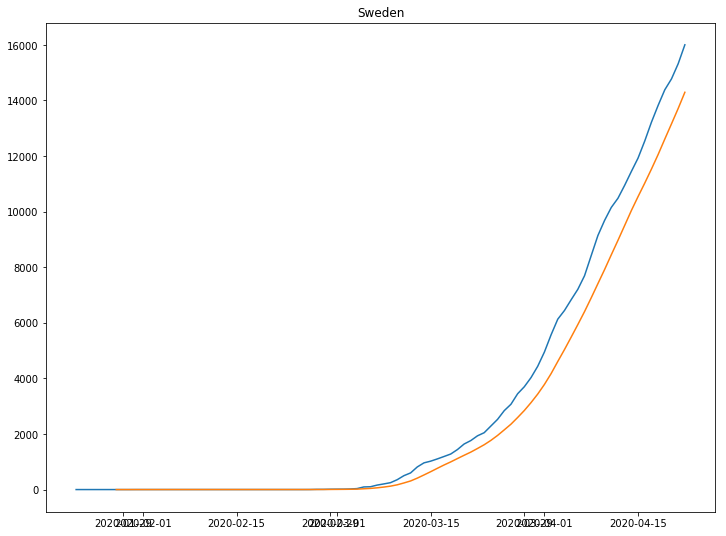

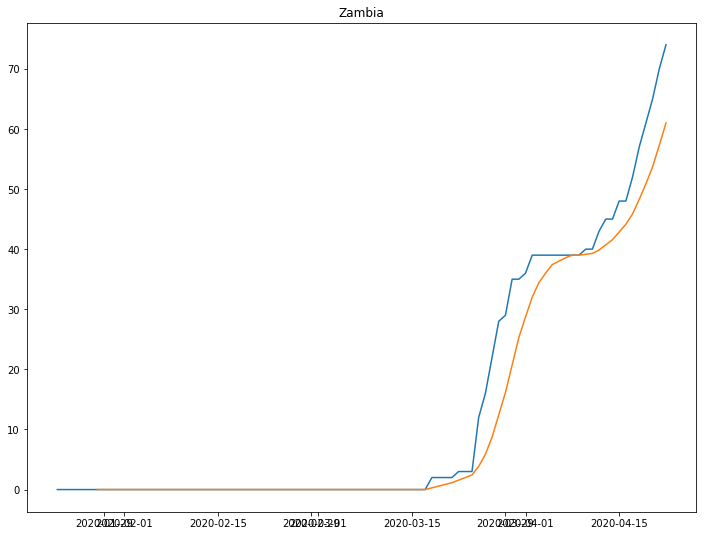

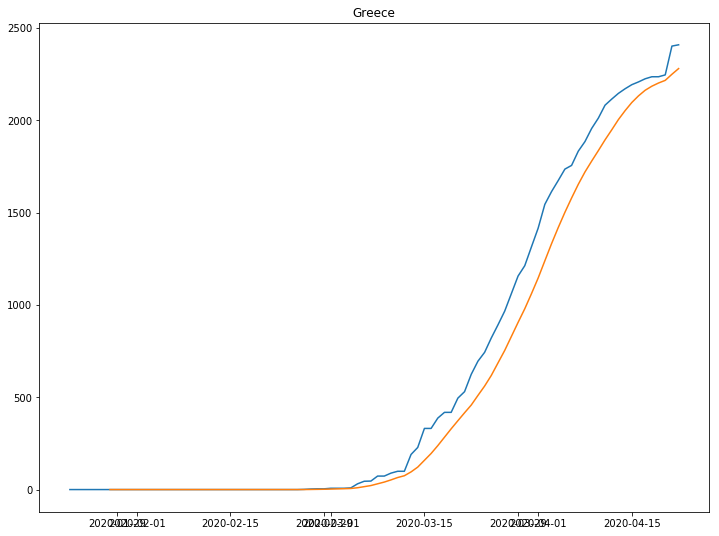

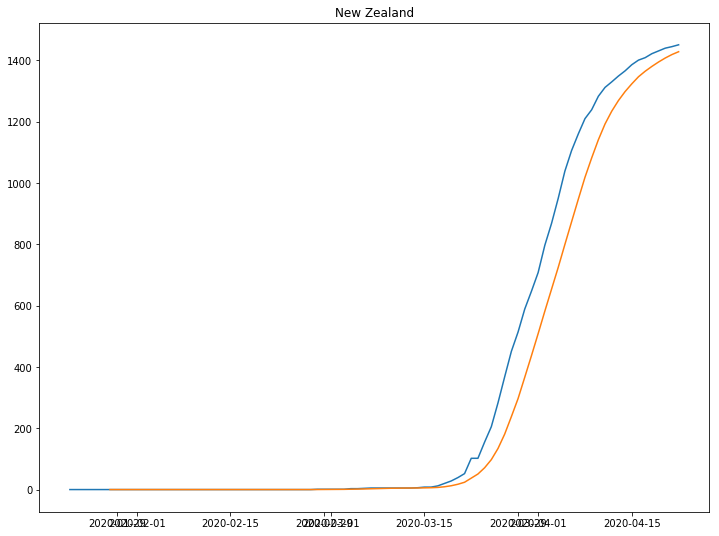

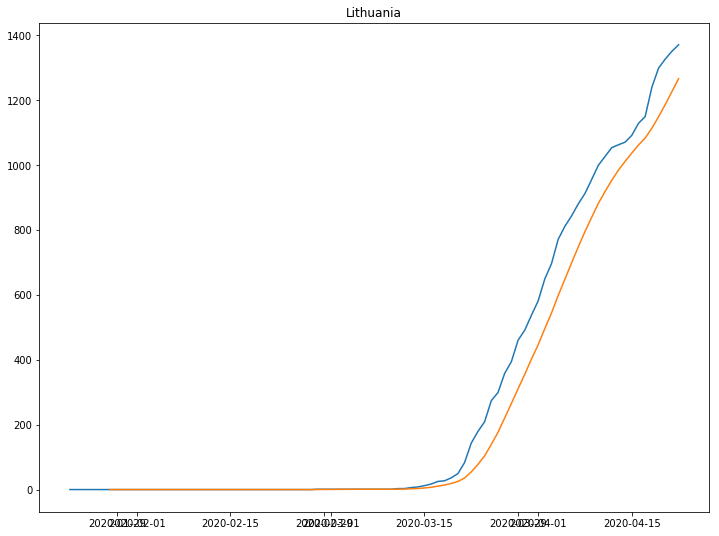

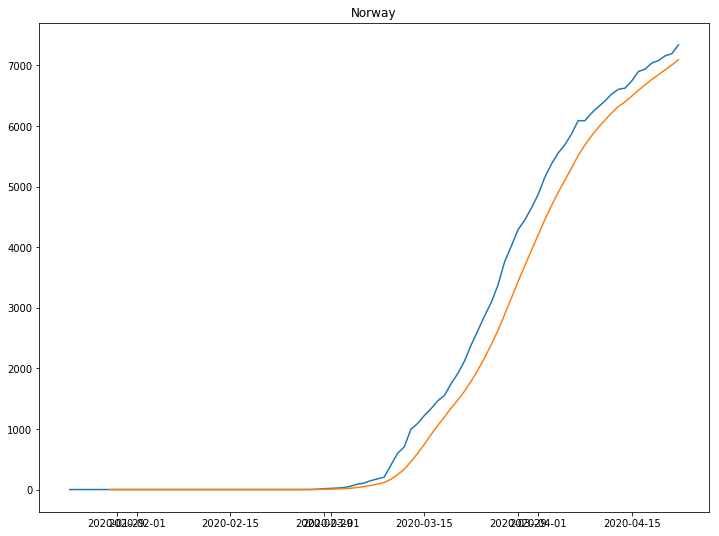

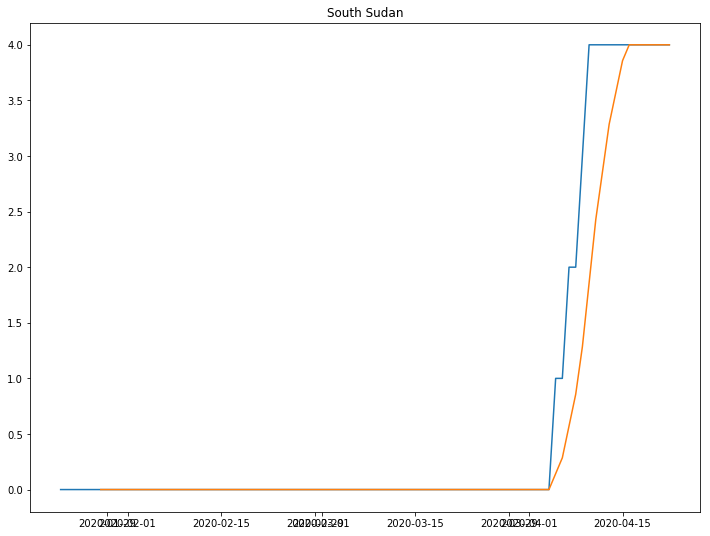

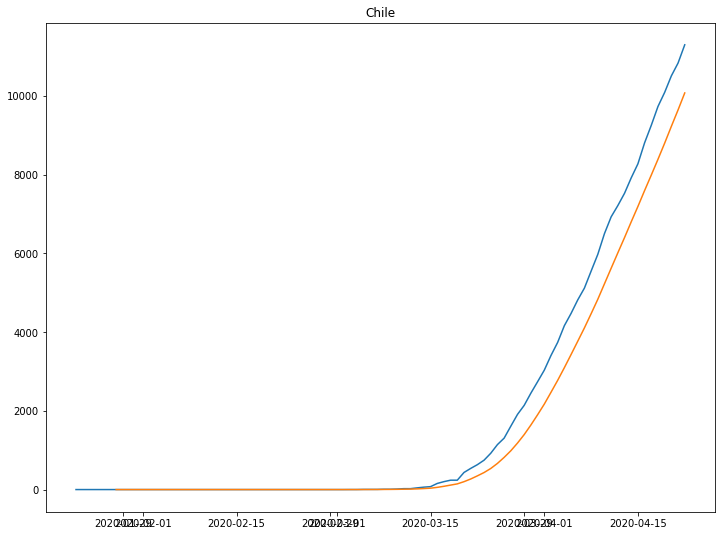

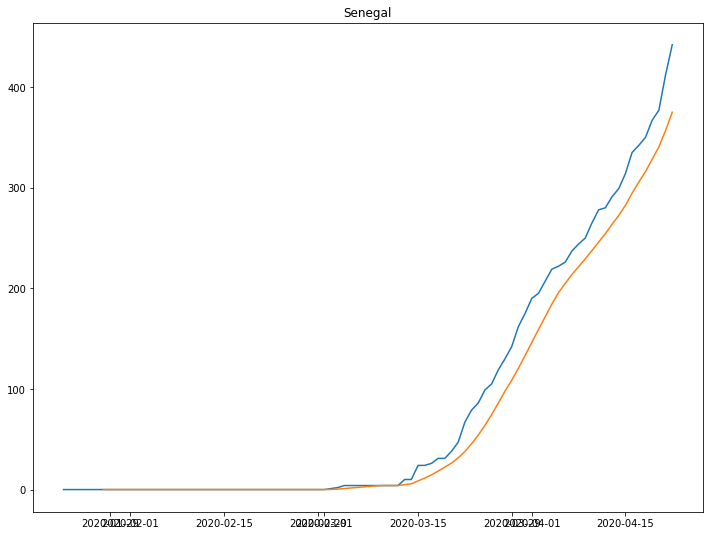

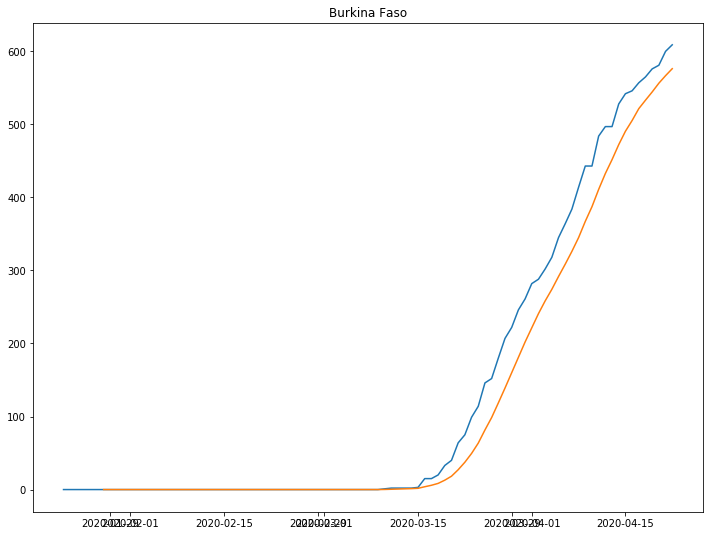

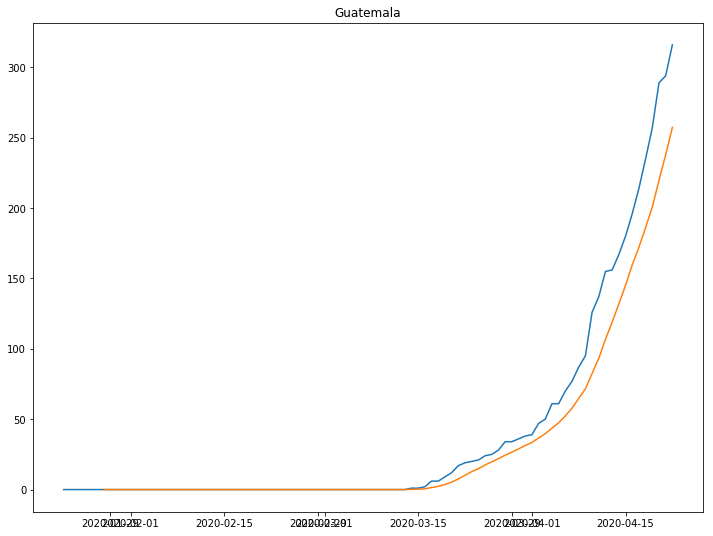

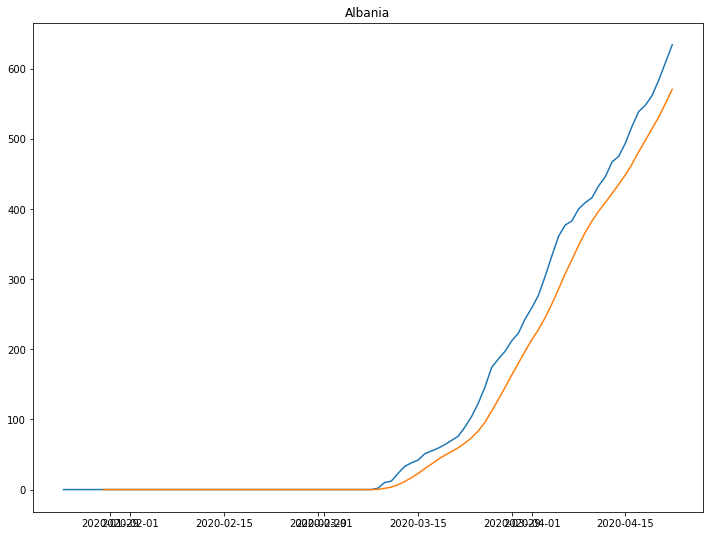

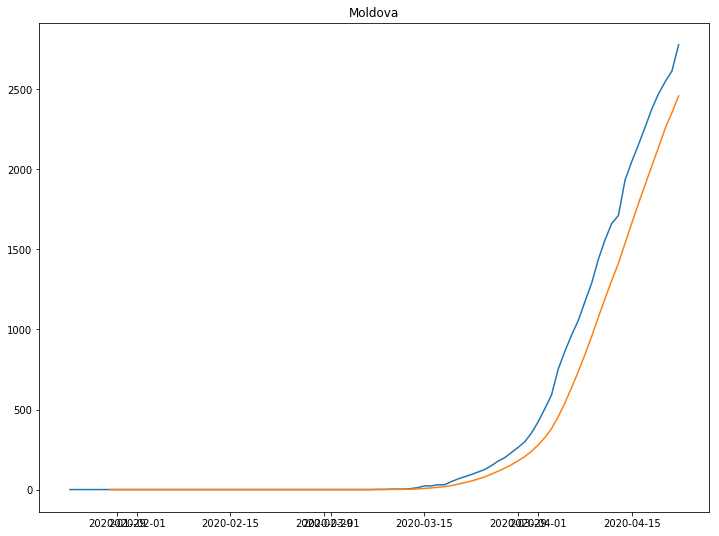

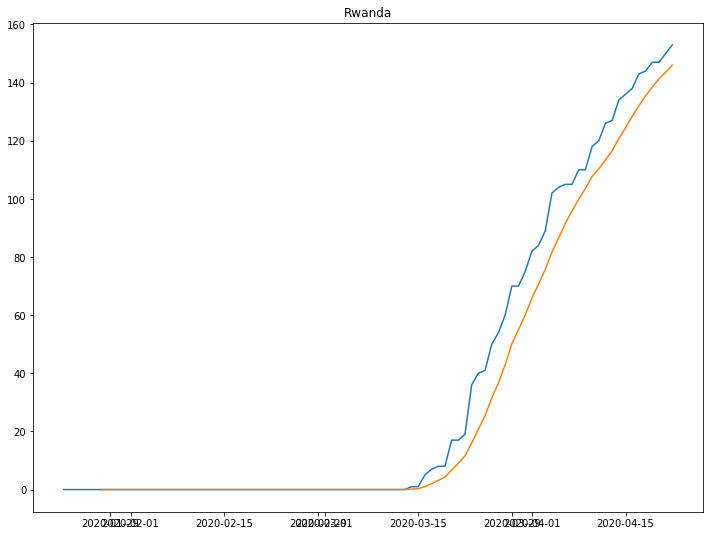

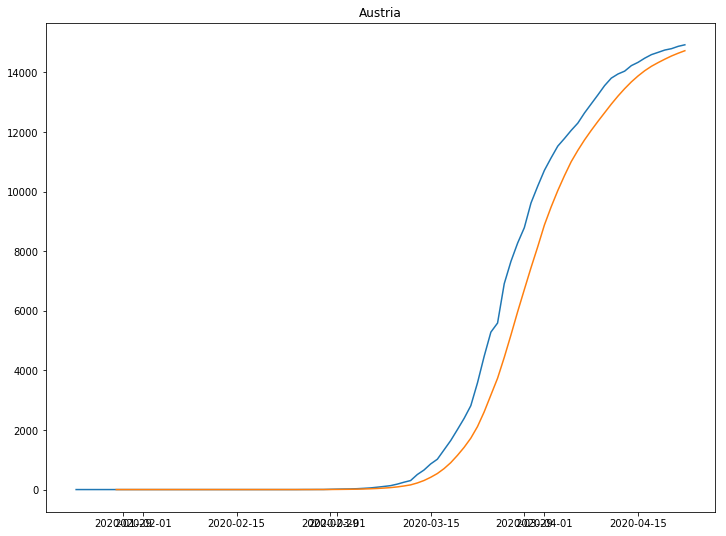

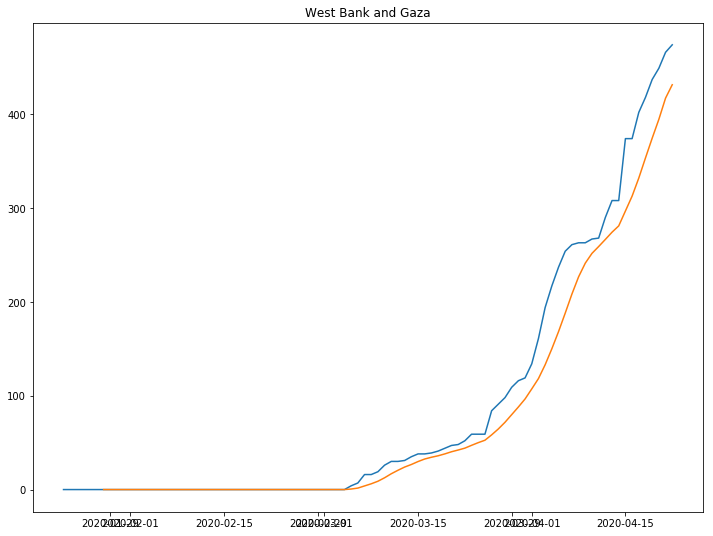

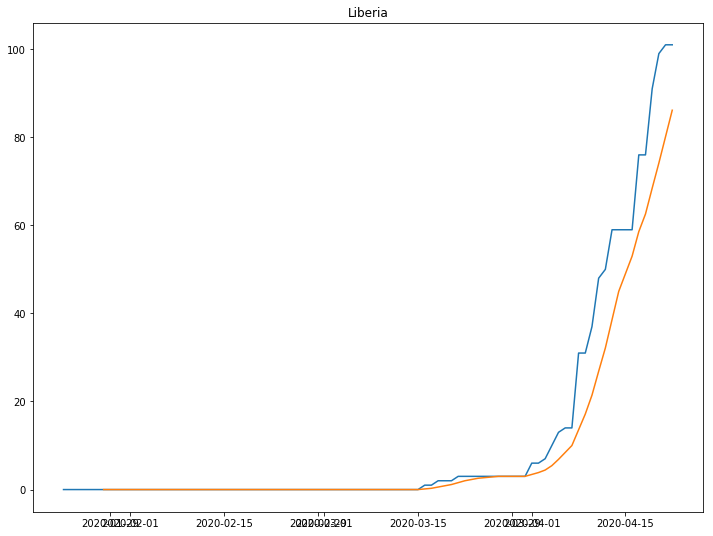

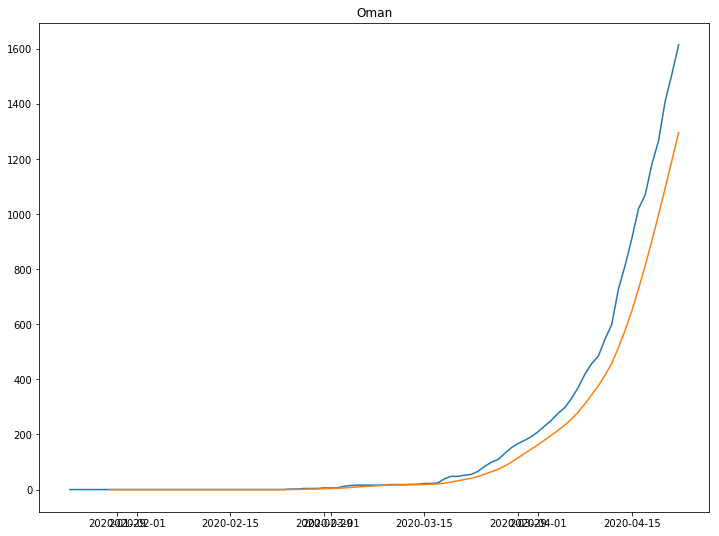

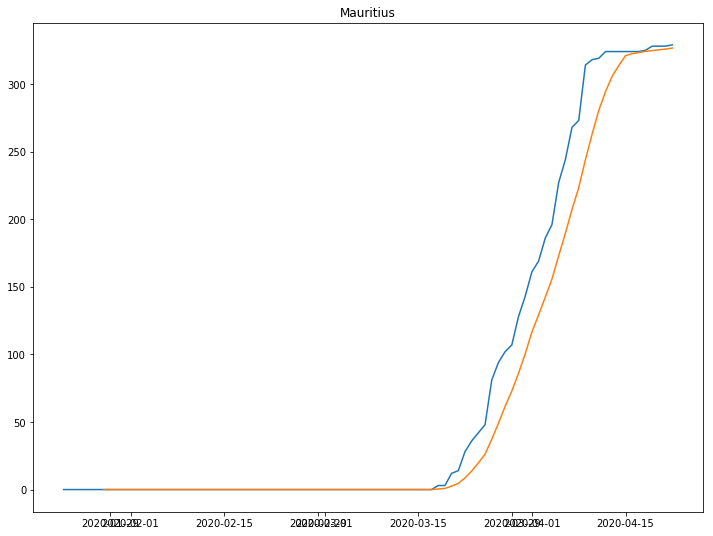

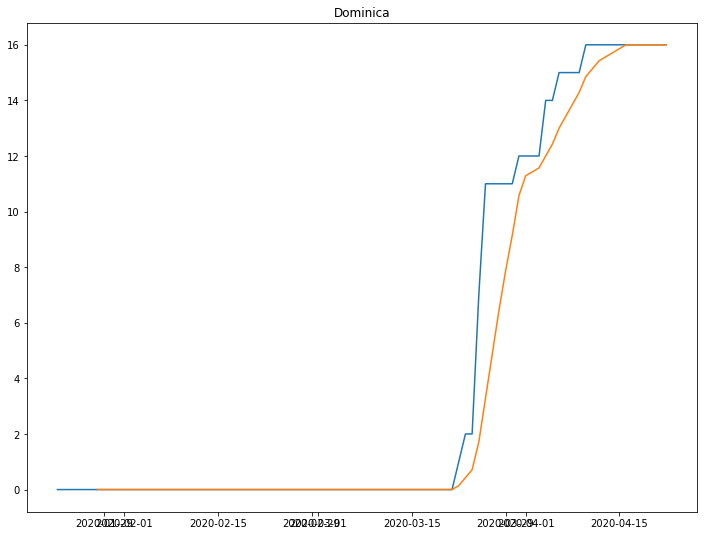

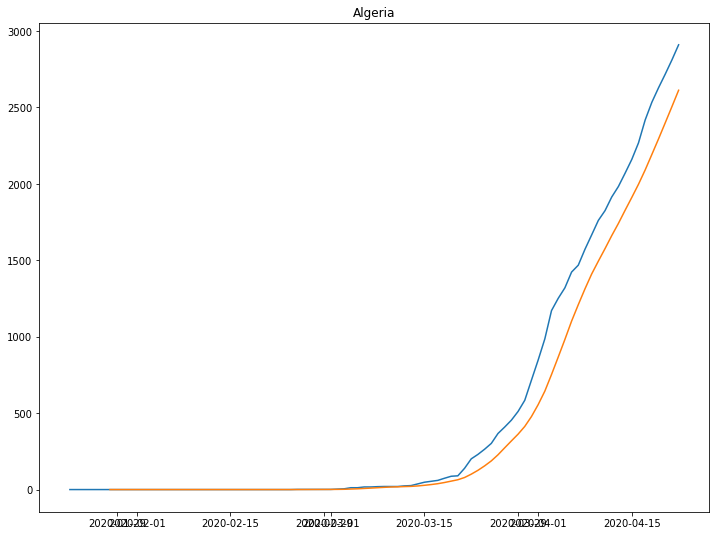

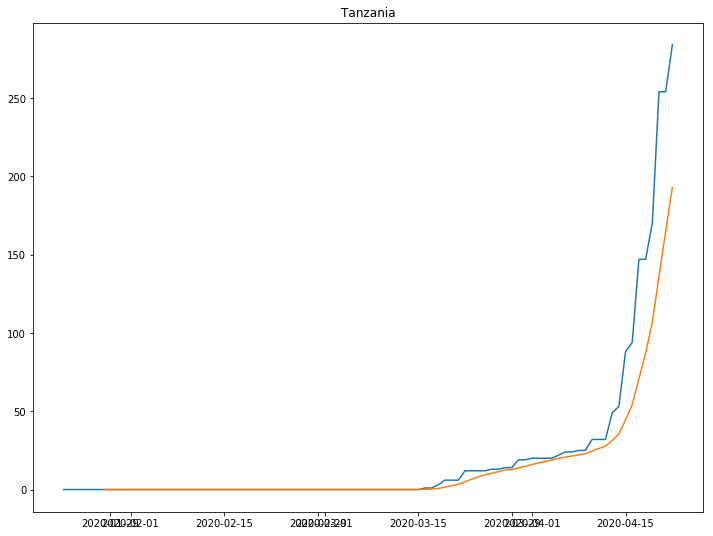

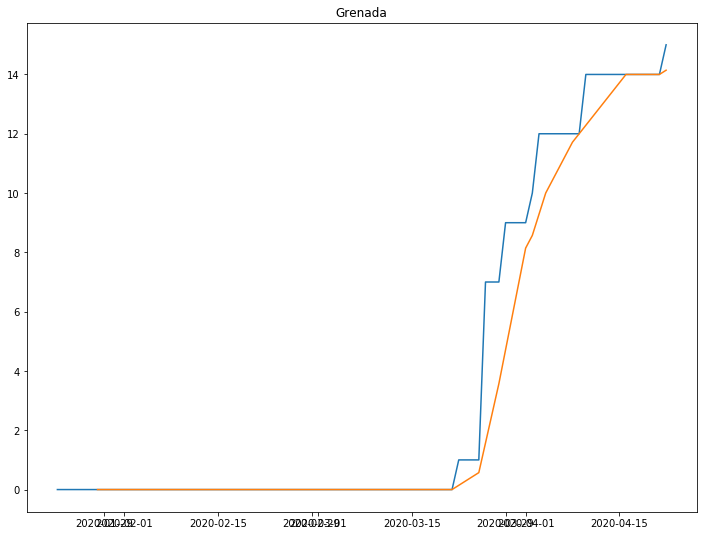

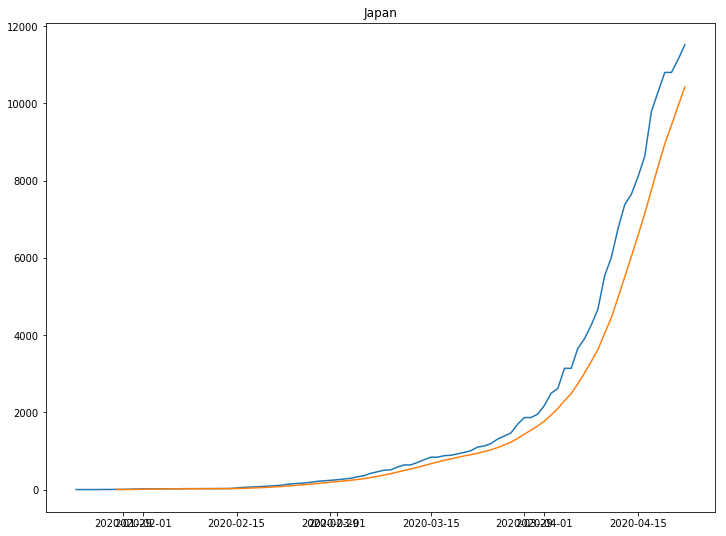

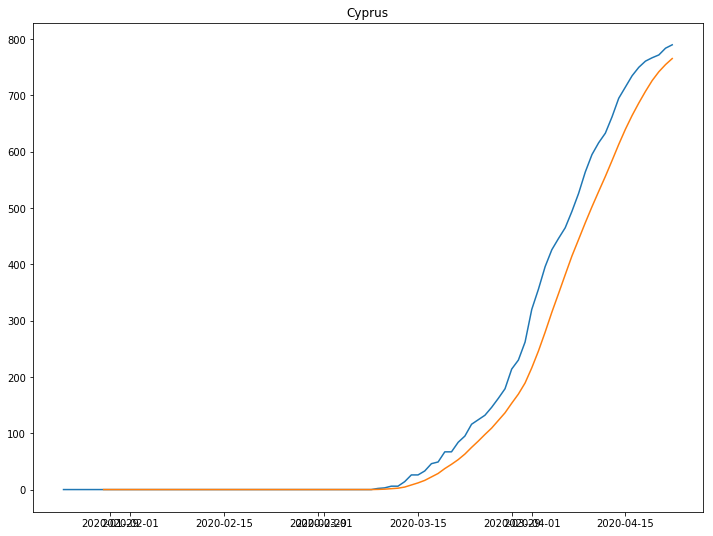

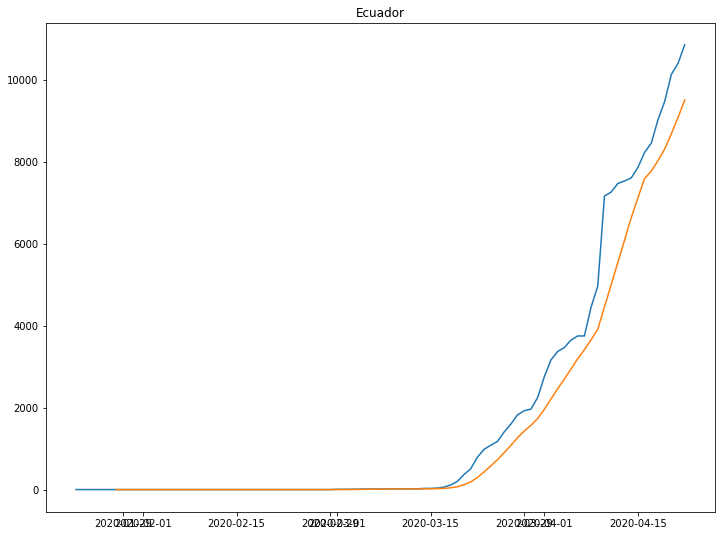

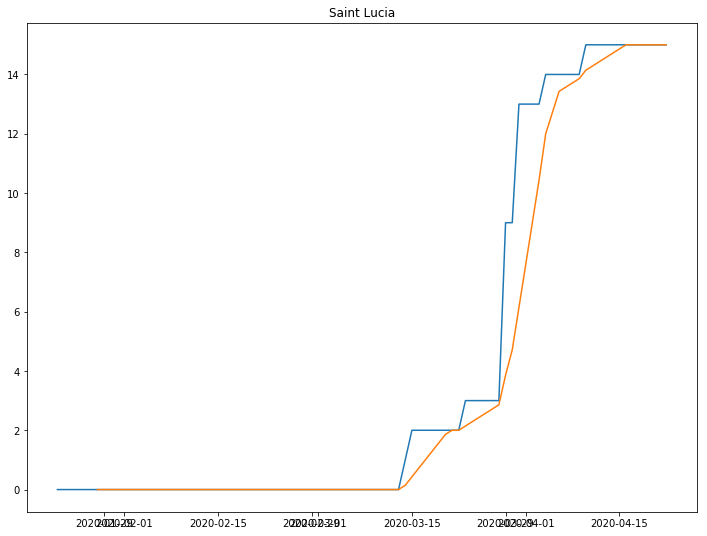

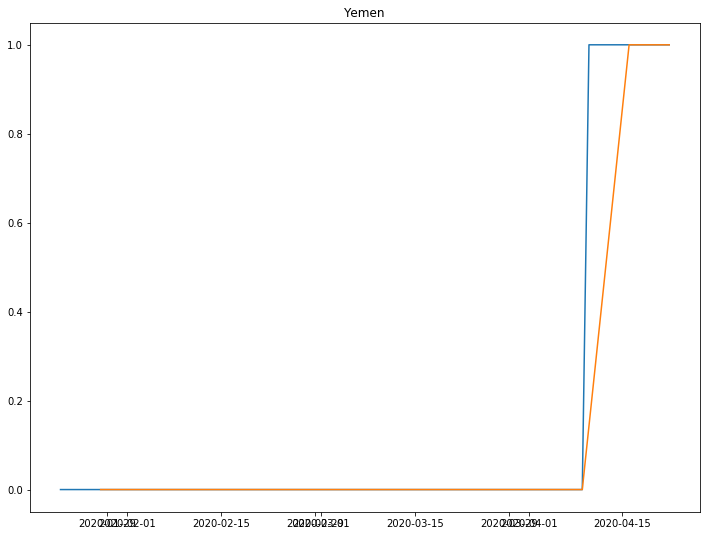

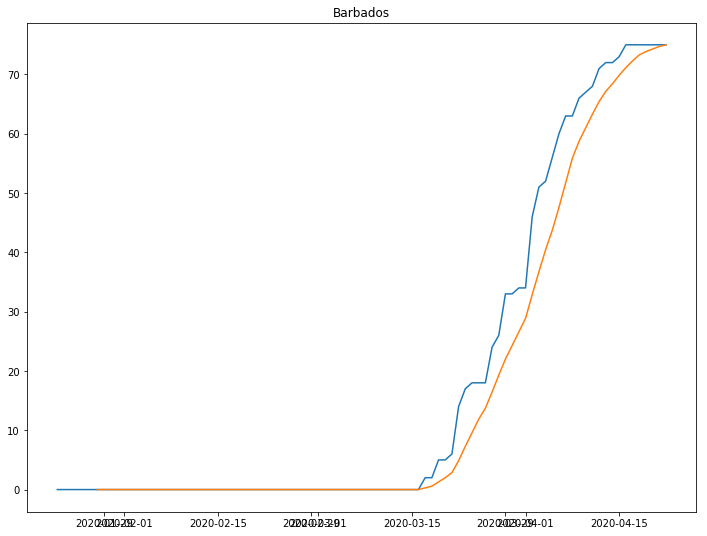

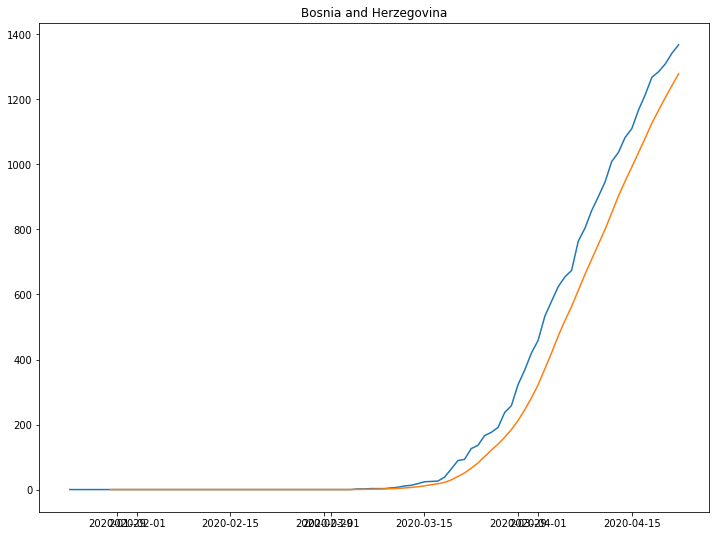

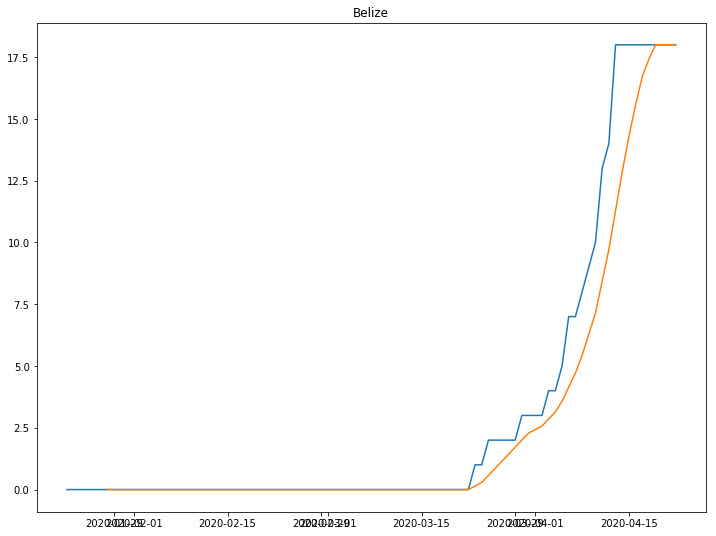

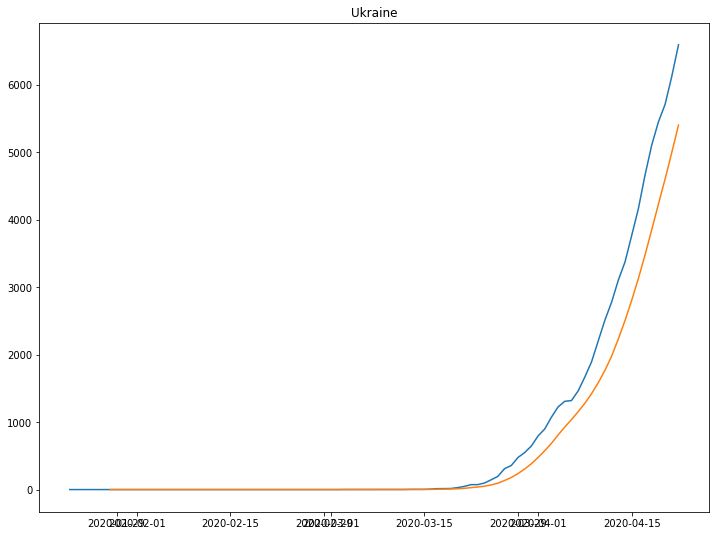

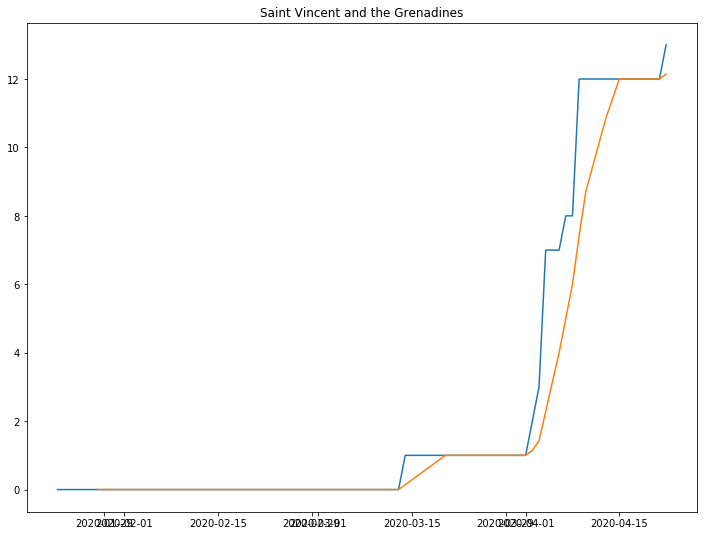

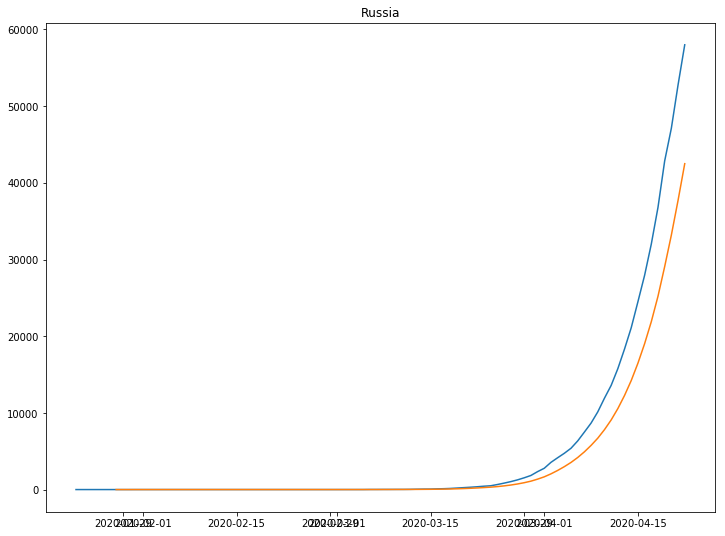

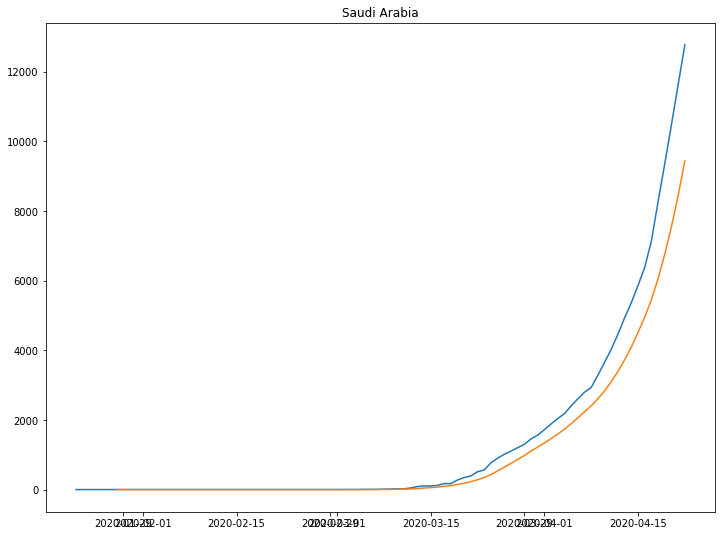

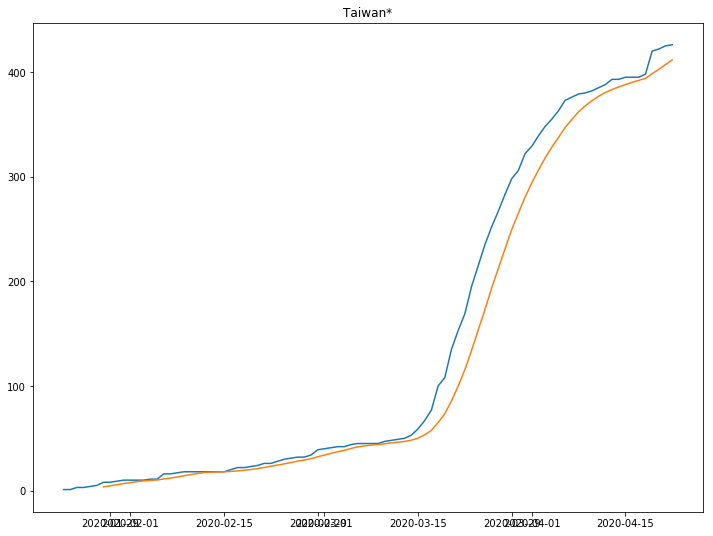

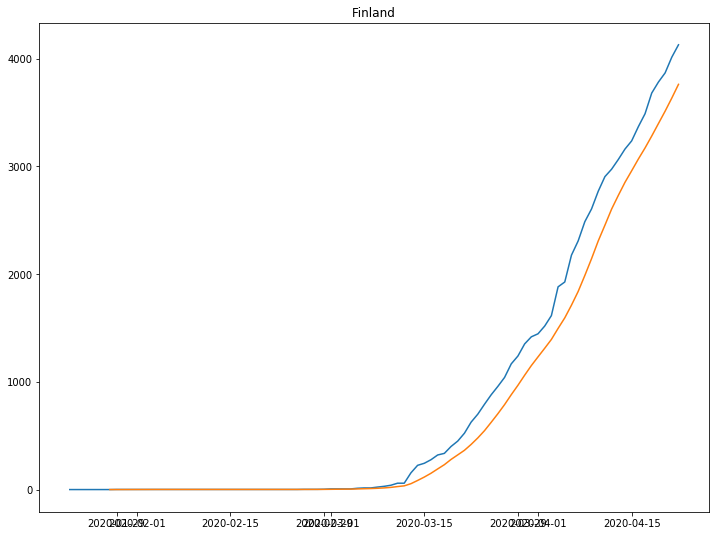

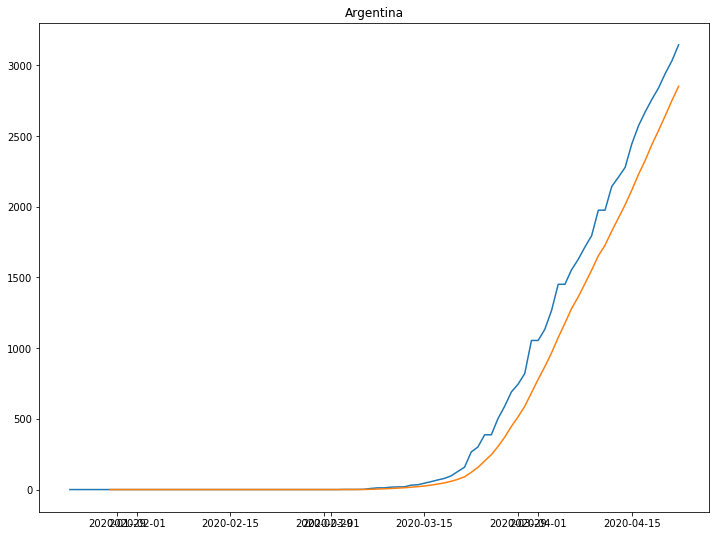

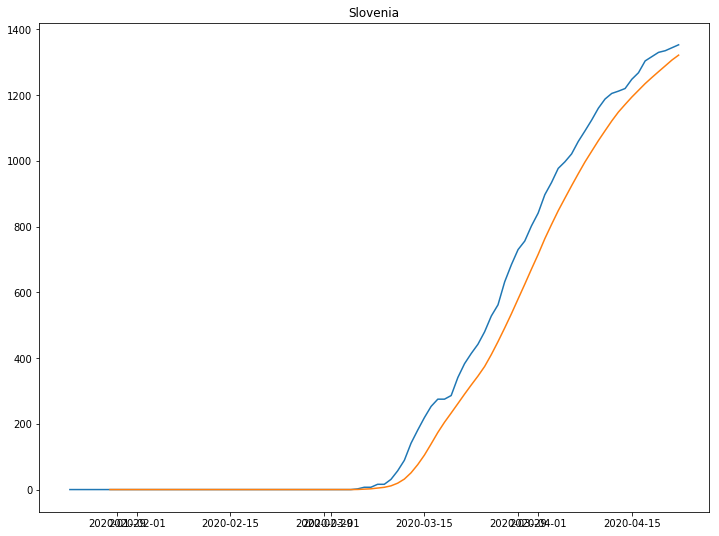

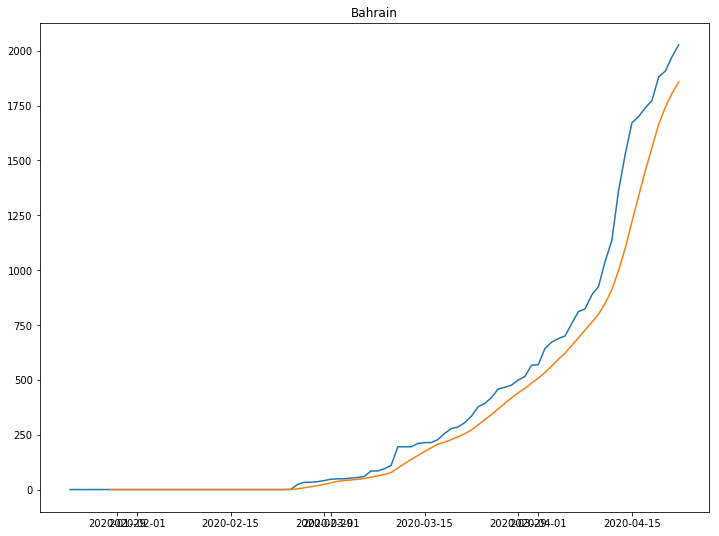

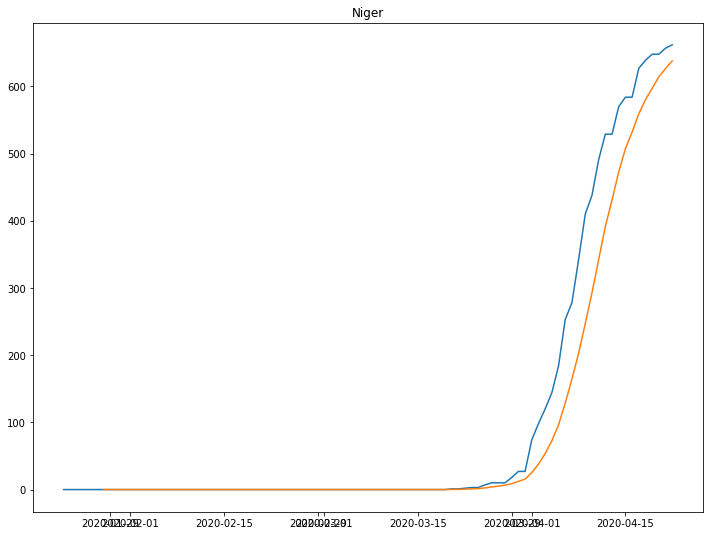

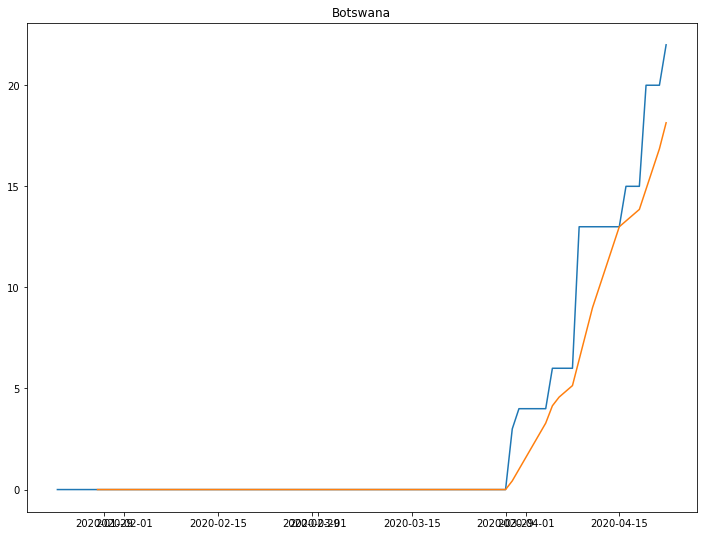

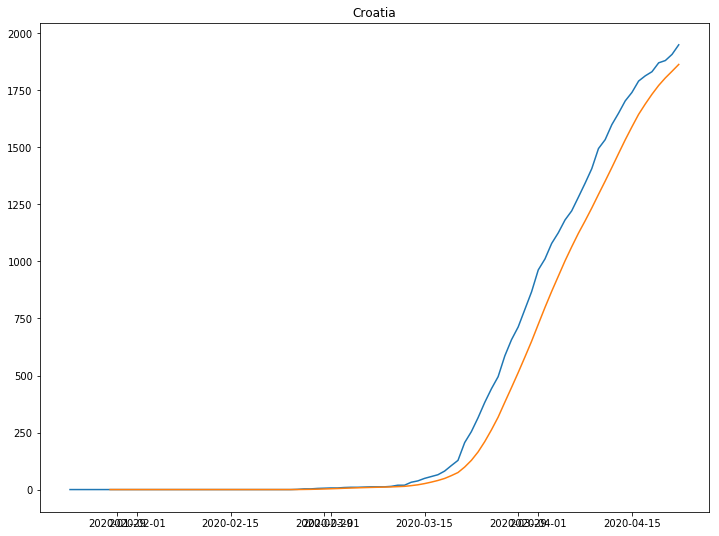

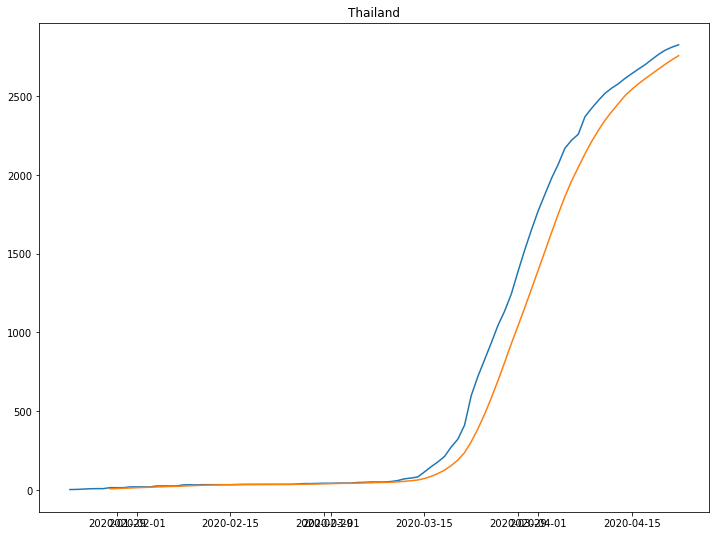

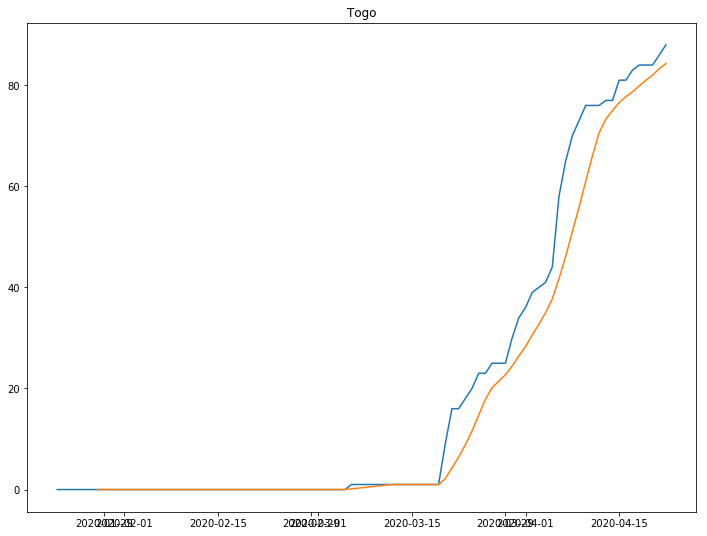

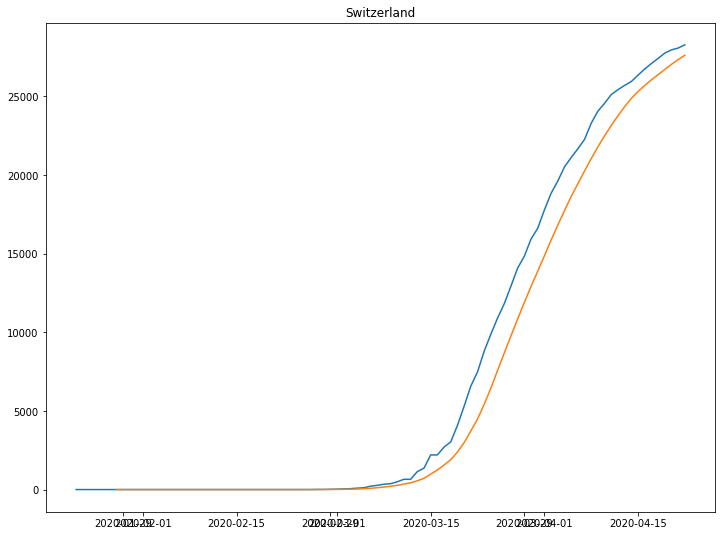

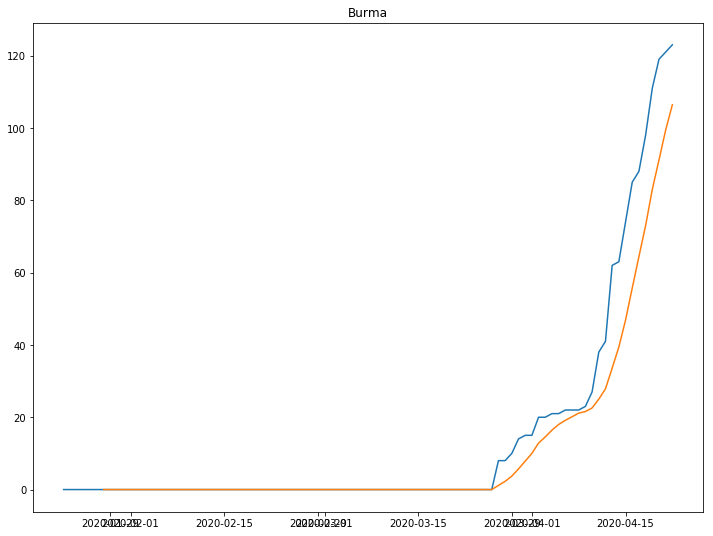

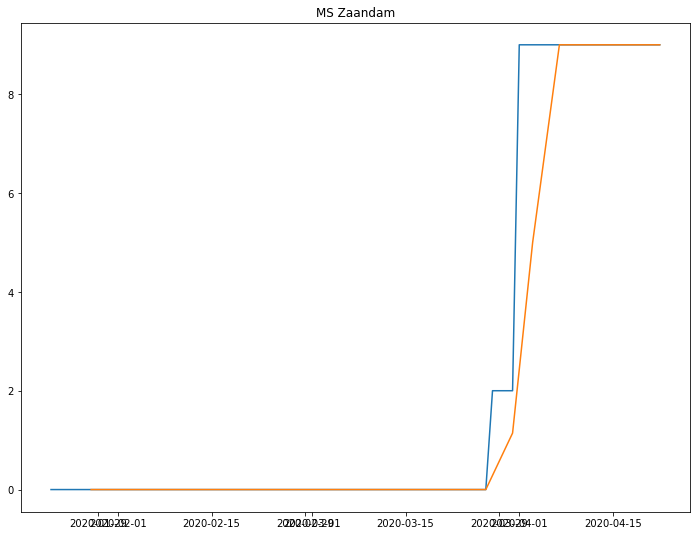

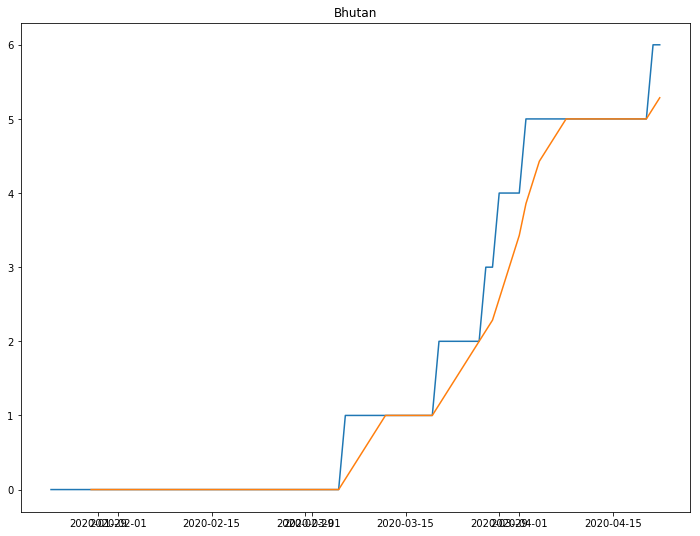

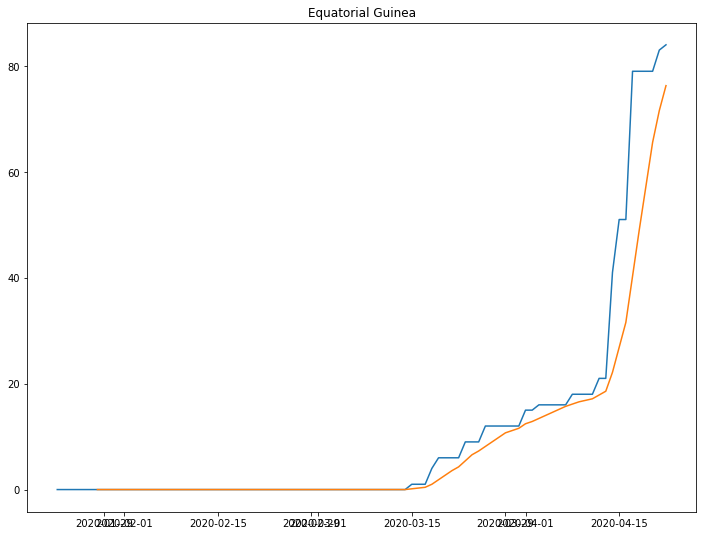

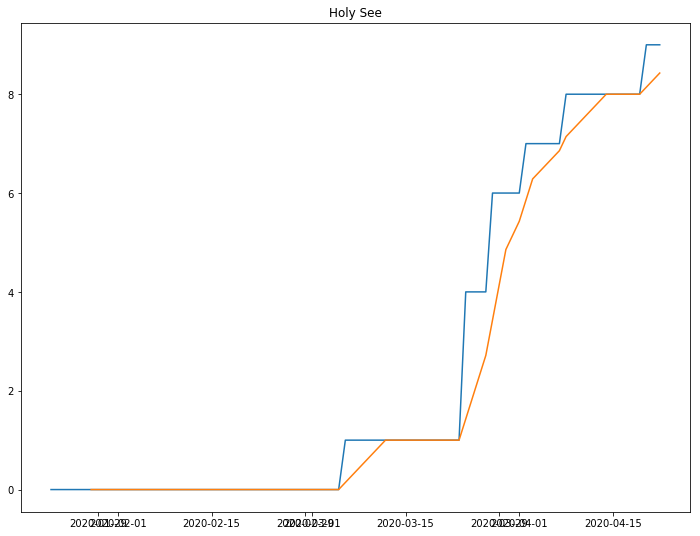

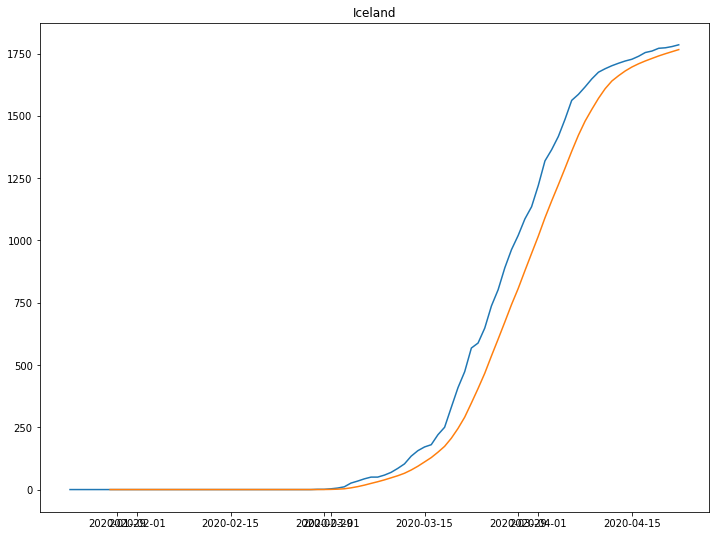

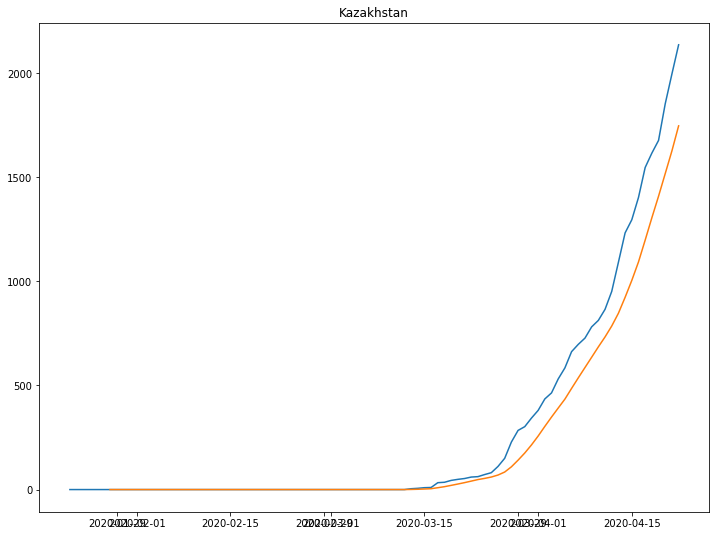

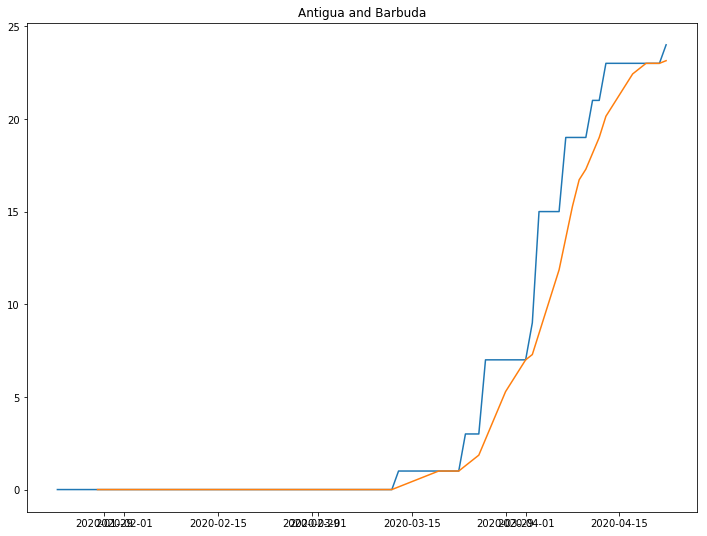

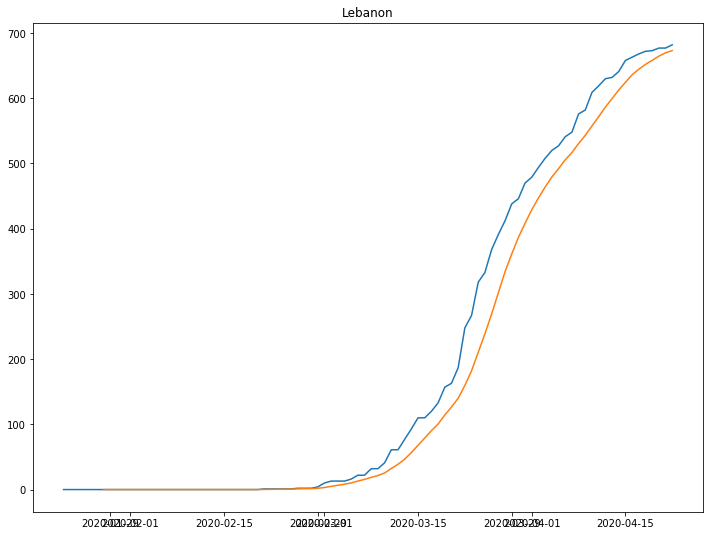

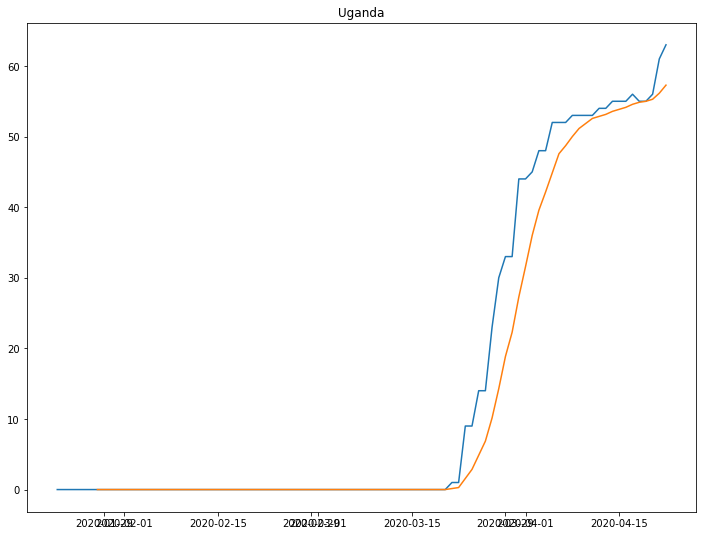

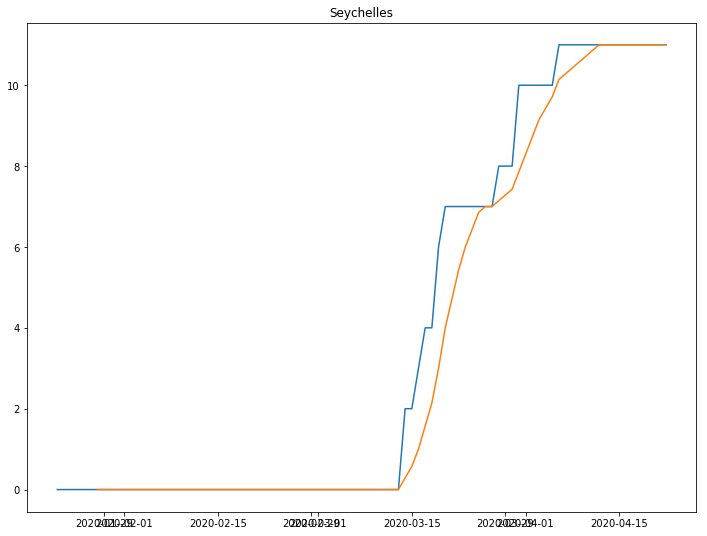

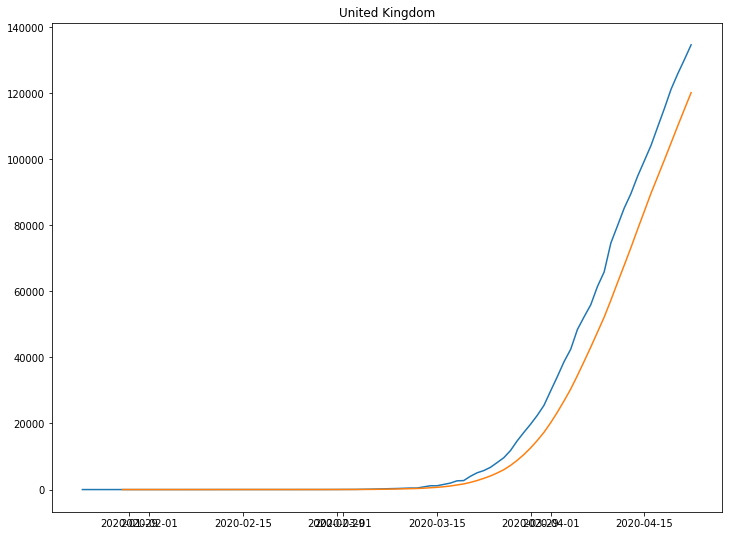

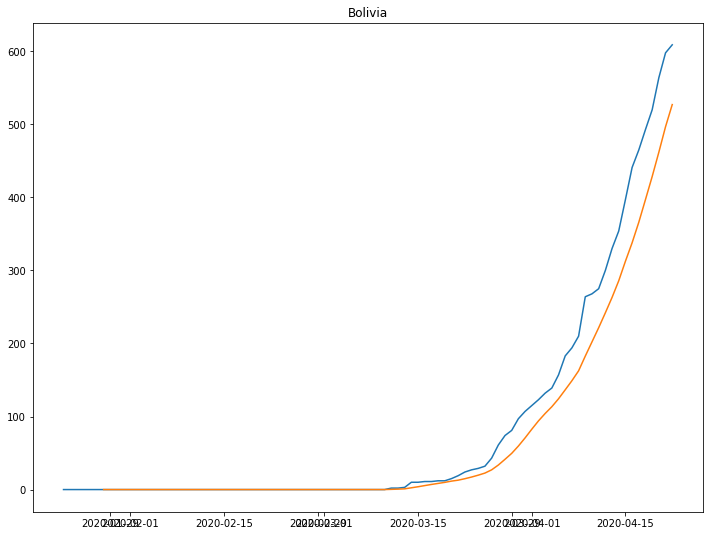

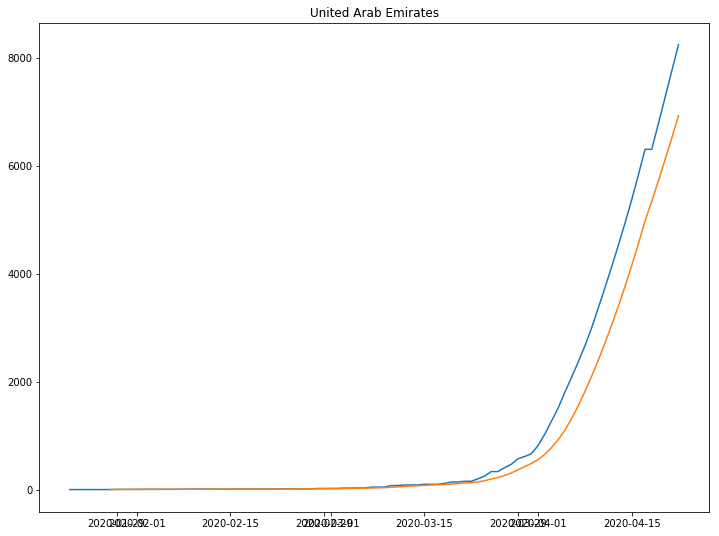

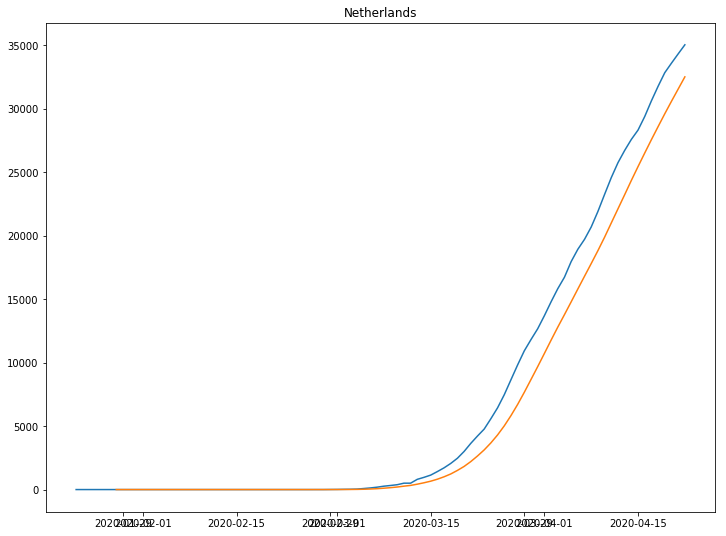

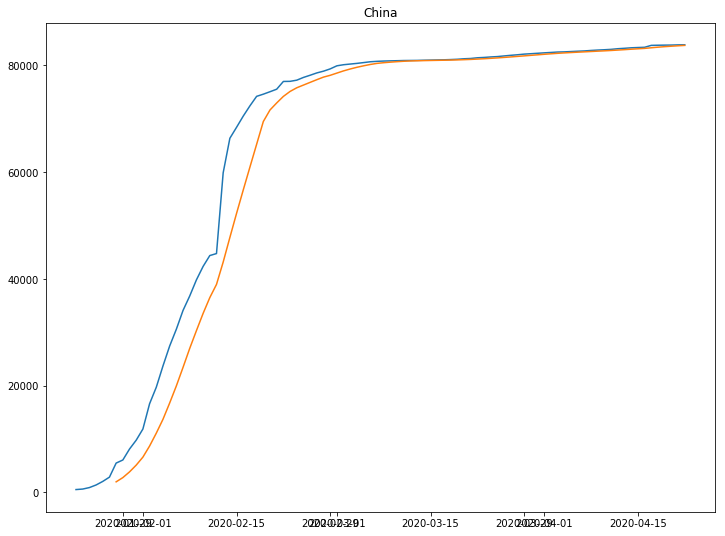

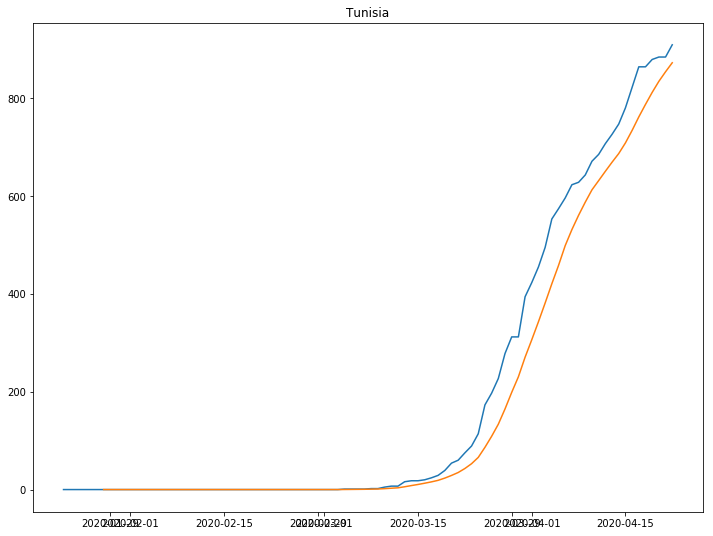

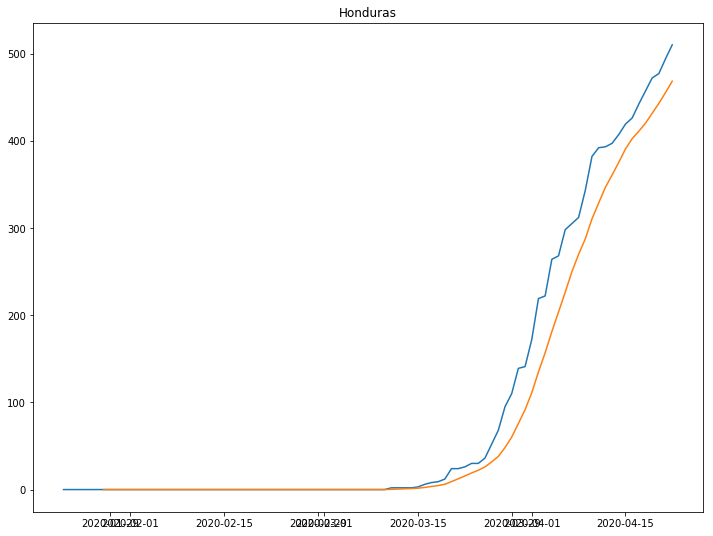

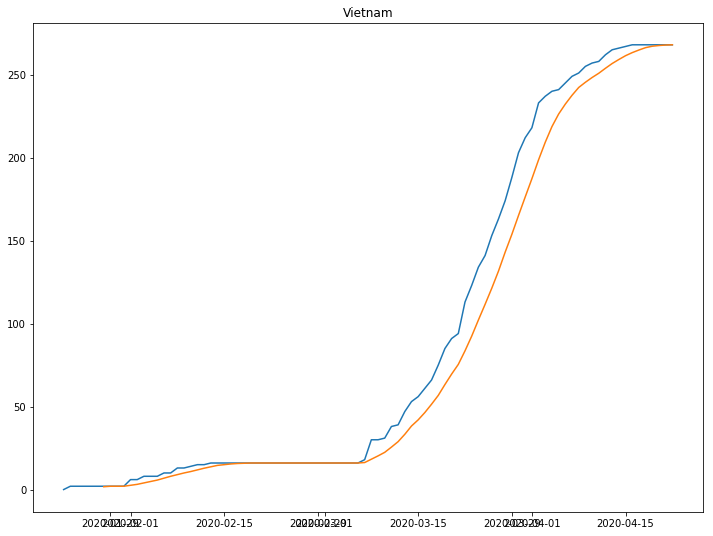

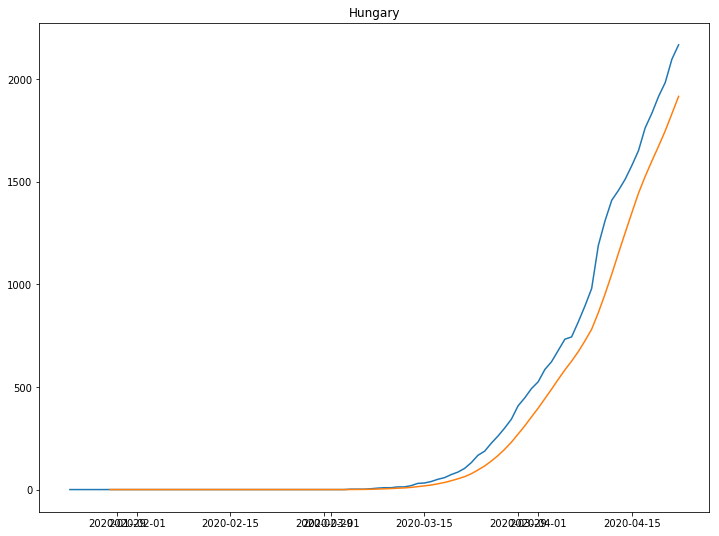

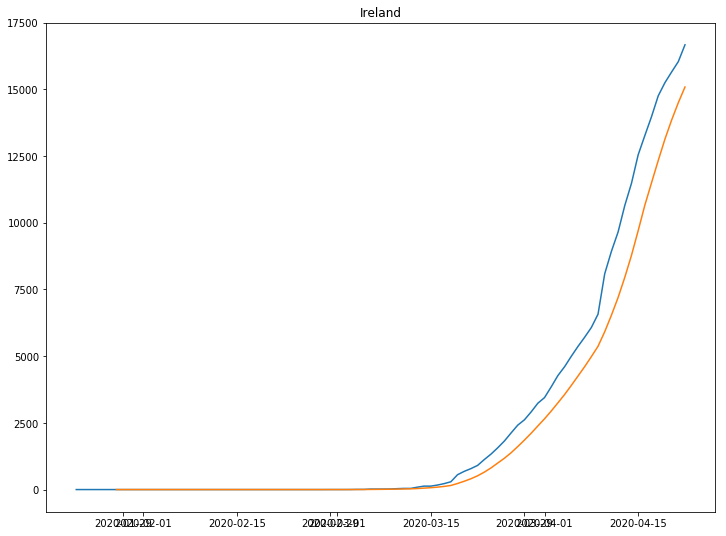

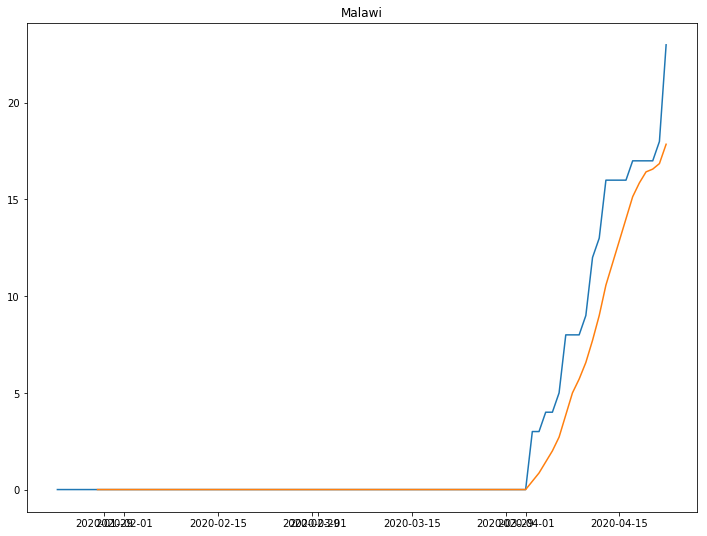

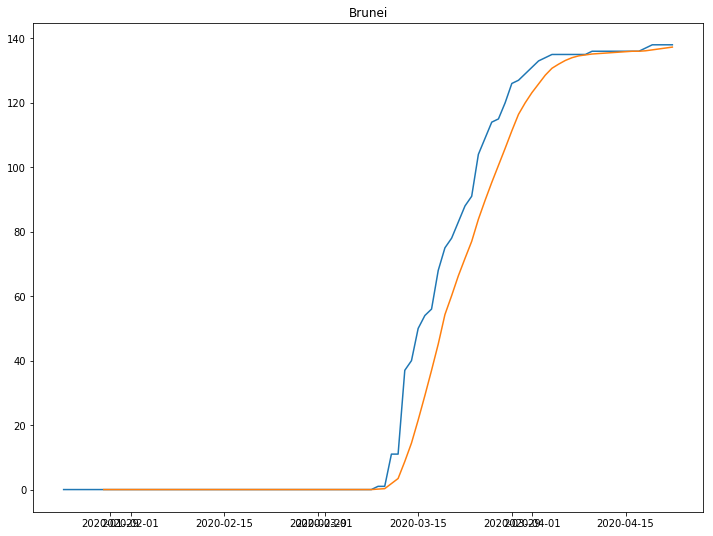

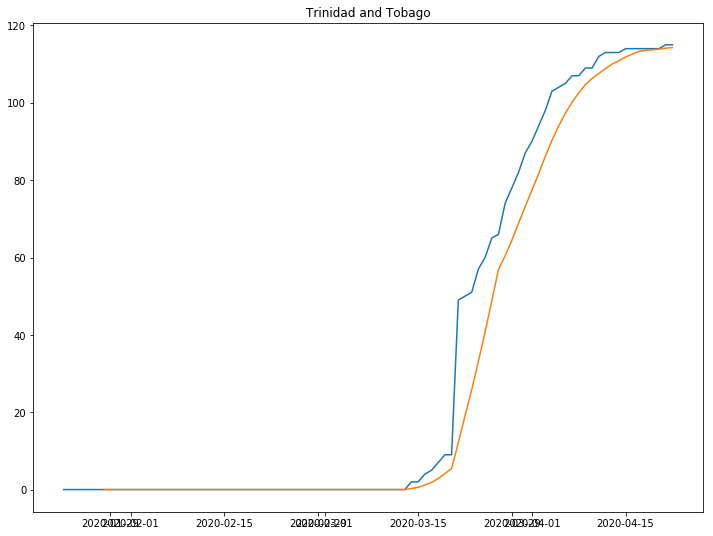

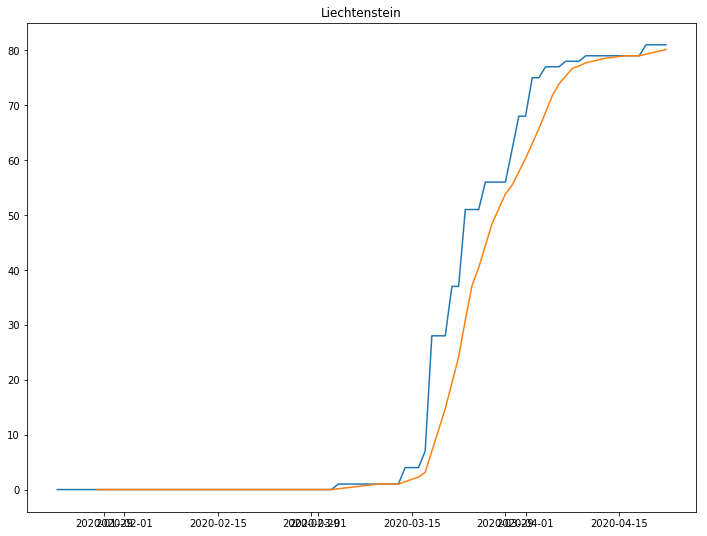

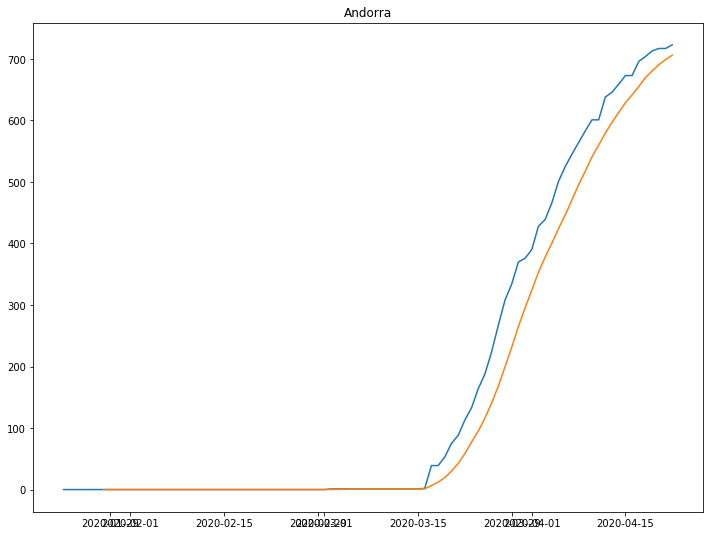

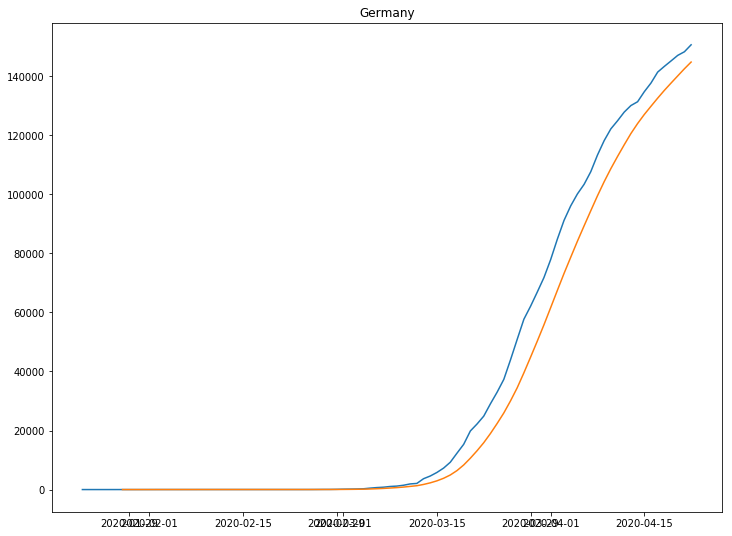

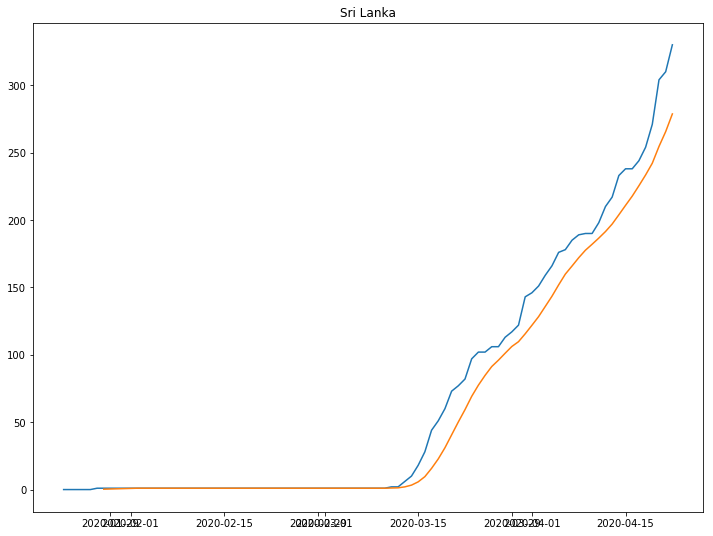

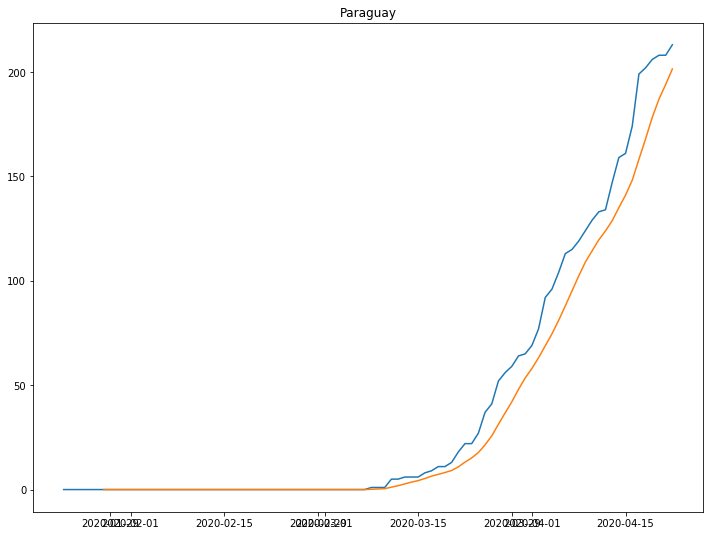

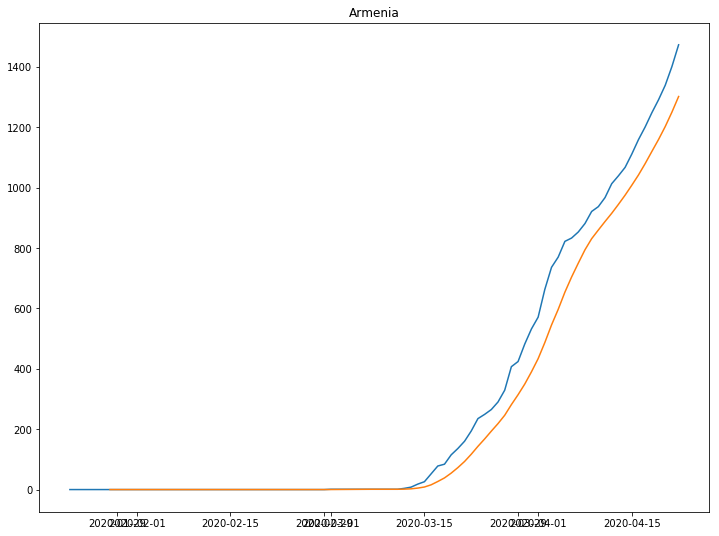

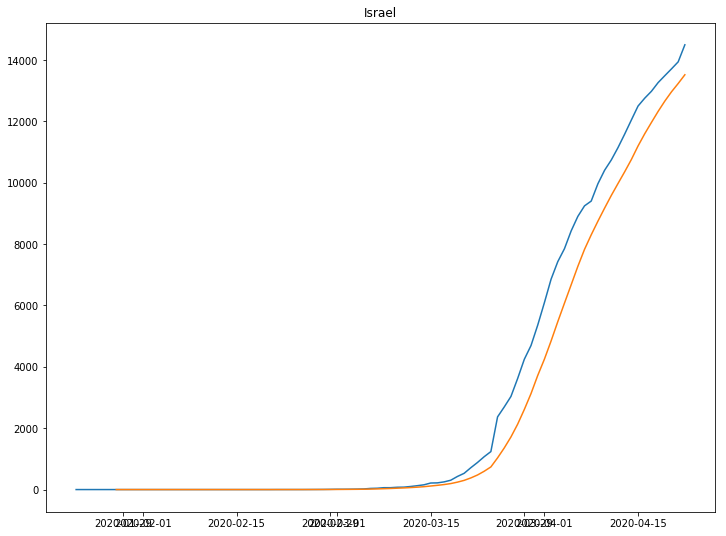

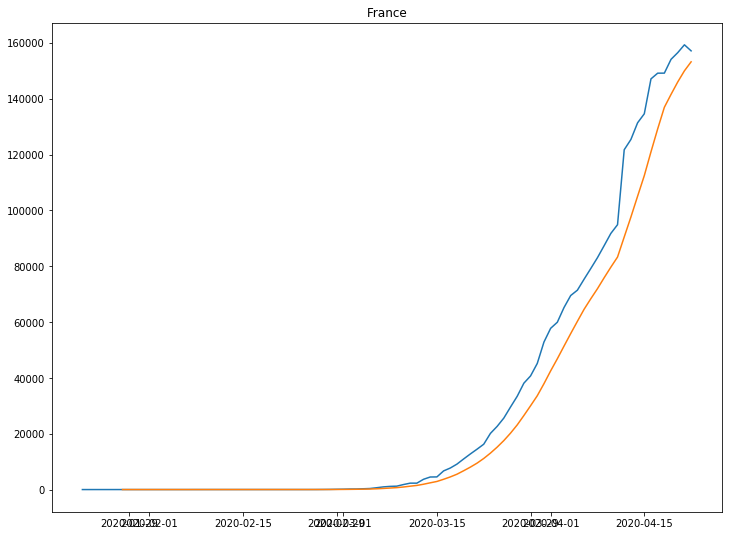

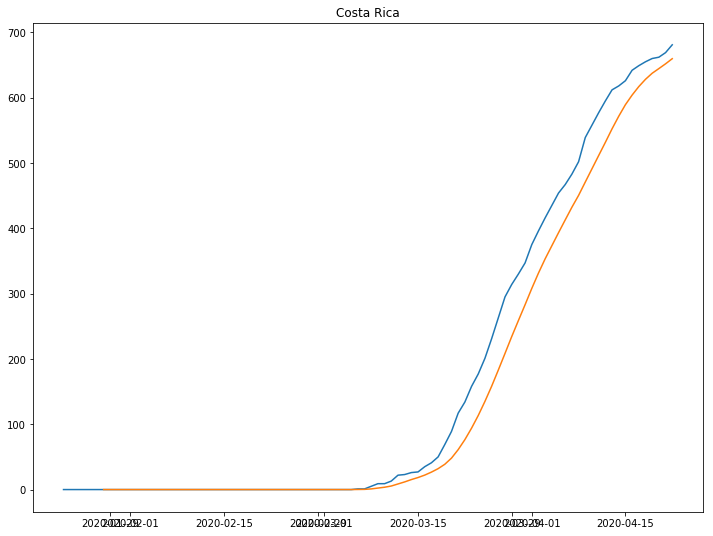

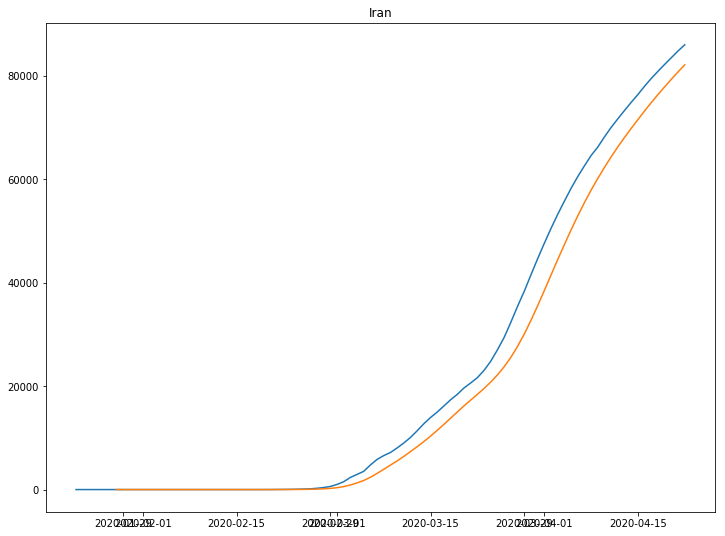

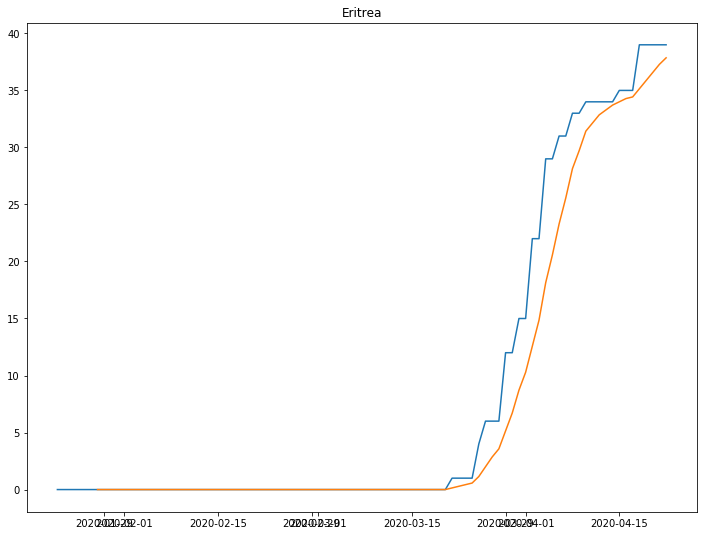

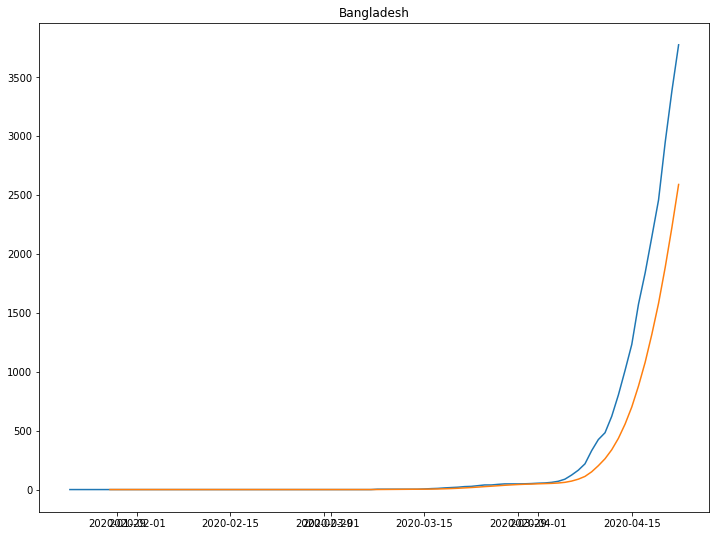

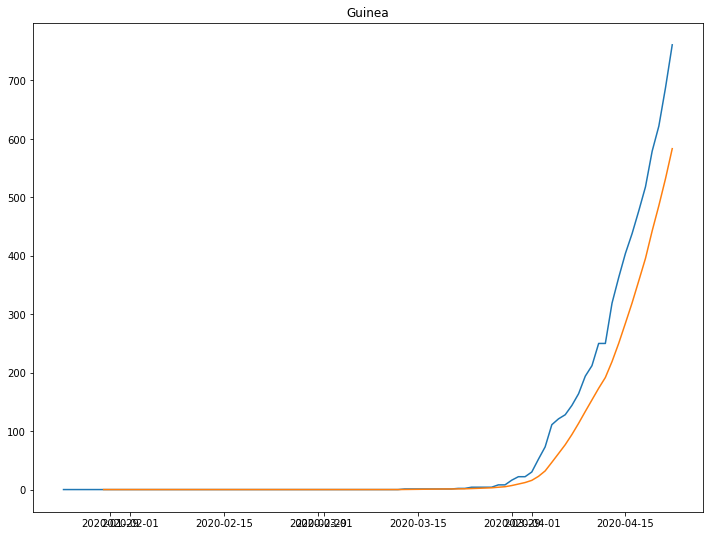

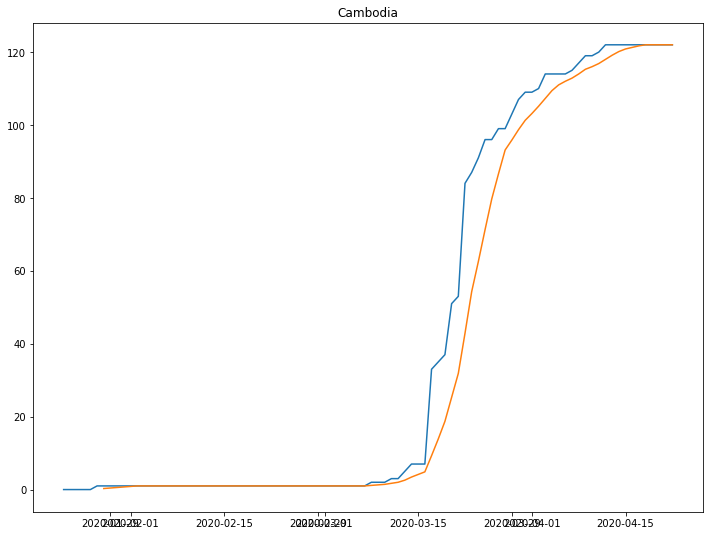

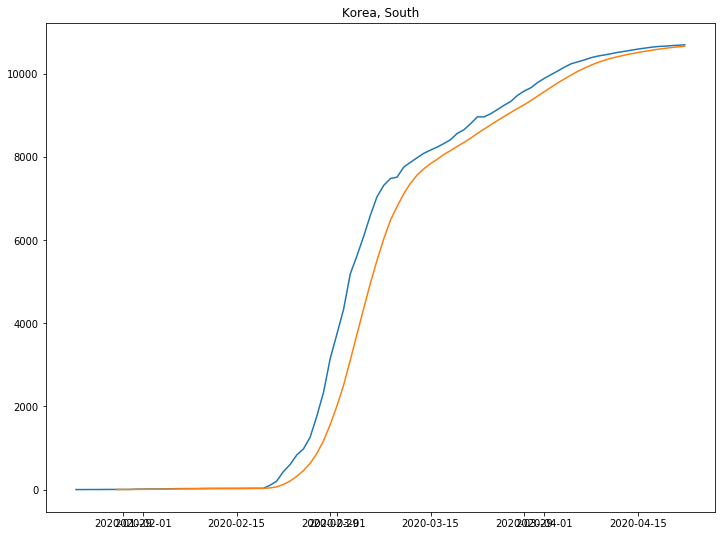

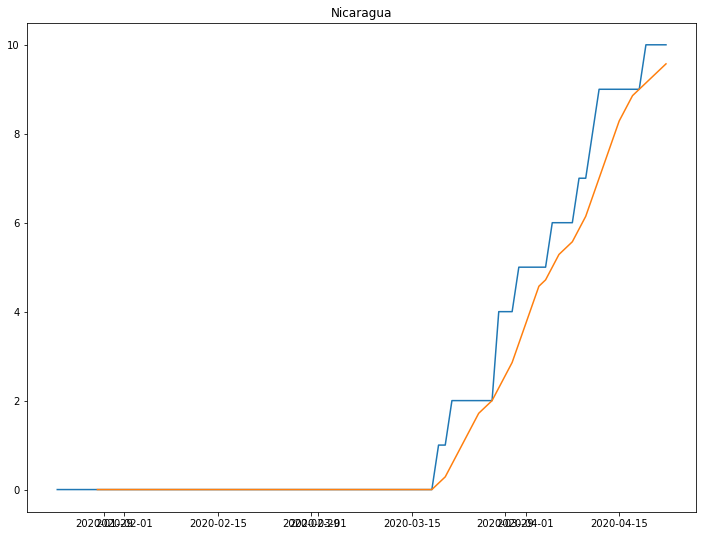

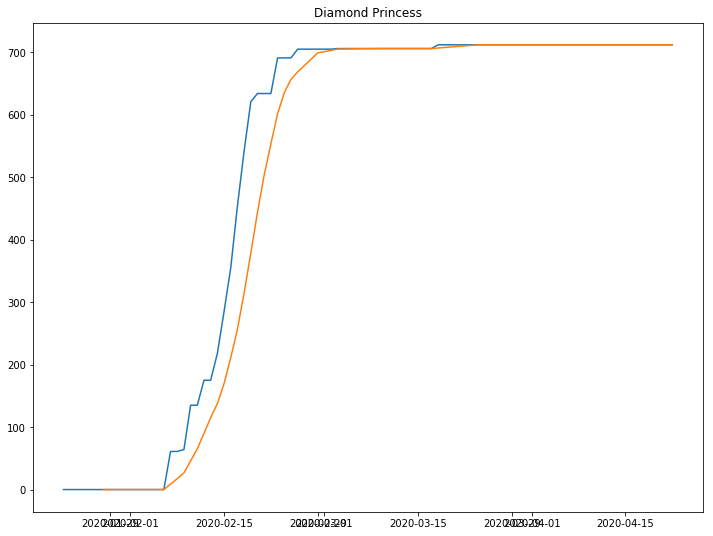

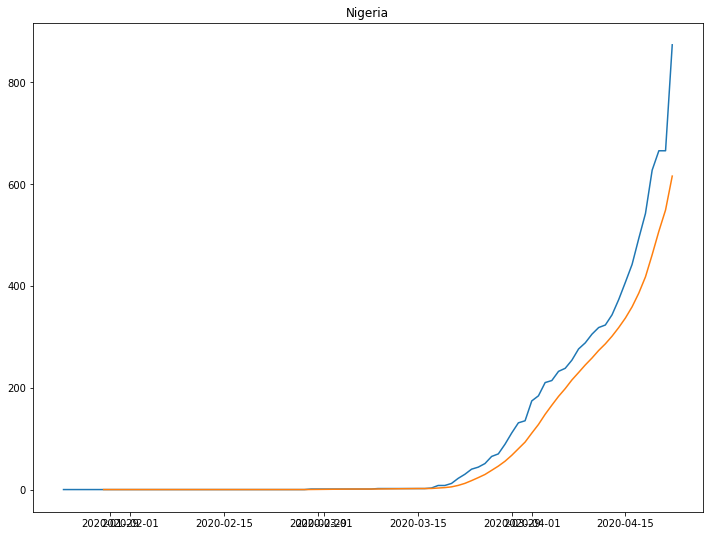

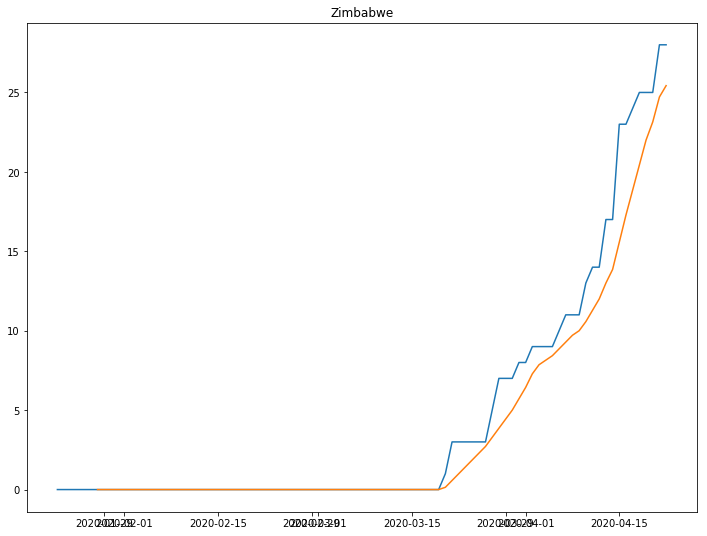

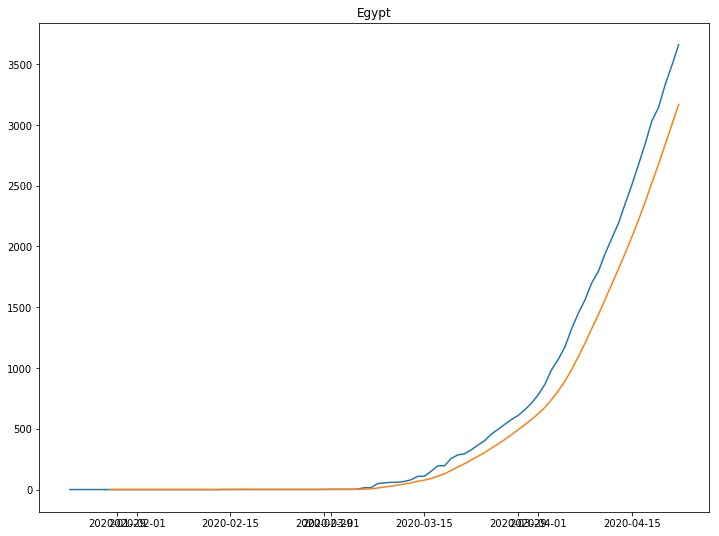

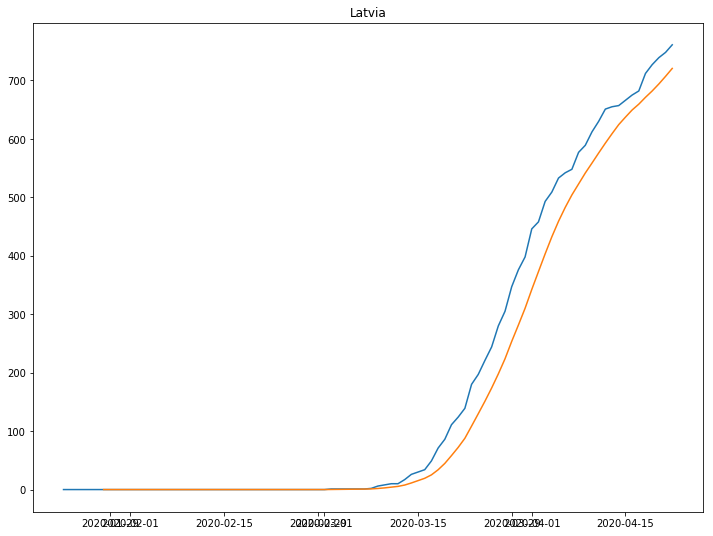

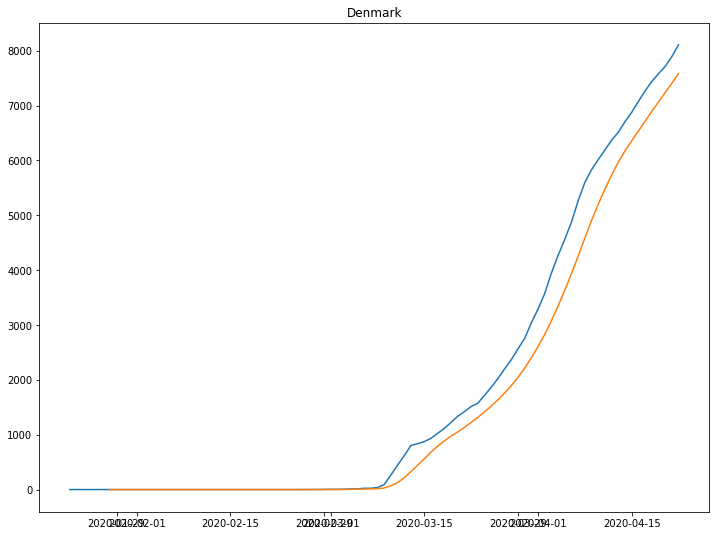

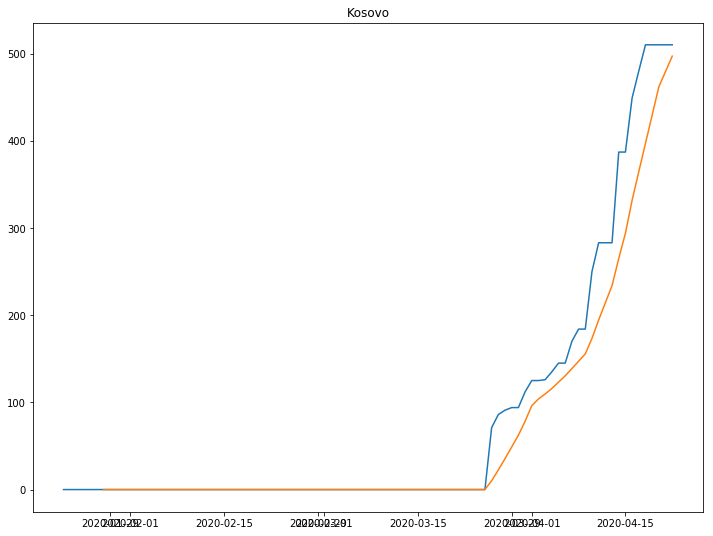

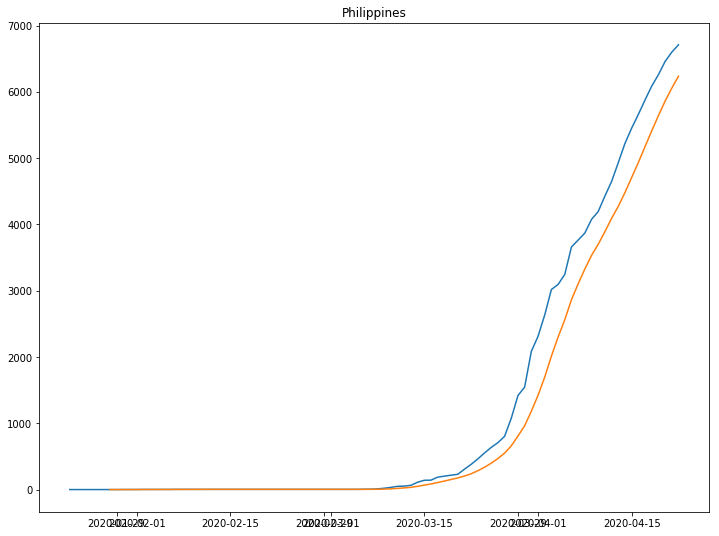

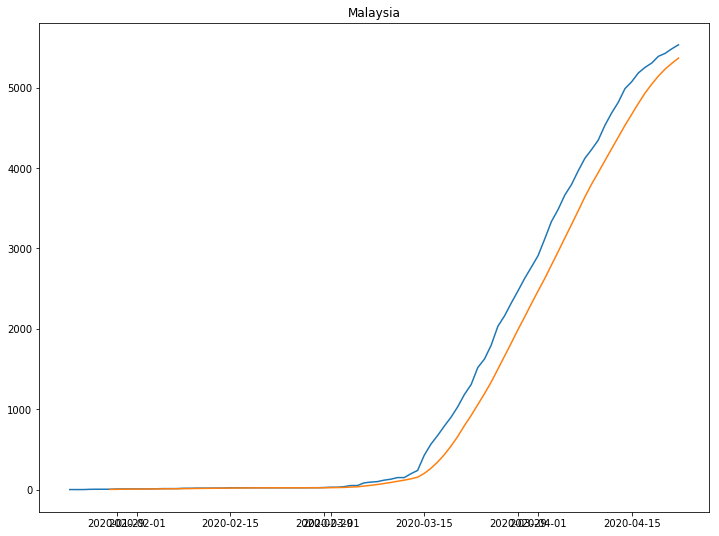

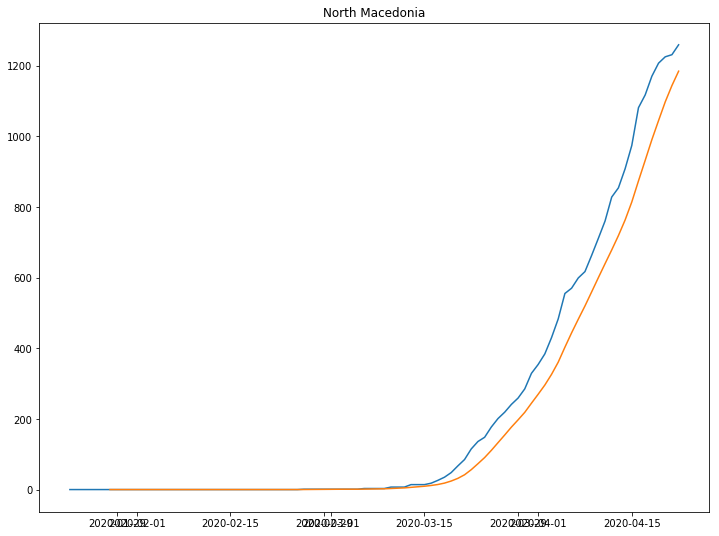

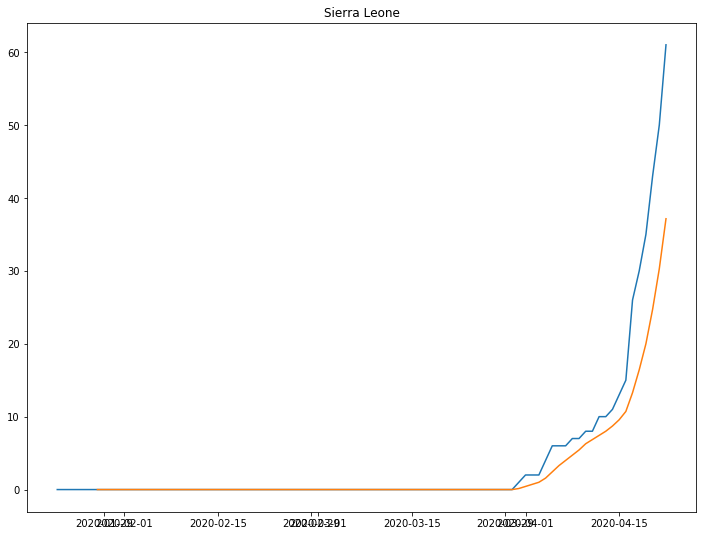

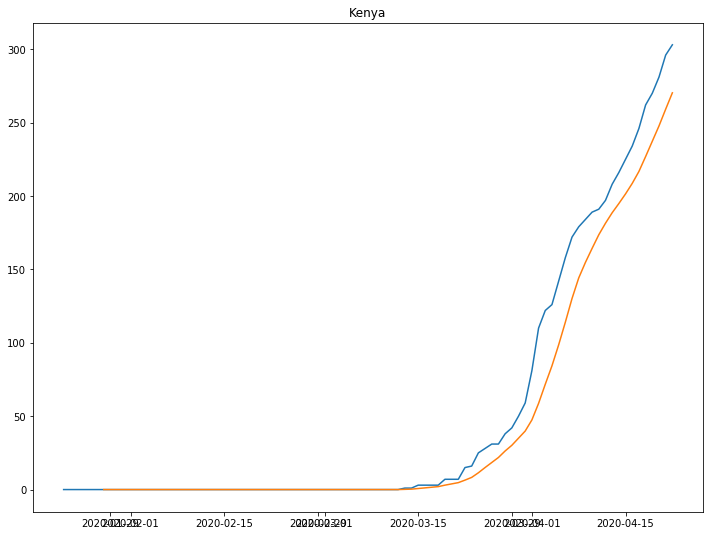

In [21]:
countries = set(df['Country/Region'].values)

for country in countries:
    country_data = df[df['Country/Region'] == country].drop(columns=['Province/State', 'Lat', 'Long', 'Country/Region']).sum()
    
    country_df = pd.DataFrame(data=country_data, columns=[country])
    country_df['Date'] = pd.to_datetime(country_df.index)
    country_df.set_index('Date', inplace=True)

    plt.figure(figsize=(12,9))
    plt.title(country)
    plt.plot(country_df[country])
    plt.plot(country_df[country].rolling(7).mean());